<a href="https://www.kaggle.com/code/dilekdd/house-price-predictions?scriptVersionId=202859902" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import missingno as msno

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_validate, RandomizedSearchCV, validation_curve
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report,  RocCurveDisplay
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, cross_val_predict, cross_val_score

warnings.simplefilter(action="ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)


In [2]:
# loading the train.csv dataset 
df_train = pd.read_csv("/kaggle/input/house-price-prediction/train.csv")

In [3]:
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
0   1          60       RL       65.000     8450   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace     196.000        Gd        TA      PConc       Gd       TA           No          GLQ         706          Unf           0        150          856    GasA        Ex          Y      SBrkr       856       854             0       1710             1             0         2         1             3             1          Gd             8        Typ           0         NaN     Attchd     2003.000          RFn           2         548         TA         TA          Y           0           61              0          0            0         0    NaN   NaN         NaN        0       2    2008       WD        Normal     208500
1   2          20       RL       80.000     9600   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd        NaN       0.000        TA        TA     CBlock       Gd       TA           Gd          ALQ         978          Unf           0        284         1262    GasA        Ex          Y      SBrkr      1262         0             0       1262             0             1         2         0             3             1          TA             6        Typ           1          TA     Attchd     1976.000          RFn           2         460         TA         TA          Y         298            0              0          0            0         0    NaN   NaN         NaN        0       5    2007       WD        Normal     181500
2   3          60       RL       68.000    11250   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace     162.000        Gd        TA      PConc       Gd       TA           Mn          GLQ         486          Unf           0        434          920    GasA        Ex          Y      SBrkr       920       866             0       1786             1             0         2         1             3             1          Gd             6        Typ           1          TA     Attchd     2001.000          RFn           2         608         TA         TA          Y           0           42              0          0            0         0    NaN   NaN         NaN        0       9    2008       WD        Normal     223500
3   4          70       RL       60.000     9550   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN       0.000        TA        TA     BrkTil       TA       Gd           No          ALQ         216          Unf           0        540          756   

In [4]:
#loading the tes.csv dataset
df_test = pd.read_csv("/kaggle/input/house-price-prediction/test.csv")

In [5]:
sub = pd.read_csv("/kaggle/input/house-price-dataset/sample_submission.csv")

In [6]:
df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC  Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition
0  1461          20       RH       80.000    11622   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl        NAmes      Feedr       Norm     1Fam     1Story            5            6       1961          1961     Gable  CompShg     VinylSd     VinylSd        NaN       0.000        TA        TA     CBlock       TA       TA           No          Rec     468.000          LwQ     144.000    270.000      882.000    GasA        TA          Y      SBrkr       896         0             0        896         0.000         0.000         1         0             2             1          TA             5        Typ           0         NaN     Attchd     1961.000          Unf       1.000     730.000         TA         TA          Y         140            0              0          0          120         0    NaN  MnPrv         NaN        0       6    2010       WD        Normal
1  1462          20       RL       81.000    14267   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl        NAmes       Norm       Norm     1Fam     1Story            6            6       1958          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace     108.000        TA        TA     CBlock       TA       TA           No          ALQ     923.000          Unf       0.000    406.000     1329.000    GasA        TA          Y      SBrkr      1329         0             0       1329         0.000         0.000         1         1             3             1          Gd             6        Typ           0         NaN     Attchd     1958.000          Unf       1.000     312.000         TA         TA          Y         393           36              0          0            0         0    NaN    NaN        Gar2    12500       6    2010       WD        Normal
2  1463          60       RL       74.000    13830   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      Gilbert       Norm       Norm     1Fam     2Story            5            5       1997          1998     Gable  CompShg     VinylSd     VinylSd        NaN       0.000        TA        TA      PConc       Gd       TA           No          GLQ     791.000          Unf       0.000    137.000      928.000    GasA        Gd          Y      SBrkr       928       701             0       1629         0.000         0.000         2         1             3             1          TA             6        Typ           1          TA     Attchd     1997.000          Fin       2.000     482.000         TA         TA          Y         212           34              0          0            0         0    NaN  MnPrv         NaN        0       3    2010       WD        Normal
3  1464          60       RL       78.000     9978   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      Gilbert       Norm       Norm     1Fam     2Story            6            6       1998          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace      20.000        TA        TA      PConc       TA       TA           No          GLQ     602.000          Unf       0.000    324.000      926.000    GasA        Ex          Y      

In [7]:
# merging the datasets
df = pd.concat([df_train, df_test], ignore_index=True)

In [8]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
0   1          60       RL       65.000     8450   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace     196.000        Gd        TA      PConc       Gd       TA           No          GLQ     706.000          Unf       0.000    150.000      856.000    GasA        Ex          Y      SBrkr       856       854             0       1710         1.000         0.000         2         1             3             1          Gd             8        Typ           0         NaN     Attchd     2003.000          RFn       2.000     548.000         TA         TA          Y           0           61              0          0            0         0    NaN   NaN         NaN        0       2    2008       WD        Normal 208500.000
1   2          20       RL       80.000     9600   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd        NaN       0.000        TA        TA     CBlock       Gd       TA           Gd          ALQ     978.000          Unf       0.000    284.000     1262.000    GasA        Ex          Y      SBrkr      1262         0             0       1262         0.000         1.000         2         0             3             1          TA             6        Typ           1          TA     Attchd     1976.000          RFn       2.000     460.000         TA         TA          Y         298            0              0          0            0         0    NaN   NaN         NaN        0       5    2007       WD        Normal 181500.000
2   3          60       RL       68.000    11250   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace     162.000        Gd        TA      PConc       Gd       TA           Mn          GLQ     486.000          Unf       0.000    434.000      920.000    GasA        Ex          Y      SBrkr       920       866             0       1786         1.000         0.000         2         1             3             1          Gd             6        Typ           1          TA     Attchd     2001.000          RFn       2.000     608.000         TA         TA          Y           0           42              0          0            0         0    NaN   NaN         NaN        0       9    2008       WD        Normal 223500.000
3   4          70       RL       60.000     9550   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN       0.000        TA        TA     BrkTil       TA       Gd           No          ALQ     216.000          Unf       0.000    540.000      756.000   

In [9]:
df.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC  Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
2914  2915         160       RM       21.000     1936   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      MeadowV       Norm       Norm    Twnhs     2Story            4            7       1970          1970     Gable  CompShg     CemntBd     CmentBd        NaN       0.000        TA        TA     CBlock       TA       TA           No          Unf       0.000          Unf       0.000    546.000      546.000    GasA        Gd          Y      SBrkr       546       546             0       1092         0.000         0.000         1         1             3             1          TA             5        Typ           0         NaN        NaN          NaN          NaN       0.000       0.000        NaN        NaN          Y           0            0              0          0            0         0    NaN    NaN         NaN        0       6    2006       WD        Normal        NaN
2915  2916         160       RM       21.000     1894   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      MeadowV       Norm       Norm   TwnhsE     2Story            4            5       1970          1970     Gable  CompShg     CemntBd     CmentBd        NaN       0.000        TA        TA     CBlock       TA       TA           No          Rec     252.000          Unf       0.000    294.000      546.000    GasA        TA          Y      SBrkr       546       546             0       1092         0.000         0.000         1         1             3             1          TA             6        Typ           0         NaN    CarPort     1970.000          Unf       1.000     286.000         TA         TA          Y           0           24              0          0            0         0    NaN    NaN         NaN        0       4    2006       WD       Abnorml        NaN
2916  2917          20       RL      160.000    20000   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      Mitchel       Norm       Norm     1Fam     1Story            5            7       1960          1996     Gable  CompShg     VinylSd     VinylSd        NaN       0.000        TA        TA     CBlock       TA       TA           No          ALQ    1224.000          Unf       0.000      0.000     1224.000    GasA        Ex          Y      SBrkr      1224         0             0       1224         1.000         0.000         1         0             4             1          TA             7        Typ           1          TA     Detchd     1960.000          Unf       2.000     576.000         TA         TA          Y         474            0              0          0            0         0    NaN    NaN         NaN        0       9    2006       WD       Abnorml        NaN
2917  2918          85       RL       62.000    10441   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      Mitchel       Norm       Norm     1Fam     SFoyer            5            5       1992          1992     Gable  CompShg     HdBoard     Wd Shng        NaN       0.000        TA        TA      PConc       Gd       TA           Av          GLQ     337.000          Unf       0.000   

In [10]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 81, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [12]:
df.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T

count       mean       std       min        0%        5%        50%        95%        99%       100%        max
Id          2919.000   1460.000   842.787     1.000     1.000   146.900   1460.000   2773.100   2889.820   2919.000   2919.000
MSSubClass  2919.000     57.138    42.518    20.000    20.000    20.000     50.000    160.000    190.000    190.000    190.000
LotFrontage 2433.000     69.306    23.345    21.000    21.000    32.000     68.000    107.000    135.680    313.000    313.000
LotArea     2919.000  10168.114  7886.996  1300.000  1300.000  3182.000   9453.000  17142.900  33038.640 215245.000 215245.000
OverallQual 2919.000      6.089     1.410     1.000     1.000     4.000      6.000      8.000     10.000     10.000     10.000
...              ...        ...       ...       ...       ...       ...        ...        ...        ...        ...        ...
PoolArea    2919.000      2.252    35.664     0.000     0.000     0.000      0.000      0.000      0.000    800.000    800.000
MiscVal     2919.000     50.826   567.402     0.000     0.000     0.000      0.000      0.000    982.000  17000.000  17000.000
MoSold      2919.000      6.213     2.715     1.000     1.000     2.000      6.000     11.000     12.000     12.000     12.000
YrSold      2919.000   2007.793     1.315  2006.000  2006.000  2006.000   2008.000   2010.000   2010.000   2010.000   2010.000
SalePrice   1460.000 180921.196 79442.503 34900.000 34900.000 88000.000 163000.000 326100.000 442567.010 755000.000 755000.000

[38 rows x 11 columns]

In [13]:
# classifying the variables
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Provides the names of categorical, numeric and categorical but cardinal variables in the data set.
    Note: Categorical variables with numeric appearance are also included in categorical variables.

    Parameters
    ------
        dataframe: dataframe
                Dataframe from which variable names are to be retrieved
        cat_th: int, optional
                Threshold value for numeric but categorical variables
        car_th: int, optinal
                Threshold for categorical but not cardinal variables

    Returns
    ------
        cat_cols: list
                Categorical variable list
        num_cols: list
                Numerical variable list
        cat_but_car: list
                categorical but cardinal list

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = total variable count
        num_but_cat is included in cat_cols
        3 lists that is returned are equal to the total variable count: cat_cols + num_cols + cat_but_car = total variable count

    """

    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"] 

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat

    cat_cols = [col for col in cat_cols if col not in cat_but_car] 

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"] 

    num_cols = [col for col in num_cols if col not in num_but_cat] 

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 2919
Variables: 81
cat_cols: 52
num_cols: 28
cat_but_car: 1
num_but_cat: 10


In [14]:
df['Id'] = df['Id'].astype('object')

In [15]:
cat_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageCars',
 'YrSold']

In [16]:
num_cols

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'TotRmsAbvGrd',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'SalePrice']

In [17]:
cat_but_car

['Neighborhood']

In [18]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 2919
Variables: 81
cat_cols: 52
num_cols: 27
cat_but_car: 2
num_but_cat: 10


          MSZoning  Ratio
MSZoning                 
RL            2265 77.595
RM             460 15.759
FV             139  4.762
RH              26  0.891
C (all)         25  0.856
##########################################


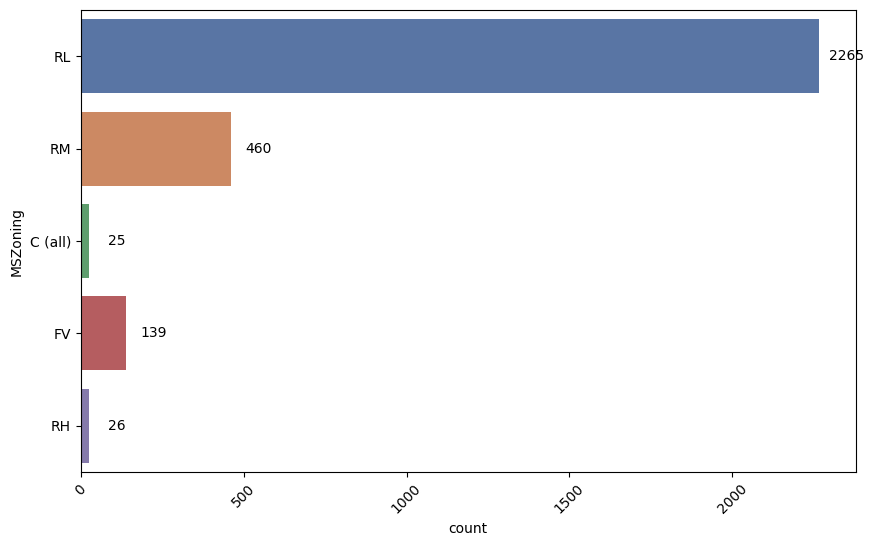

        Street  Ratio
Street               
Pave      2907 99.589
Grvl        12  0.411
##########################################


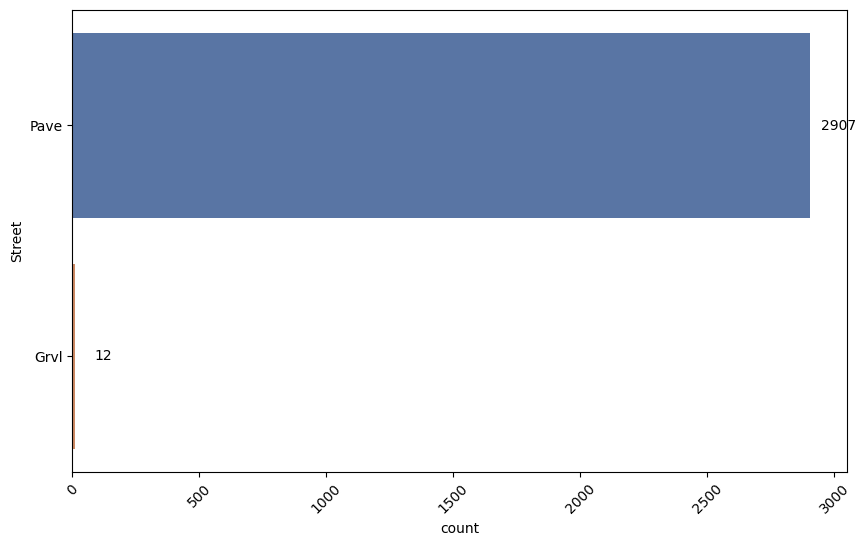

       Alley  Ratio
Alley              
Grvl     120  4.111
Pave      78  2.672
##########################################


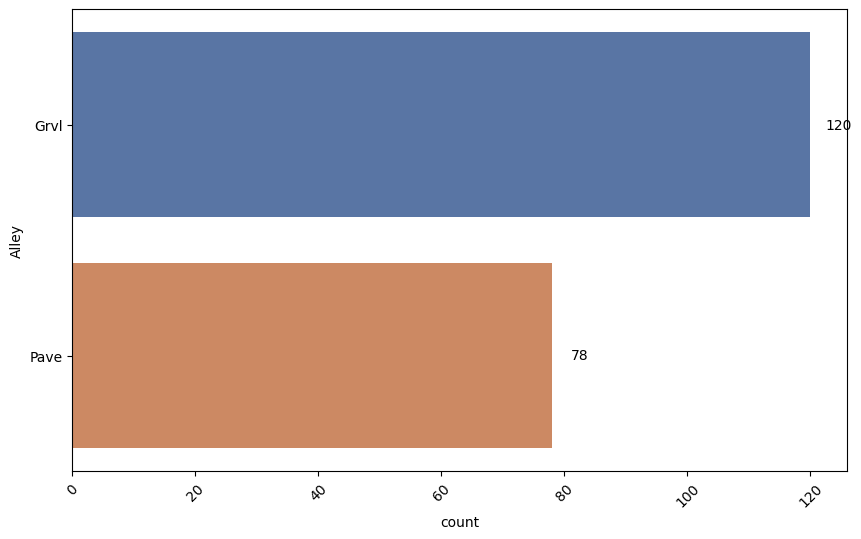

          LotShape  Ratio
LotShape                 
Reg           1859 63.686
IR1            968 33.162
IR2             76  2.604
IR3             16  0.548
##########################################


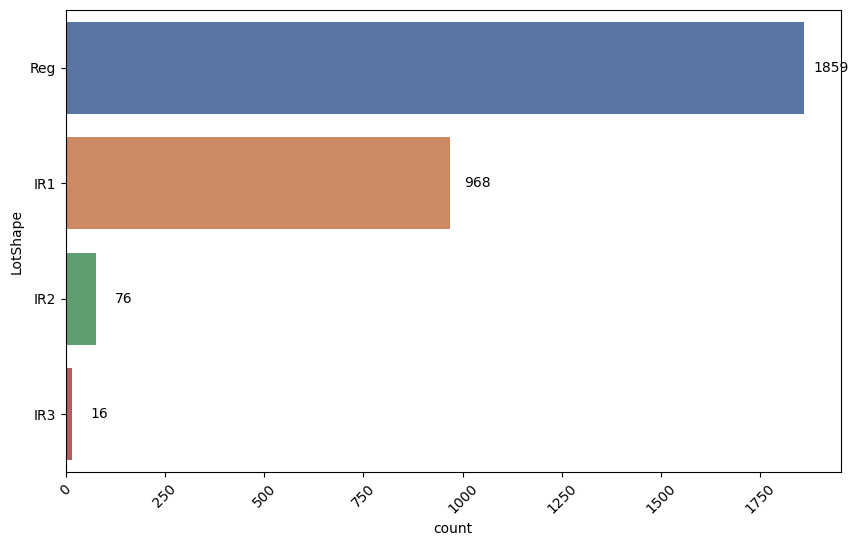

             LandContour  Ratio
LandContour                    
Lvl                 2622 89.825
HLS                  120  4.111
Bnk                  117  4.008
Low                   60  2.055
##########################################


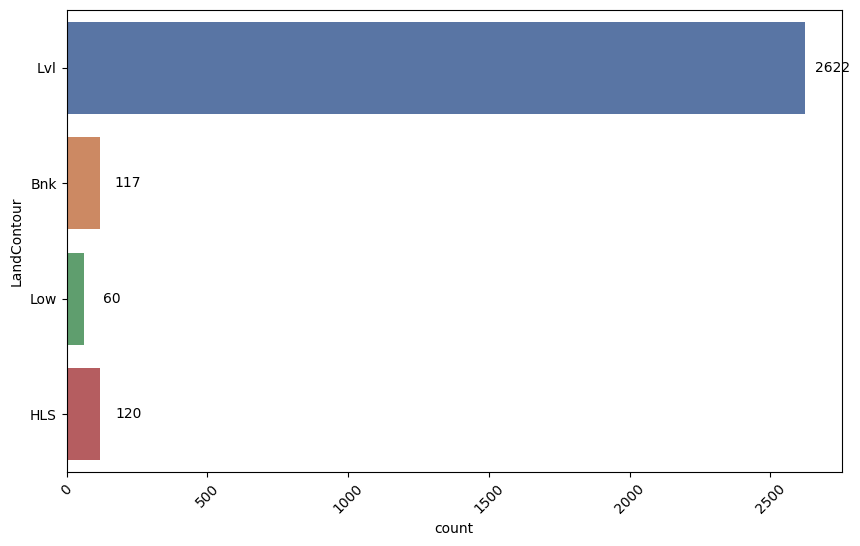

           Utilities  Ratio
Utilities                  
AllPub          2916 99.897
NoSeWa             1  0.034
##########################################


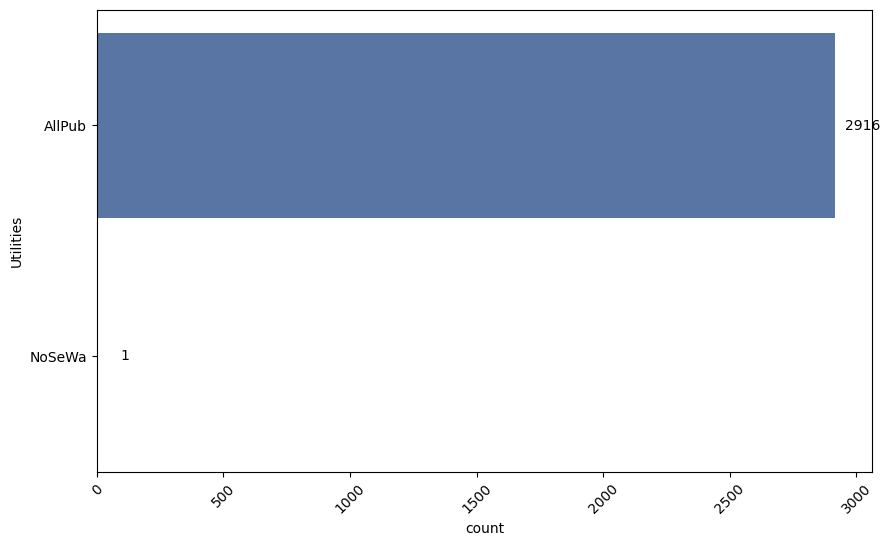

           LotConfig  Ratio
LotConfig                  
Inside          2133 73.073
Corner           511 17.506
CulDSac          176  6.029
FR2               85  2.912
FR3               14  0.480
##########################################


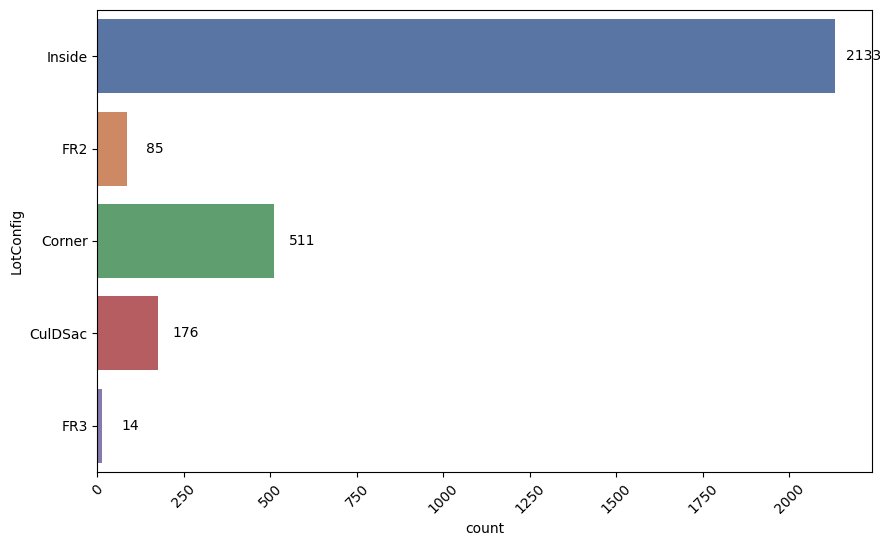

           LandSlope  Ratio
LandSlope                  
Gtl             2778 95.170
Mod              125  4.282
Sev               16  0.548
##########################################


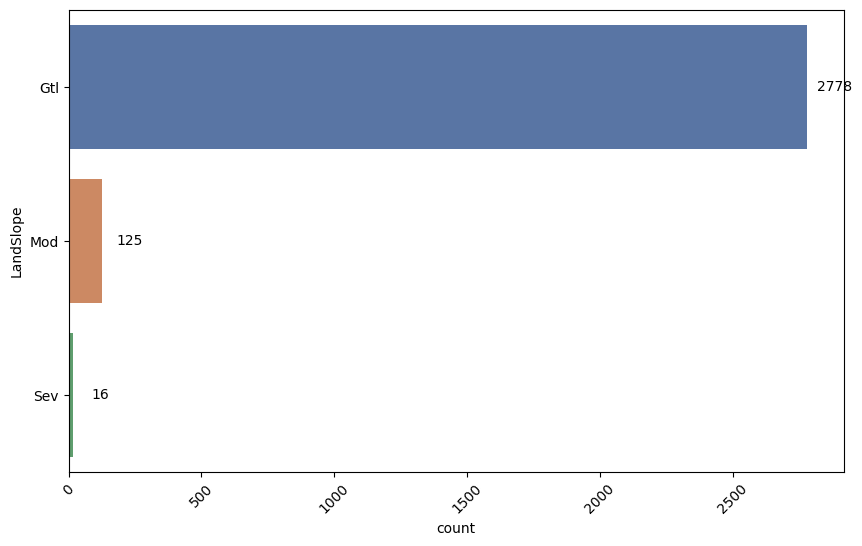

            Condition1  Ratio
Condition1                   
Norm              2511 86.023
Feedr              164  5.618
Artery              92  3.152
RRAn                50  1.713
PosN                39  1.336
RRAe                28  0.959
PosA                20  0.685
RRNn                 9  0.308
RRNe                 6  0.206
##########################################


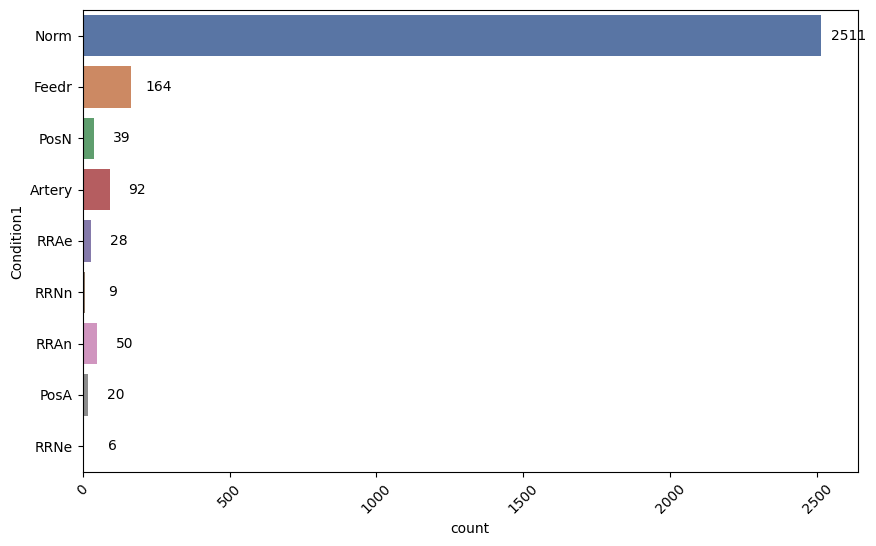

            Condition2  Ratio
Condition2                   
Norm              2889 98.972
Feedr               13  0.445
Artery               5  0.171
PosN                 4  0.137
PosA                 4  0.137
RRNn                 2  0.069
RRAn                 1  0.034
RRAe                 1  0.034
##########################################


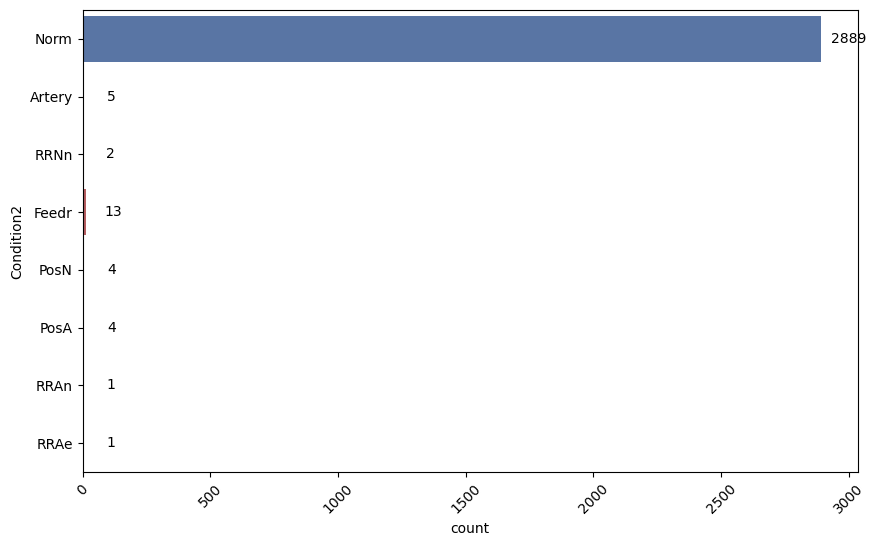

          BldgType  Ratio
BldgType                 
1Fam          2425 83.076
TwnhsE         227  7.777
Duplex         109  3.734
Twnhs           96  3.289
2fmCon          62  2.124
##########################################


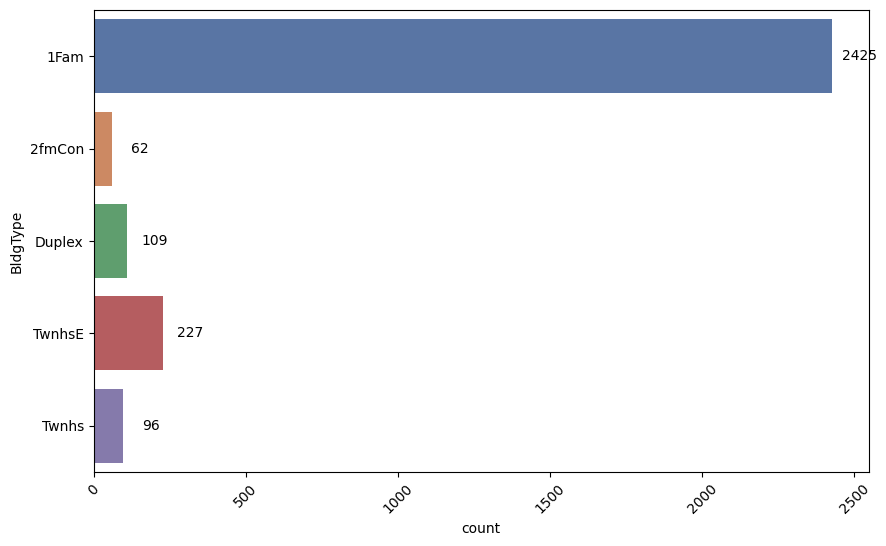

            HouseStyle  Ratio
HouseStyle                   
1Story            1471 50.394
2Story             872 29.873
1.5Fin             314 10.757
SLvl               128  4.385
SFoyer              83  2.843
2.5Unf              24  0.822
1.5Unf              19  0.651
2.5Fin               8  0.274
##########################################


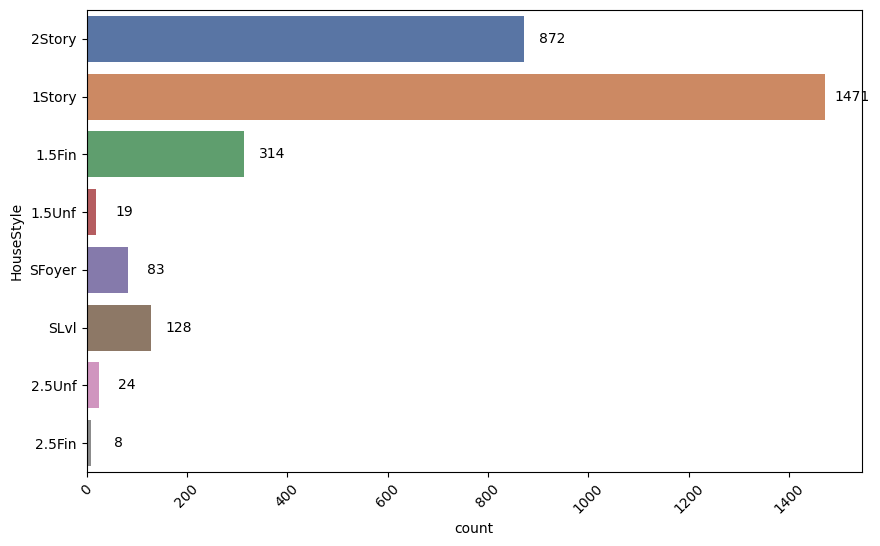

           RoofStyle  Ratio
RoofStyle                  
Gable           2310 79.137
Hip              551 18.876
Gambrel           22  0.754
Flat              20  0.685
Mansard           11  0.377
Shed               5  0.171
##########################################


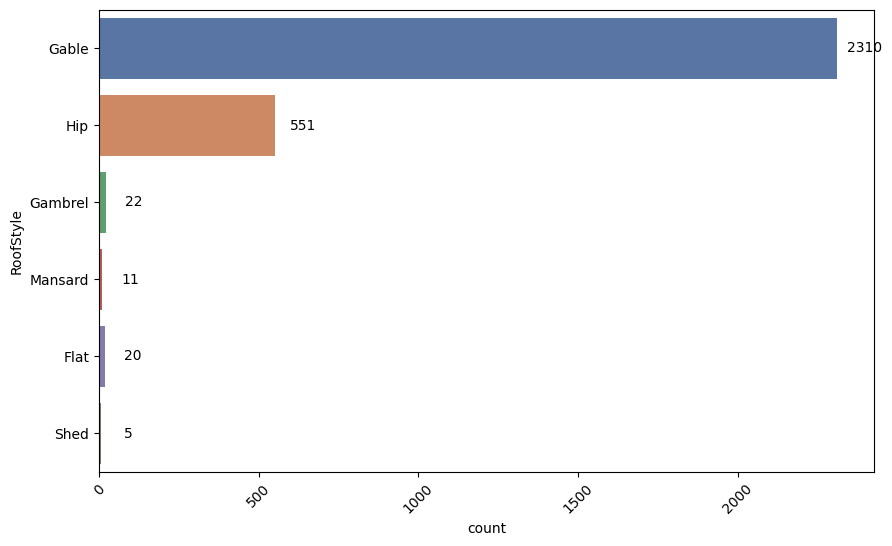

          RoofMatl  Ratio
RoofMatl                 
CompShg       2876 98.527
Tar&Grv         23  0.788
WdShake          9  0.308
WdShngl          7  0.240
Metal            1  0.034
Membran          1  0.034
Roll             1  0.034
ClyTile          1  0.034
##########################################


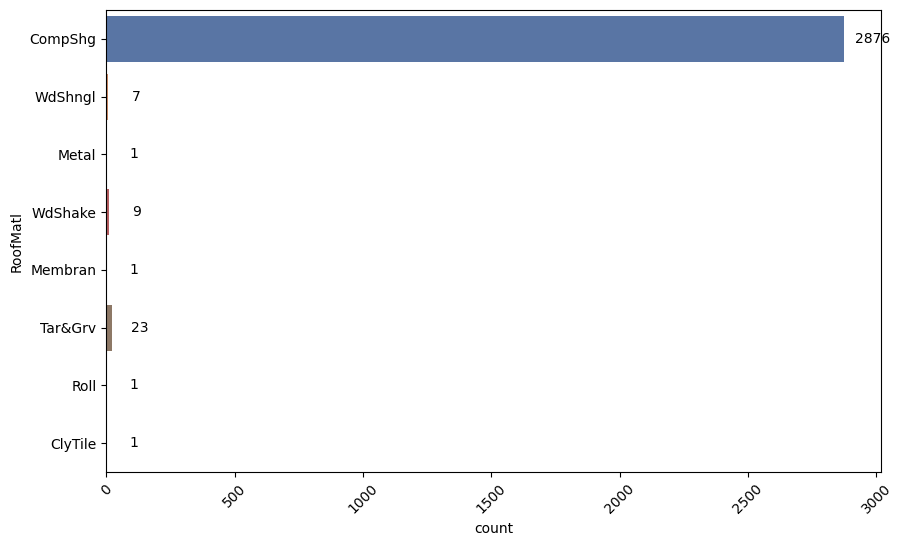

             Exterior1st  Ratio
Exterior1st                    
VinylSd             1025 35.115
MetalSd              450 15.416
HdBoard              442 15.142
Wd Sdng              411 14.080
Plywood              221  7.571
CemntBd              126  4.317
BrkFace               87  2.980
WdShing               56  1.918
AsbShng               44  1.507
Stucco                43  1.473
BrkComm                6  0.206
AsphShn                2  0.069
Stone                  2  0.069
CBlock                 2  0.069
ImStucc                1  0.034
##########################################


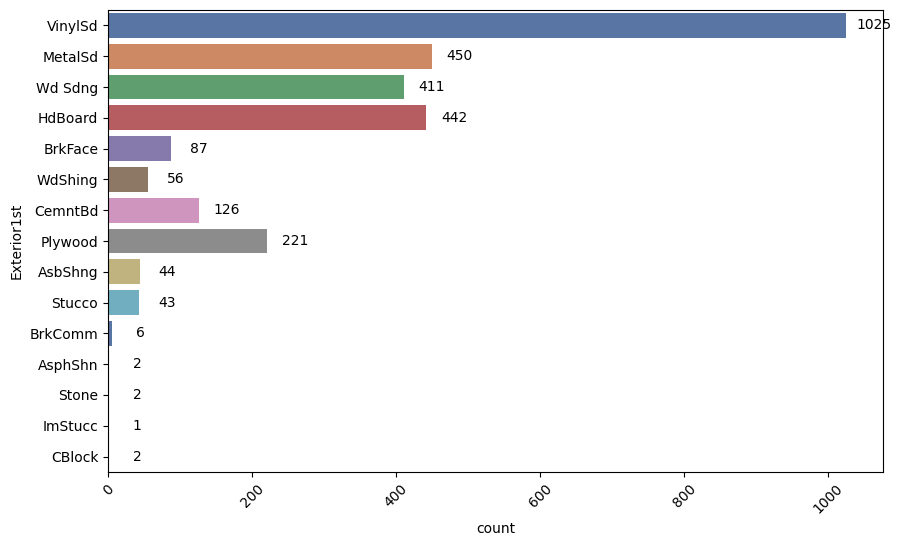

             Exterior2nd  Ratio
Exterior2nd                    
VinylSd             1014 34.738
MetalSd              447 15.313
HdBoard              406 13.909
Wd Sdng              391 13.395
Plywood              270  9.250
CmentBd              126  4.317
Wd Shng               81  2.775
BrkFace               47  1.610
Stucco                47  1.610
AsbShng               38  1.302
Brk Cmn               22  0.754
ImStucc               15  0.514
Stone                  6  0.206
AsphShn                4  0.137
CBlock                 3  0.103
Other                  1  0.034
##########################################


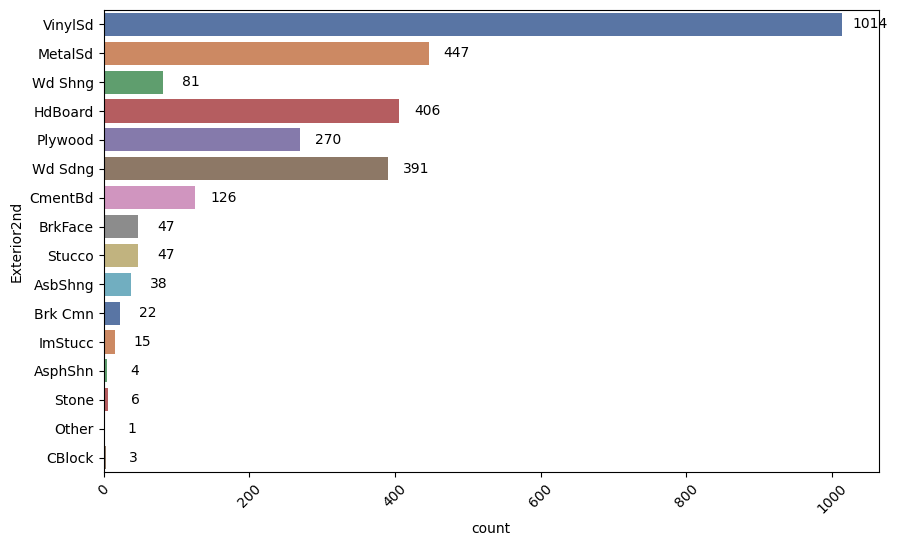

            MasVnrType  Ratio
MasVnrType                   
BrkFace            879 30.113
Stone              249  8.530
BrkCmn              25  0.856
##########################################


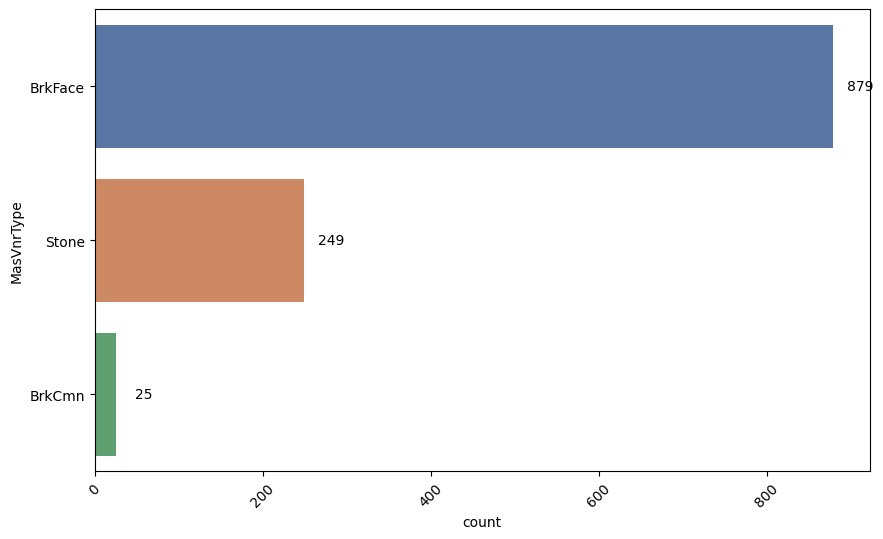

           ExterQual  Ratio
ExterQual                  
TA              1798 61.596
Gd               979 33.539
Ex               107  3.666
Fa                35  1.199
##########################################


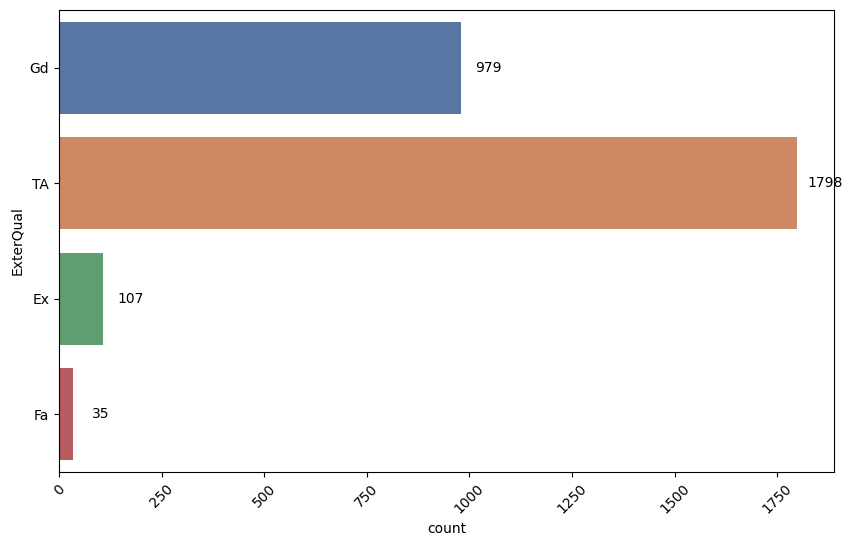

           ExterCond  Ratio
ExterCond                  
TA              2538 86.948
Gd               299 10.243
Fa                67  2.295
Ex                12  0.411
Po                 3  0.103
##########################################


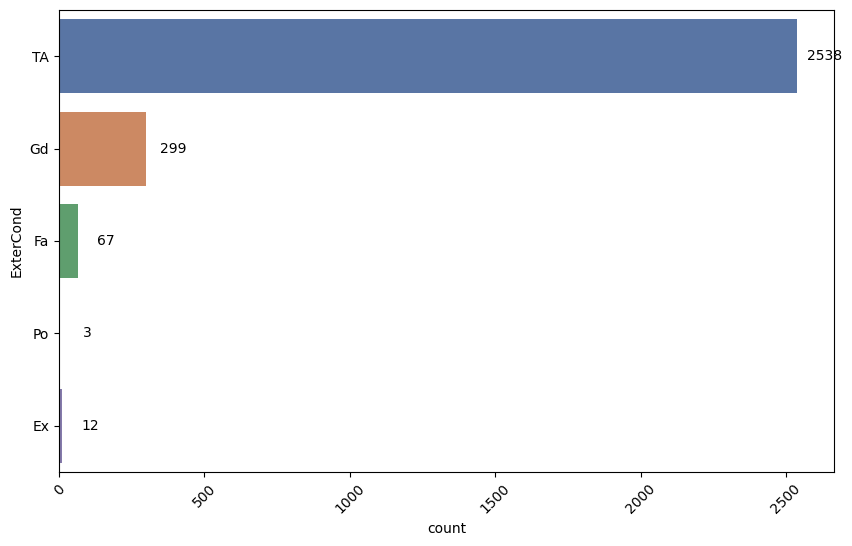

            Foundation  Ratio
Foundation                   
PConc             1308 44.810
CBlock            1235 42.309
BrkTil             311 10.654
Slab                49  1.679
Stone               11  0.377
Wood                 5  0.171
##########################################


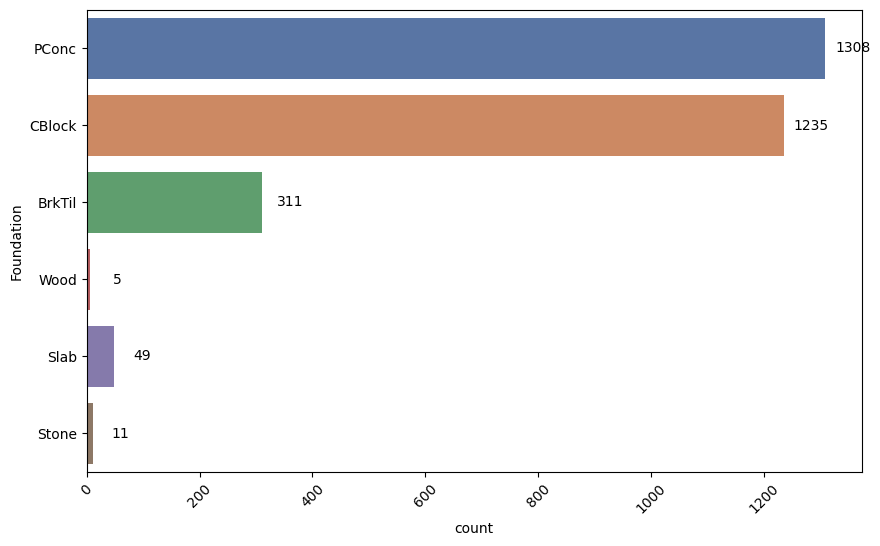

          BsmtQual  Ratio
BsmtQual                 
TA            1283 43.953
Gd            1209 41.418
Ex             258  8.839
Fa              88  3.015
##########################################


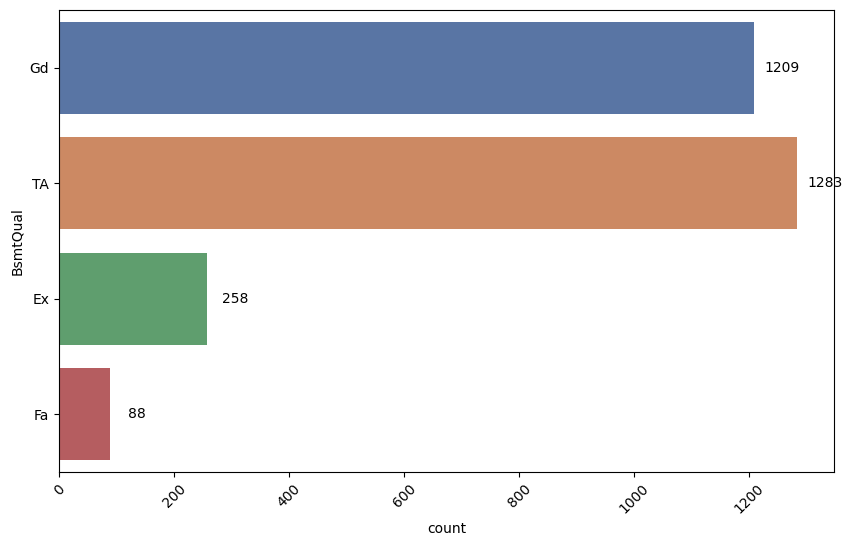

          BsmtCond  Ratio
BsmtCond                 
TA            2606 89.277
Gd             122  4.180
Fa             104  3.563
Po               5  0.171
##########################################


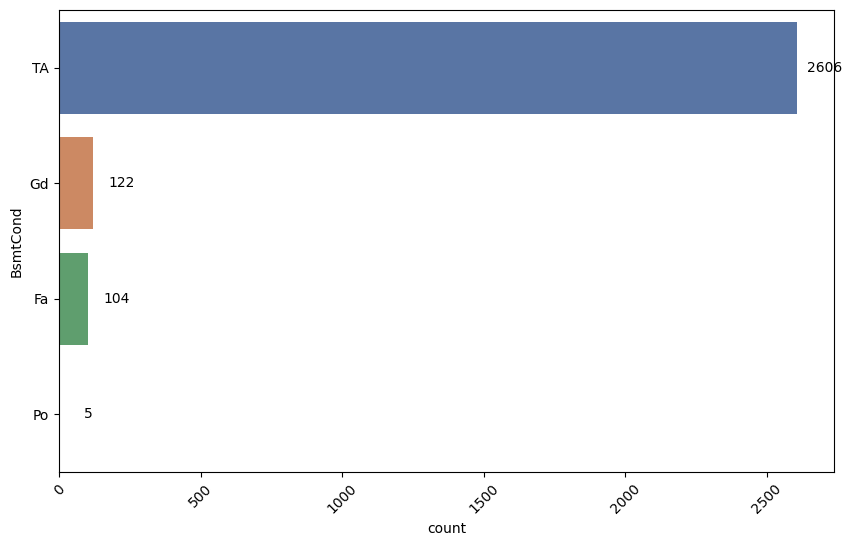

              BsmtExposure  Ratio
BsmtExposure                     
No                    1904 65.228
Av                     418 14.320
Gd                     276  9.455
Mn                     239  8.188
##########################################


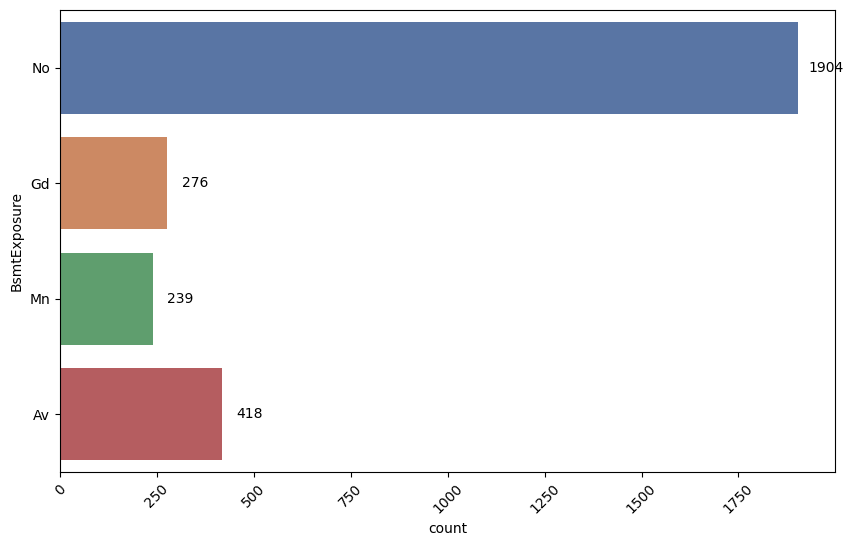

              BsmtFinType1  Ratio
BsmtFinType1                     
Unf                    851 29.154
GLQ                    849 29.085
ALQ                    429 14.697
Rec                    288  9.866
BLQ                    269  9.215
LwQ                    154  5.276
##########################################


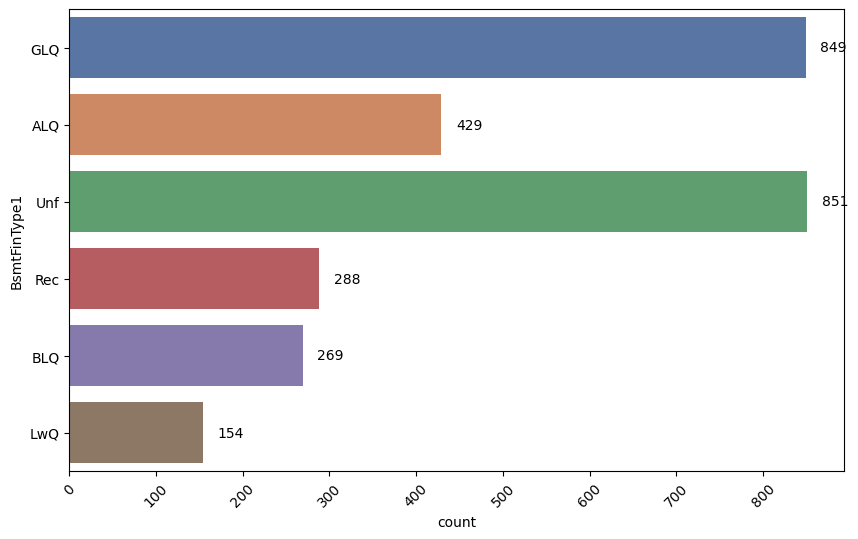

              BsmtFinType2  Ratio
BsmtFinType2                     
Unf                   2493 85.406
Rec                    105  3.597
LwQ                     87  2.980
BLQ                     68  2.330
ALQ                     52  1.781
GLQ                     34  1.165
##########################################


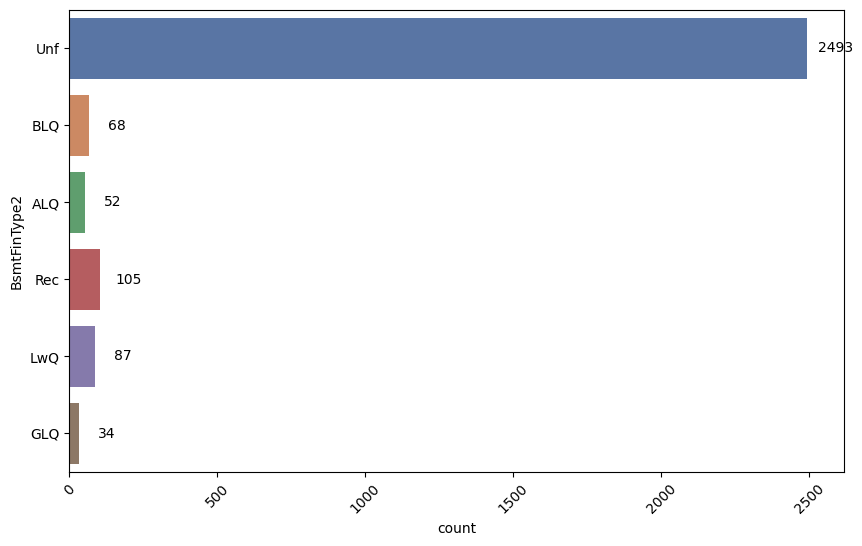

         Heating  Ratio
Heating                
GasA        2874 98.458
GasW          27  0.925
Grav           9  0.308
Wall           6  0.206
OthW           2  0.069
Floor          1  0.034
##########################################


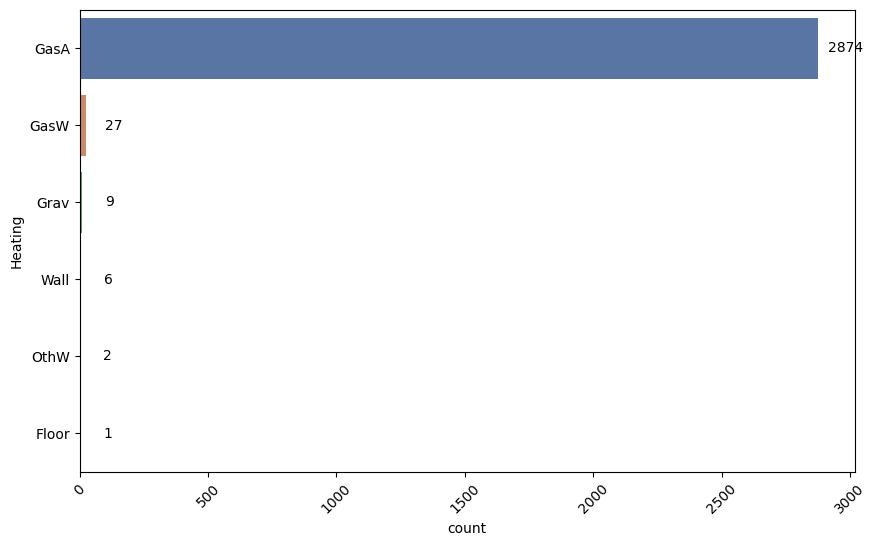

           HeatingQC  Ratio
HeatingQC                  
Ex              1493 51.148
TA               857 29.359
Gd               474 16.238
Fa                92  3.152
Po                 3  0.103
##########################################


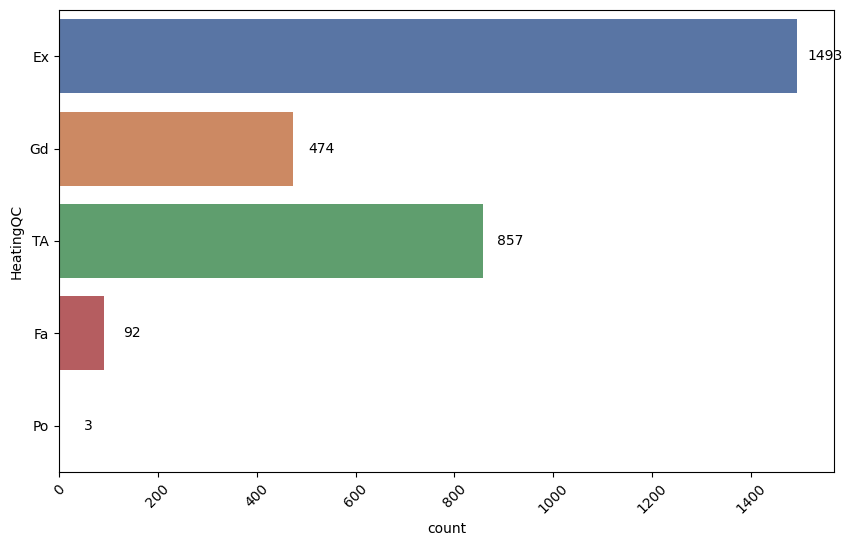

            CentralAir  Ratio
CentralAir                   
Y                 2723 93.285
N                  196  6.715
##########################################


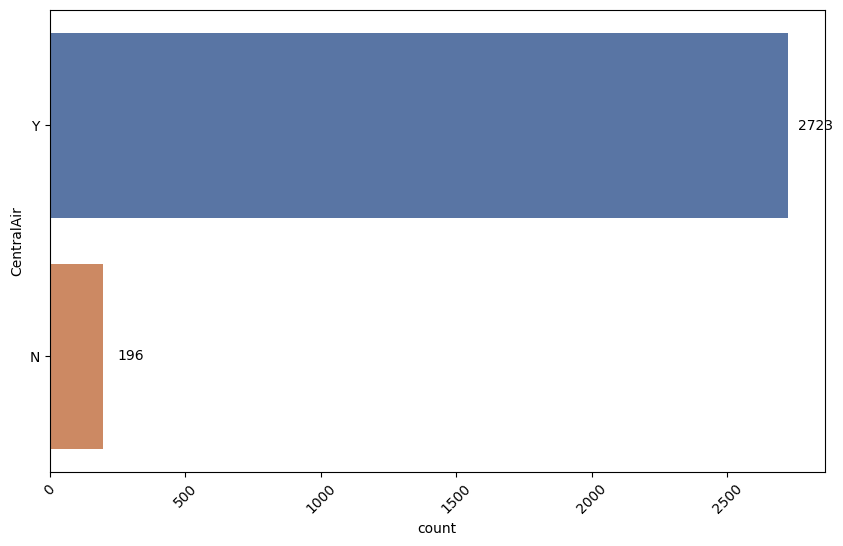

            Electrical  Ratio
Electrical                   
SBrkr             2671 91.504
FuseA              188  6.441
FuseF               50  1.713
FuseP                8  0.274
Mix                  1  0.034
##########################################


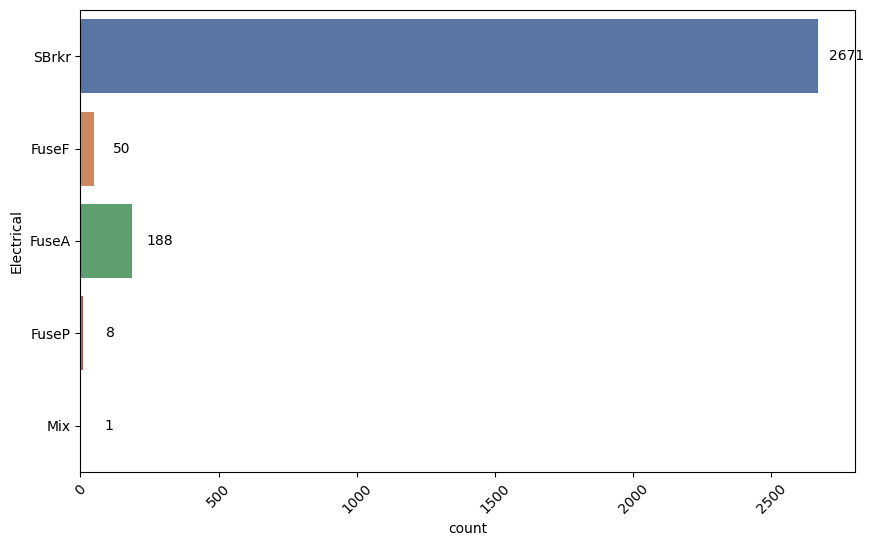

             KitchenQual  Ratio
KitchenQual                    
TA                  1492 51.113
Gd                  1151 39.431
Ex                   205  7.023
Fa                    70  2.398
##########################################


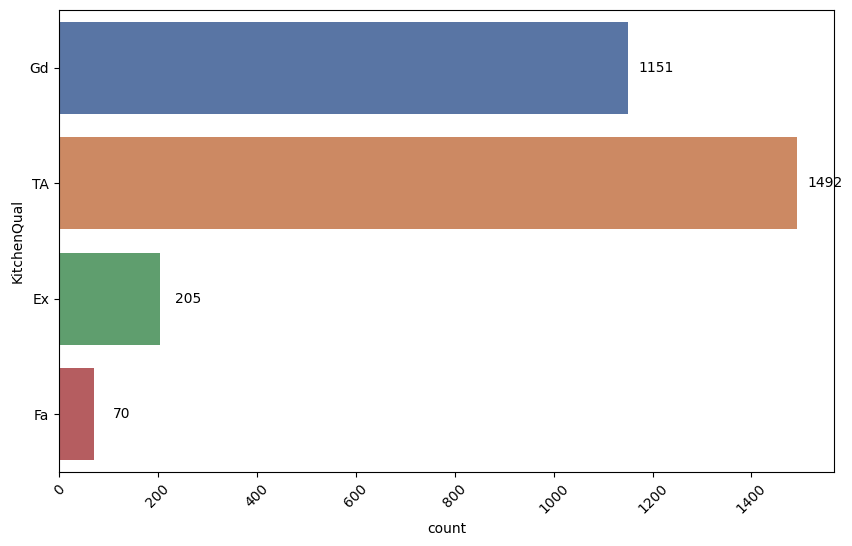

            Functional  Ratio
Functional                   
Typ               2717 93.080
Min2                70  2.398
Min1                65  2.227
Mod                 35  1.199
Maj1                19  0.651
Maj2                 9  0.308
Sev                  2  0.069
##########################################


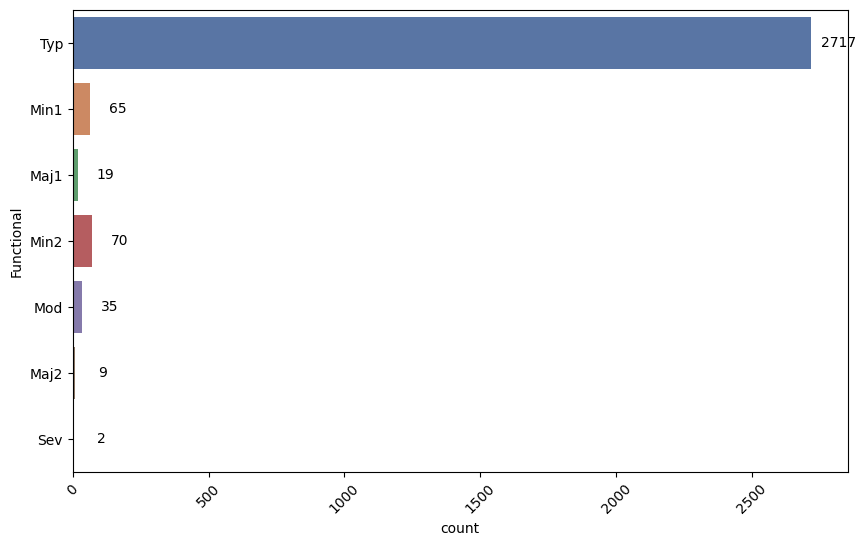

             FireplaceQu  Ratio
FireplaceQu                    
Gd                   744 25.488
TA                   592 20.281
Fa                    74  2.535
Po                    46  1.576
Ex                    43  1.473
##########################################


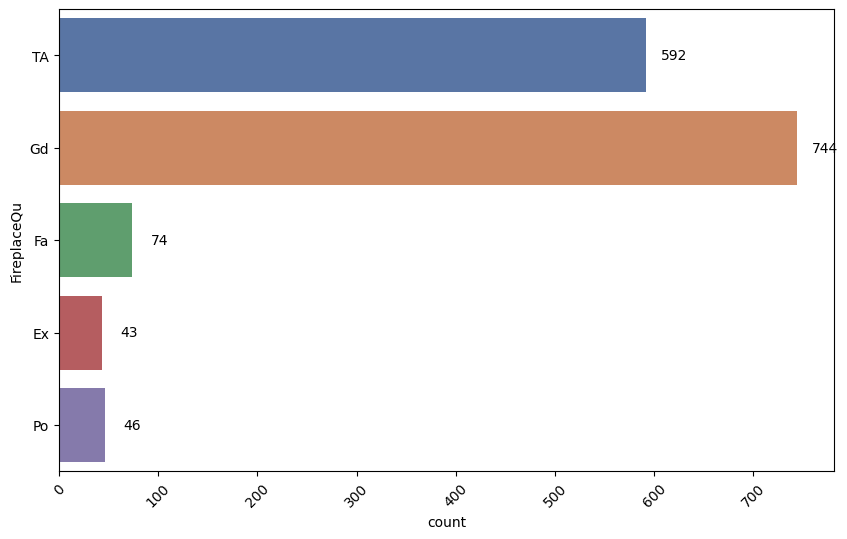

            GarageType  Ratio
GarageType                   
Attchd            1723 59.027
Detchd             779 26.687
BuiltIn            186  6.372
Basment             36  1.233
2Types              23  0.788
CarPort             15  0.514
##########################################


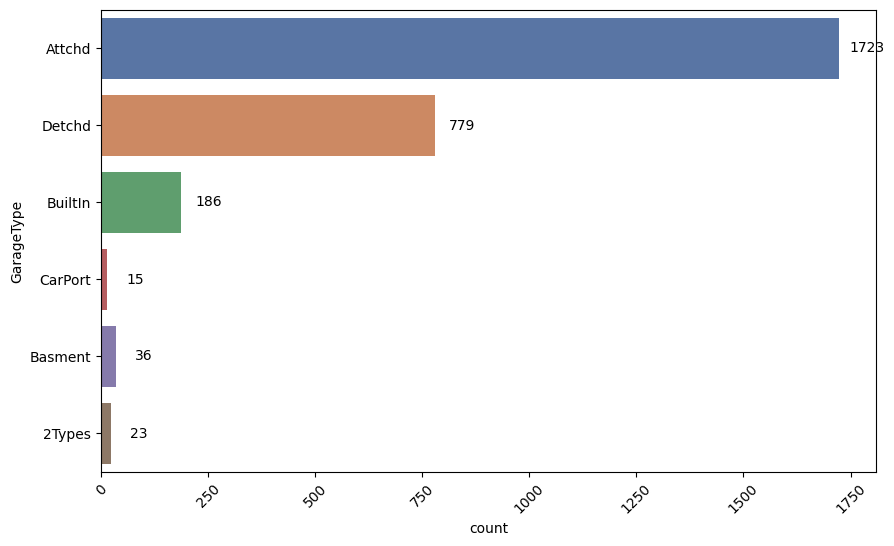

              GarageFinish  Ratio
GarageFinish                     
Unf                   1230 42.138
RFn                    811 27.783
Fin                    719 24.632
##########################################


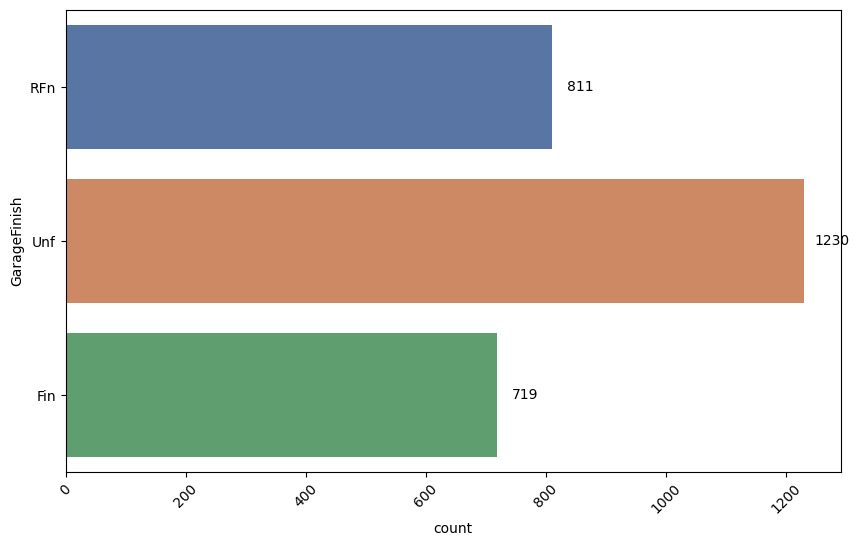

            GarageQual  Ratio
GarageQual                   
TA                2604 89.209
Fa                 124  4.248
Gd                  24  0.822
Po                   5  0.171
Ex                   3  0.103
##########################################


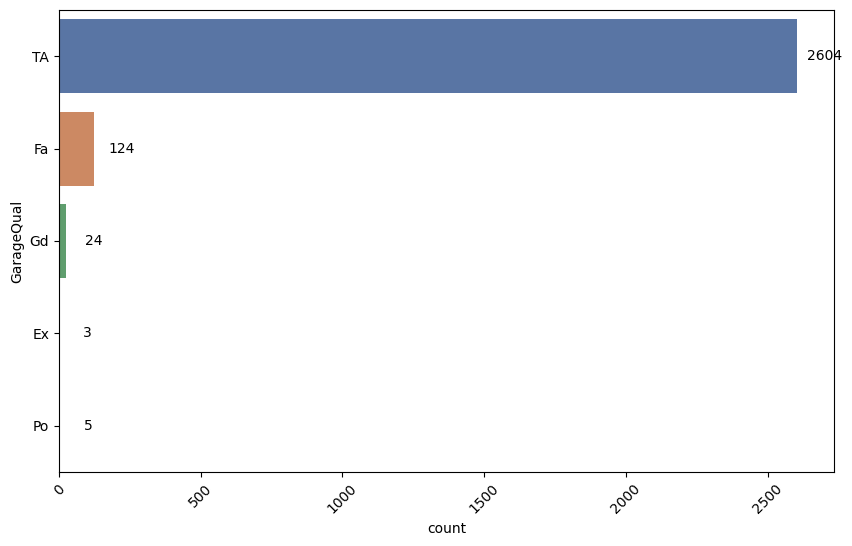

            GarageCond  Ratio
GarageCond                   
TA                2654 90.922
Fa                  74  2.535
Gd                  15  0.514
Po                  14  0.480
Ex                   3  0.103
##########################################


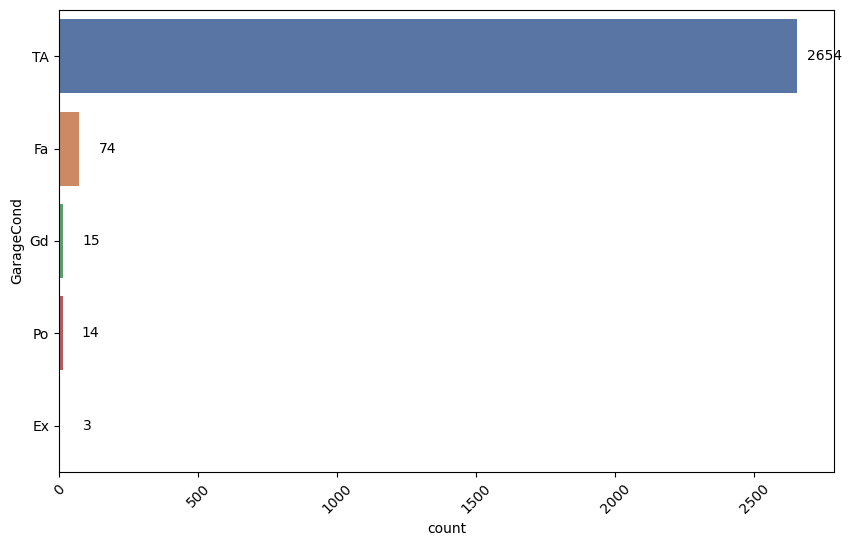

            PavedDrive  Ratio
PavedDrive                   
Y                 2641 90.476
N                  216  7.400
P                   62  2.124
##########################################


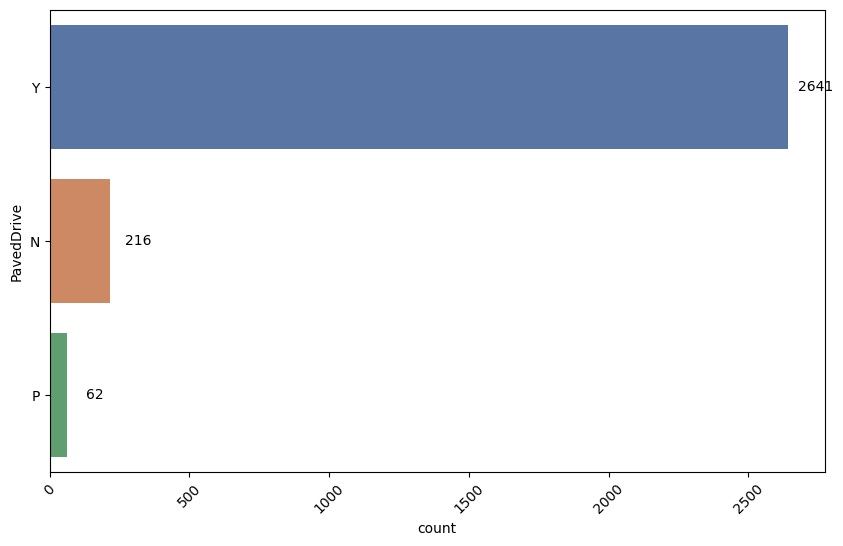

        PoolQC  Ratio
PoolQC               
Ex           4  0.137
Gd           4  0.137
Fa           2  0.069
##########################################


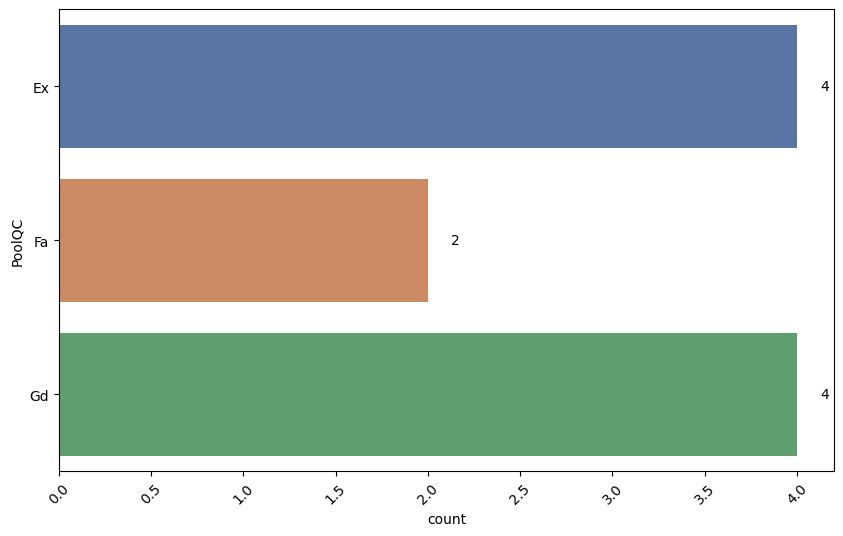

       Fence  Ratio
Fence              
MnPrv    329 11.271
GdPrv    118  4.042
GdWo     112  3.837
MnWw      12  0.411
##########################################


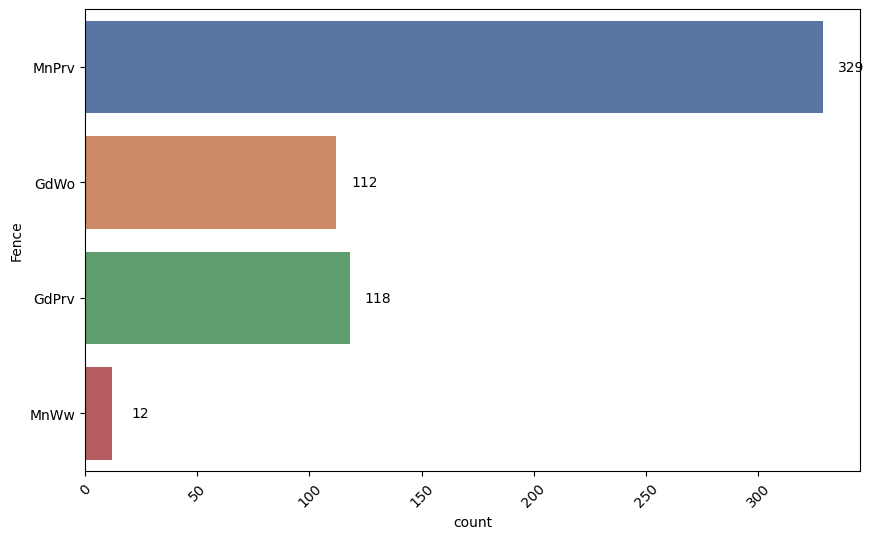

             MiscFeature  Ratio
MiscFeature                    
Shed                  95  3.255
Gar2                   5  0.171
Othr                   4  0.137
TenC                   1  0.034
##########################################


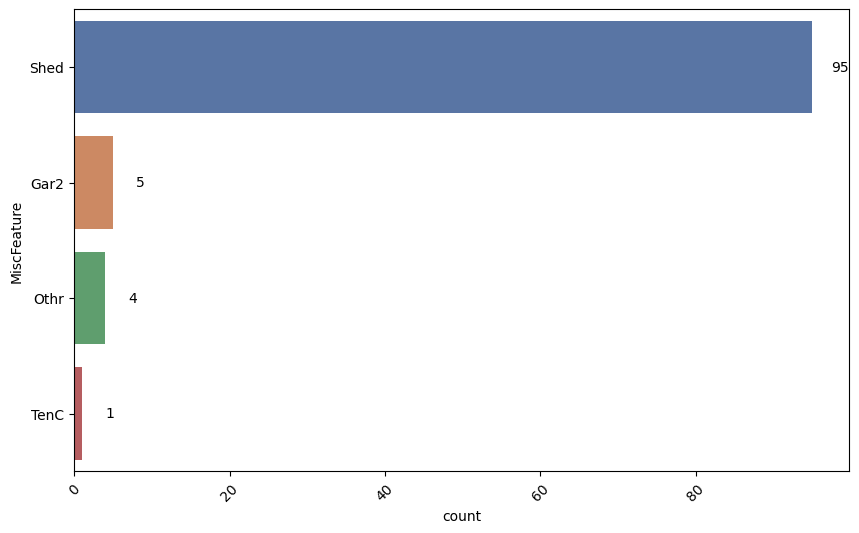

          SaleType  Ratio
SaleType                 
WD            2525 86.502
New            239  8.188
COD             87  2.980
ConLD           26  0.891
CWD             12  0.411
ConLI            9  0.308
ConLw            8  0.274
Oth              7  0.240
Con              5  0.171
##########################################


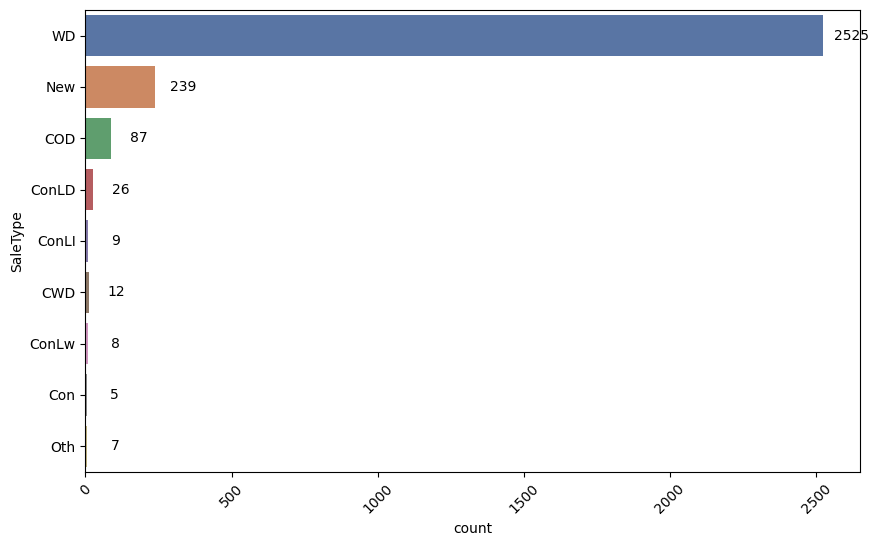

               SaleCondition  Ratio
SaleCondition                      
Normal                  2402 82.288
Partial                  245  8.393
Abnorml                  190  6.509
Family                    46  1.576
Alloca                    24  0.822
AdjLand                   12  0.411
##########################################


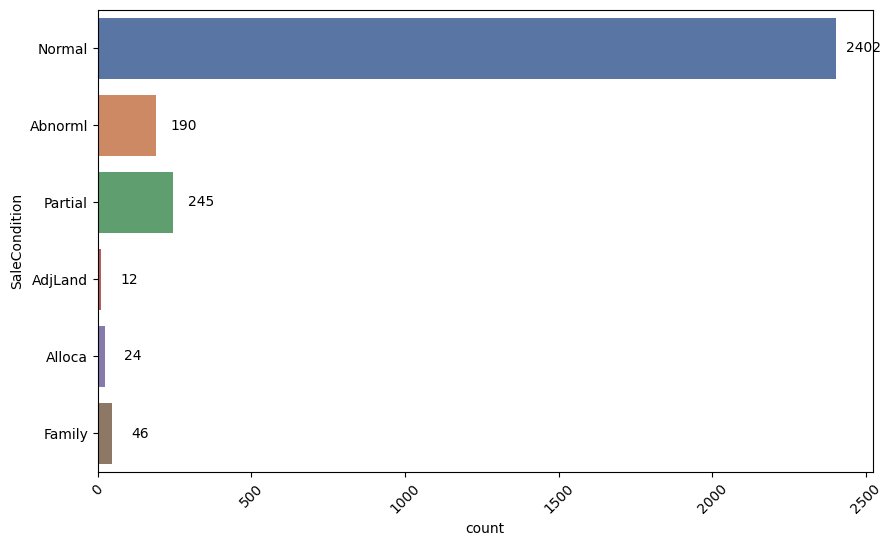

             OverallCond  Ratio
OverallCond                    
5                   1645 56.355
6                    531 18.191
7                    390 13.361
8                    144  4.933
4                    101  3.460
3                     50  1.713
9                     41  1.405
2                     10  0.343
1                      7  0.240
##########################################


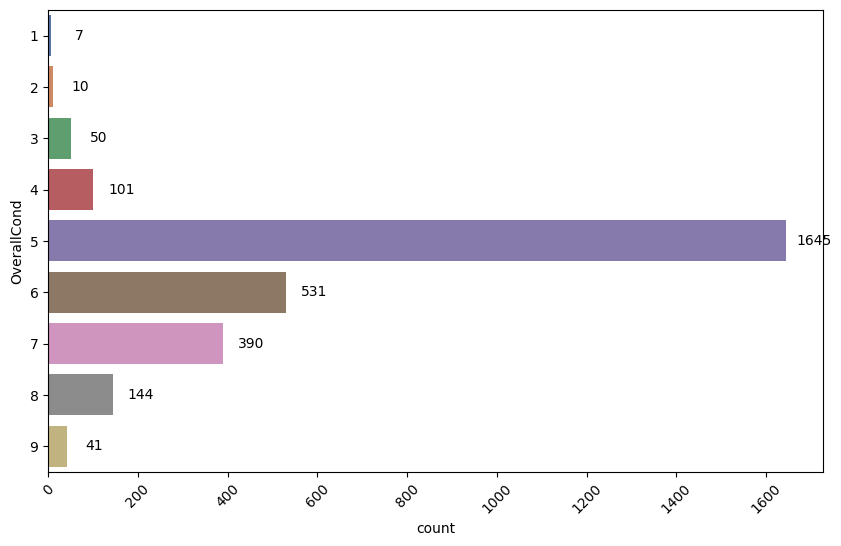

              BsmtFullBath  Ratio
BsmtFullBath                     
0.000                 1705 58.410
1.000                 1172 40.151
2.000                   38  1.302
3.000                    2  0.069
##########################################


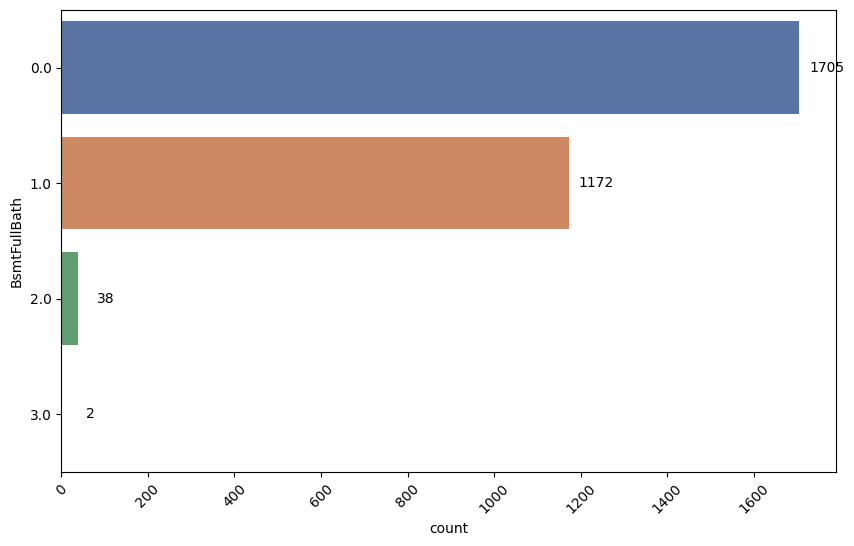

              BsmtHalfBath  Ratio
BsmtHalfBath                     
0.000                 2742 93.936
1.000                  171  5.858
2.000                    4  0.137
##########################################


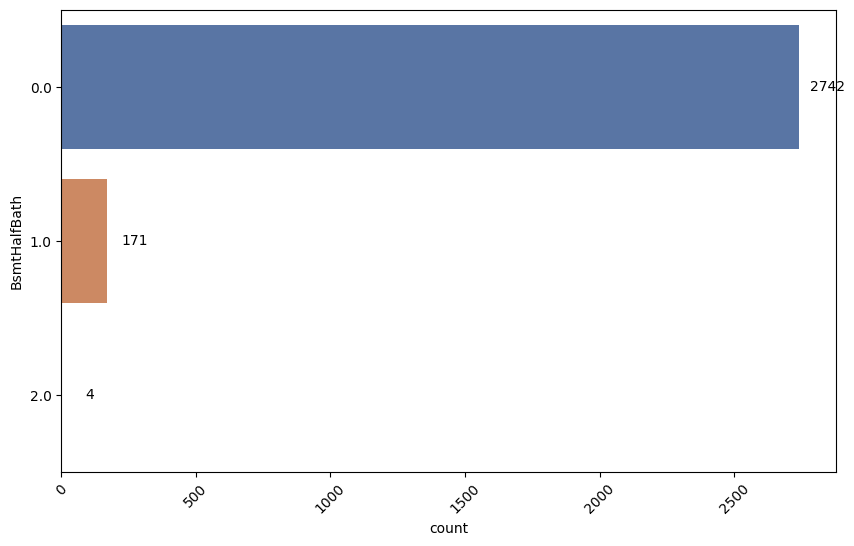

          FullBath  Ratio
FullBath                 
2             1530 52.415
1             1309 44.844
3               64  2.193
0               12  0.411
4                4  0.137
##########################################


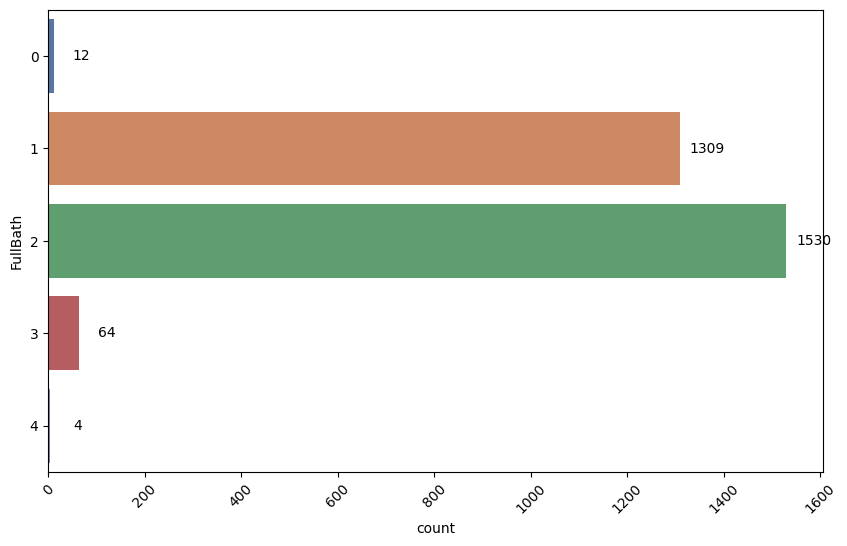

          HalfBath  Ratio
HalfBath                 
0             1834 62.830
1             1060 36.314
2               25  0.856
##########################################


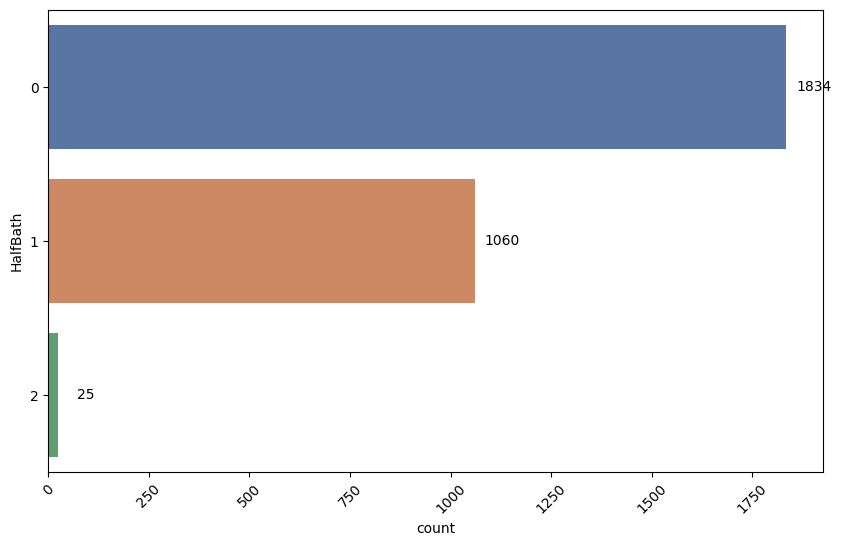

              BedroomAbvGr  Ratio
BedroomAbvGr                     
3                     1596 54.676
2                      742 25.420
4                      400 13.703
1                      103  3.529
5                       48  1.644
6                       21  0.719
0                        8  0.274
8                        1  0.034
##########################################


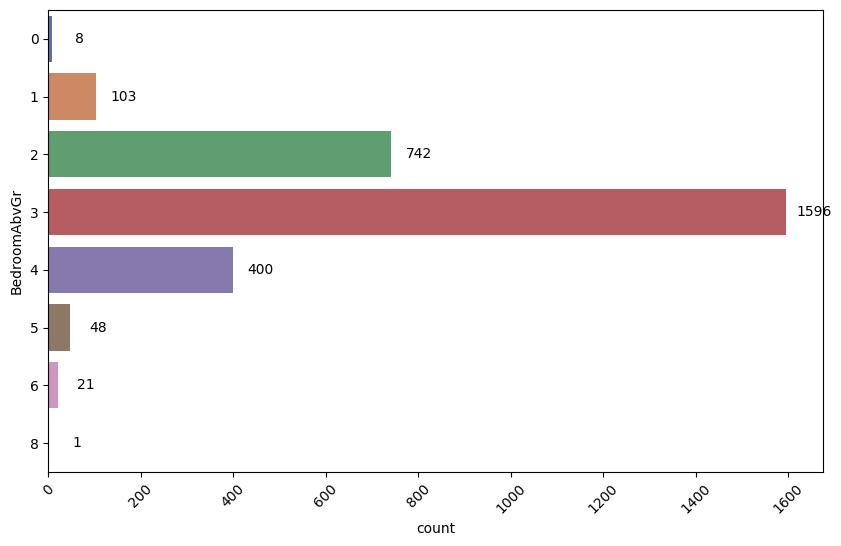

              KitchenAbvGr  Ratio
KitchenAbvGr                     
1                     2785 95.409
2                      129  4.419
0                        3  0.103
3                        2  0.069
##########################################


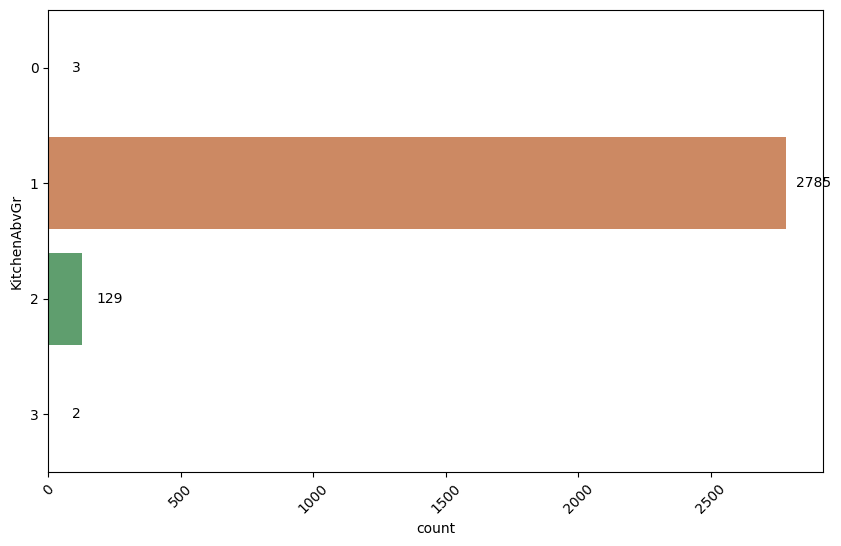

            Fireplaces  Ratio
Fireplaces                   
0                 1420 48.647
1                 1268 43.440
2                  219  7.503
3                   11  0.377
4                    1  0.034
##########################################


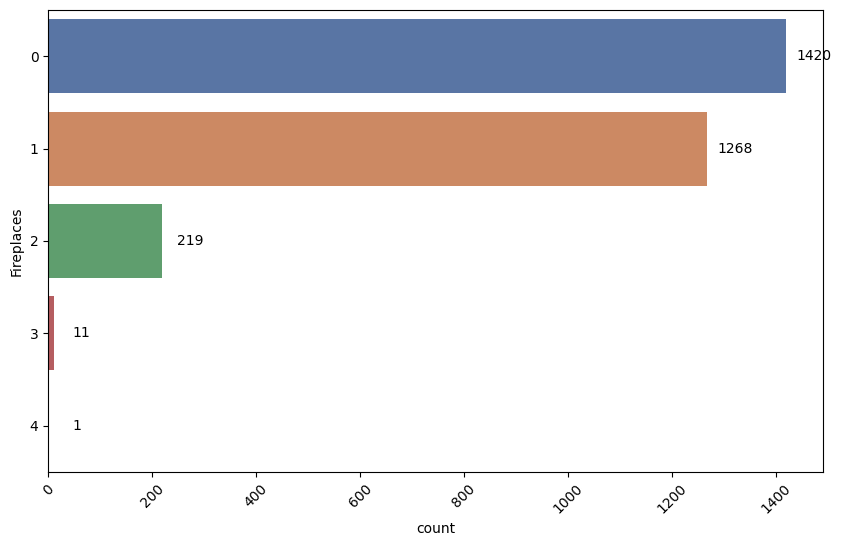

            GarageCars  Ratio
GarageCars                   
2.000             1594 54.608
1.000              776 26.584
3.000              374 12.813
0.000              157  5.379
4.000               16  0.548
5.000                1  0.034
##########################################


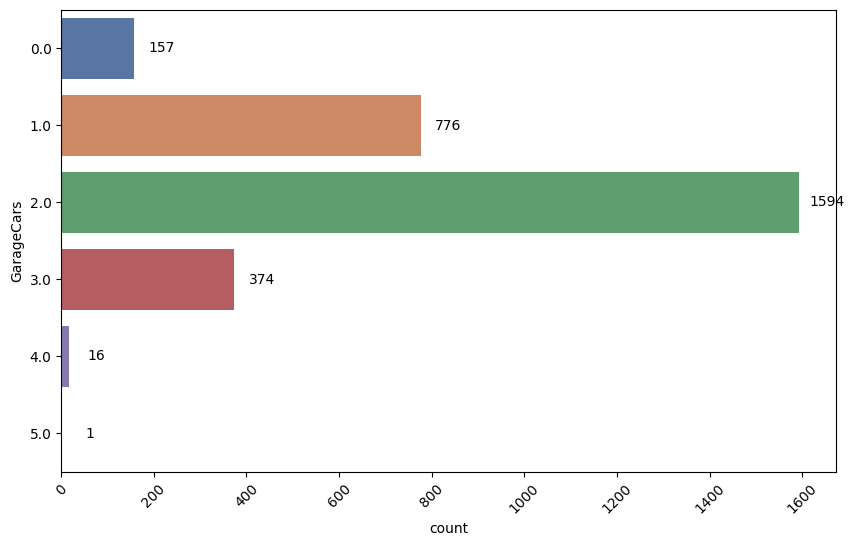

        YrSold  Ratio
YrSold               
2007       692 23.707
2009       647 22.165
2008       622 21.309
2006       619 21.206
2010       339 11.614
##########################################


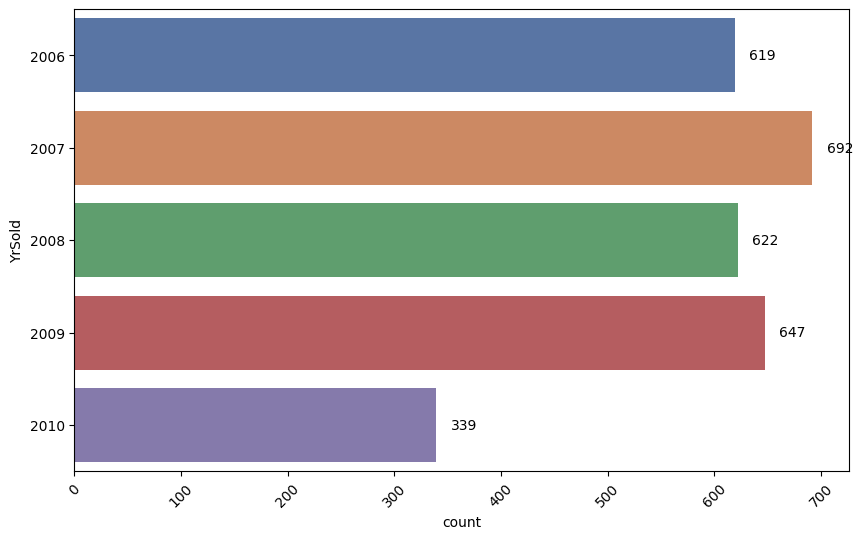

In [19]:
def cat_summary(dataframe, categorical_col, plot=False):
    # Kategori değerleri ve oranları
    print(pd.DataFrame({categorical_col: dataframe[categorical_col].value_counts(),
                        "Ratio": 100 * dataframe[categorical_col].value_counts() / len(dataframe)}))
    print("##########################################")

    if plot:
        plt.figure(figsize=(10, 6))
        ax = sns.countplot(y=categorical_col, data=dataframe, palette="deep")  # Renk paleti ekleme

        # Data label eklemek için
        for p in ax.patches:
            ax.annotate(format(p.get_width(), '.0f'),
                        (p.get_width(), p.get_y() + p.get_height() / 2),
                        ha='center', va='center',
                        xytext=(20, 0),  # Y ekseninde kaydırma
                        textcoords='offset points')

        plt.xticks(rotation=45)  # X ekseni yazılarını eğik yapma
        plt.show(block=True)


# Kategorik kolonlar için fonksiyonu çalıştırma
for col in cat_cols:
    cat_summary(df, col, plot=True)

count   2919.000
mean      57.138
std       42.518
min       20.000
5%        20.000
10%       20.000
20%       20.000
30%       20.000
40%       30.000
50%       50.000
60%       60.000
70%       60.000
80%       80.000
90%      120.000
95%      160.000
99%      190.000
max      190.000
Name: MSSubClass, dtype: float64


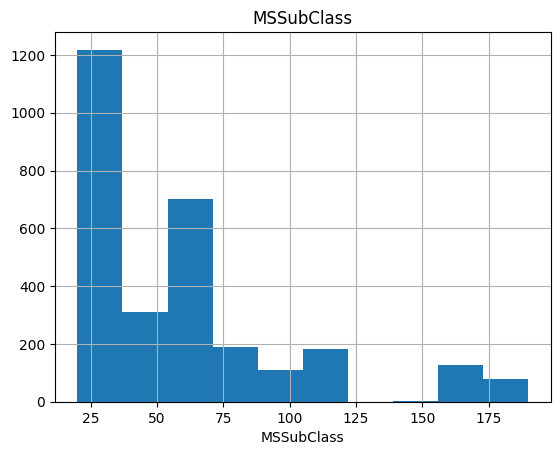

count   2433.000
mean      69.306
std       23.345
min       21.000
5%        32.000
10%       43.000
20%       53.000
30%       60.000
40%       63.000
50%       68.000
60%       73.000
70%       78.000
80%       84.000
90%       95.000
95%      107.000
99%      135.680
max      313.000
Name: LotFrontage, dtype: float64


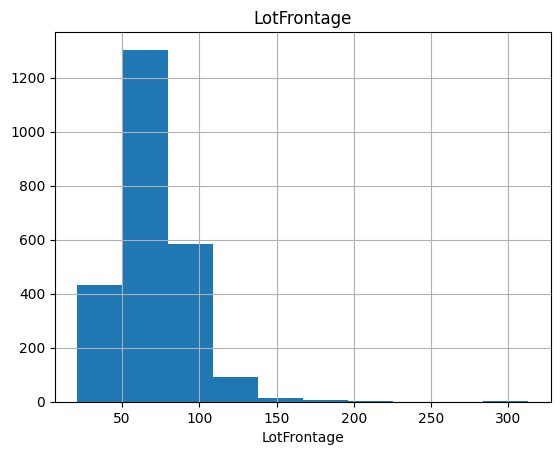

count     2919.000
mean     10168.114
std       7886.996
min       1300.000
5%        3182.000
10%       4922.400
20%       7007.600
30%       7960.400
40%       8741.000
50%       9453.000
60%      10151.600
70%      11001.200
80%      12203.800
90%      14300.600
95%      17142.900
99%      33038.640
max     215245.000
Name: LotArea, dtype: float64


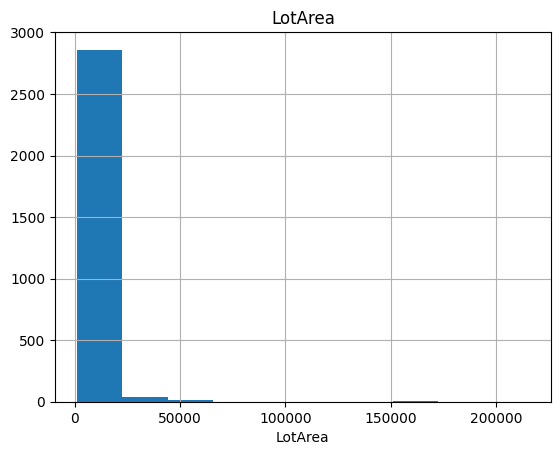

count   2919.000
mean       6.089
std        1.410
min        1.000
5%         4.000
10%        5.000
20%        5.000
30%        5.000
40%        6.000
50%        6.000
60%        6.000
70%        7.000
80%        7.000
90%        8.000
95%        8.000
99%       10.000
max       10.000
Name: OverallQual, dtype: float64


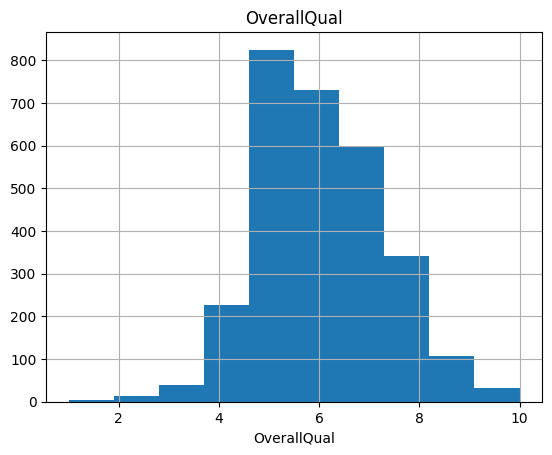

count   2919.000
mean    1971.313
std       30.291
min     1872.000
5%      1915.000
10%     1924.000
20%     1947.000
30%     1957.000
40%     1965.000
50%     1973.000
60%     1984.000
70%     1998.000
80%     2003.000
90%     2006.000
95%     2007.000
99%     2008.000
max     2010.000
Name: YearBuilt, dtype: float64


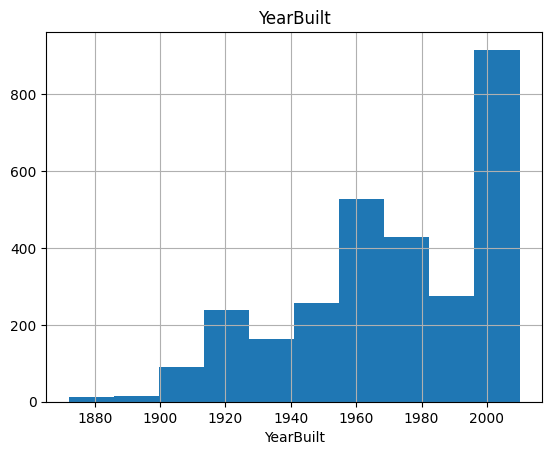

count   2919.000
mean    1984.264
std       20.894
min     1950.000
5%      1950.000
10%     1950.000
20%     1960.000
30%     1970.000
40%     1978.000
50%     1993.000
60%     1998.000
70%     2002.000
80%     2005.000
90%     2006.200
95%     2007.000
99%     2009.000
max     2010.000
Name: YearRemodAdd, dtype: float64


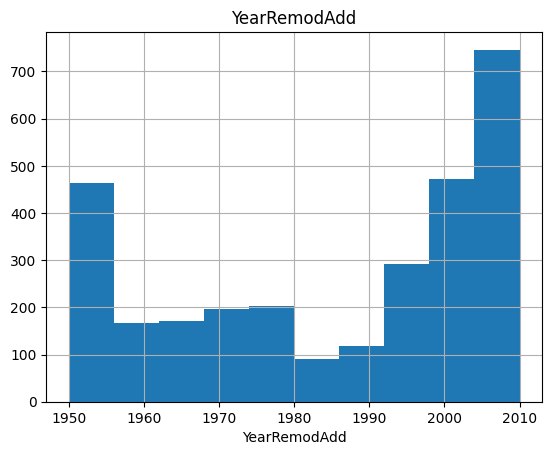

count   2896.000
mean     102.201
std      179.334
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%        0.000
70%      120.000
80%      202.000
90%      325.500
95%      466.500
99%      771.050
max     1600.000
Name: MasVnrArea, dtype: float64


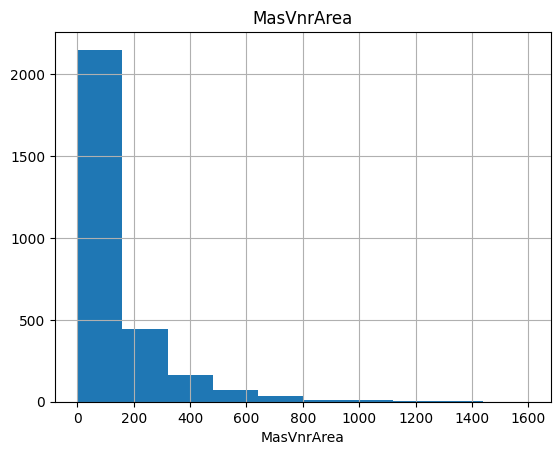

count   2918.000
mean     441.423
std      455.611
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%      202.600
50%      368.500
60%      515.200
70%      656.000
80%      812.000
90%     1056.900
95%     1274.000
99%     1635.320
max     5644.000
Name: BsmtFinSF1, dtype: float64


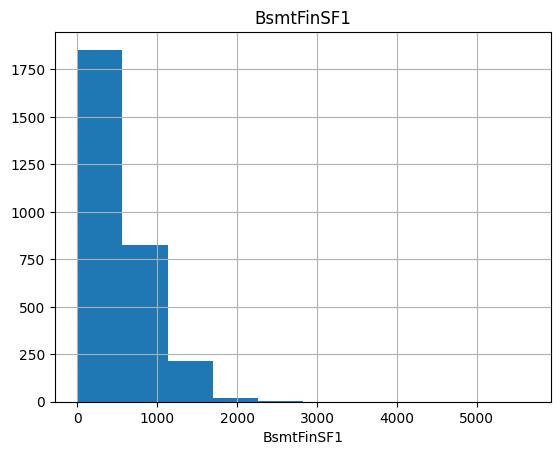

count   2918.000
mean      49.582
std      169.206
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%        0.000
70%        0.000
80%        0.000
90%      125.600
95%      435.000
99%      874.660
max     1526.000
Name: BsmtFinSF2, dtype: float64


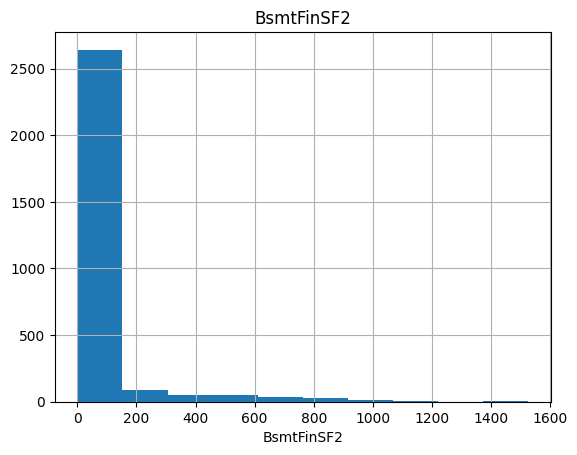

count   2918.000
mean     560.772
std      439.544
min        0.000
5%         0.000
10%       56.000
20%      174.000
30%      270.000
40%      365.800
50%      467.000
60%      595.000
70%      732.000
80%      892.600
90%     1212.600
95%     1474.900
99%     1776.490
max     2336.000
Name: BsmtUnfSF, dtype: float64


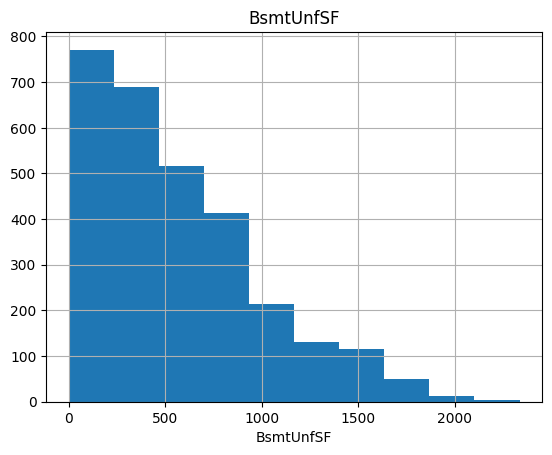

count   2918.000
mean    1051.778
std      440.766
min        0.000
5%       455.250
10%      600.000
20%      741.000
30%      836.000
40%      911.000
50%      989.500
60%     1089.200
70%     1216.000
80%     1392.000
90%     1614.000
95%     1776.150
99%     2198.300
max     6110.000
Name: TotalBsmtSF, dtype: float64


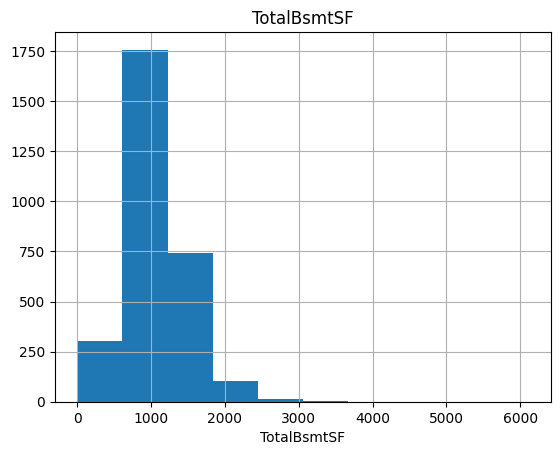

count   2919.000
mean    1159.582
std      392.362
min      334.000
5%       665.900
10%      744.800
20%      847.000
30%      914.000
40%      996.200
50%     1082.000
60%     1180.000
70%     1314.000
80%     1483.400
90%     1675.000
95%     1830.100
99%     2288.020
max     5095.000
Name: 1stFlrSF, dtype: float64


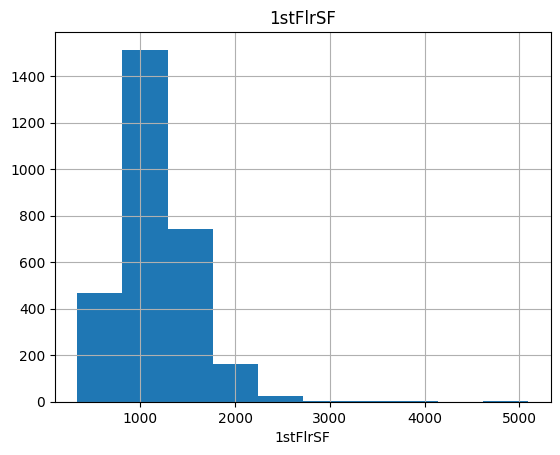

count   2919.000
mean     336.484
std      428.701
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%      427.400
70%      636.000
80%      770.800
90%      925.000
95%     1131.200
99%     1400.200
max     2065.000
Name: 2ndFlrSF, dtype: float64


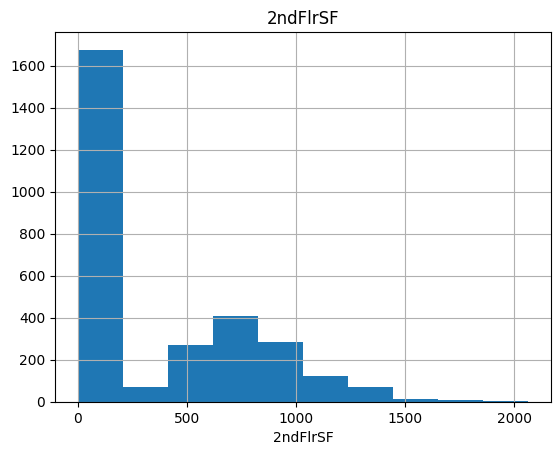

count   2919.000
mean       4.694
std       46.397
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%        0.000
70%        0.000
80%        0.000
90%        0.000
95%        0.000
99%      153.840
max     1064.000
Name: LowQualFinSF, dtype: float64


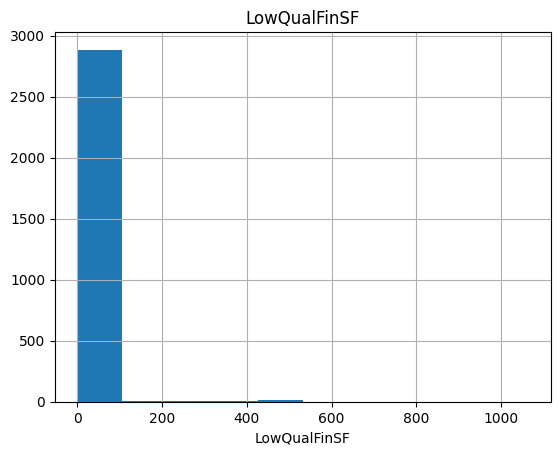

count   2919.000
mean    1500.760
std      506.051
min      334.000
5%       861.000
10%      923.800
20%     1064.600
30%     1200.000
40%     1329.200
50%     1444.000
60%     1560.000
70%     1680.000
80%     1838.400
90%     2153.200
95%     2464.200
99%     2935.720
max     5642.000
Name: GrLivArea, dtype: float64


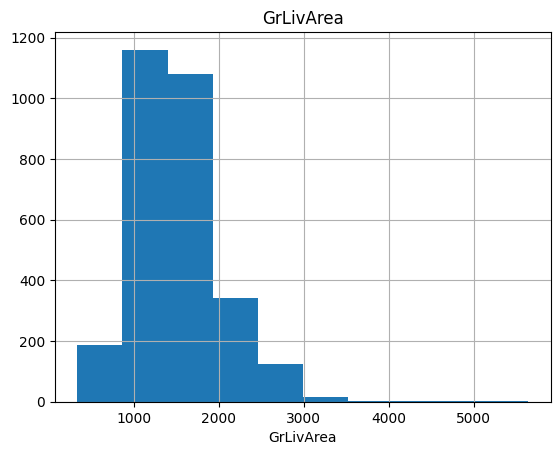

count   2919.000
mean       6.452
std        1.569
min        2.000
5%         4.000
10%        5.000
20%        5.000
30%        6.000
40%        6.000
50%        6.000
60%        7.000
70%        7.000
80%        8.000
90%        8.000
95%        9.000
99%       11.000
max       15.000
Name: TotRmsAbvGrd, dtype: float64


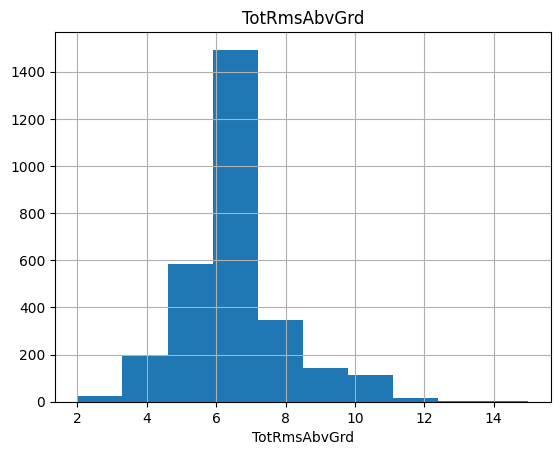

count   2760.000
mean    1978.113
std       25.574
min     1895.000
5%      1928.000
10%     1941.000
20%     1957.000
30%     1964.000
40%     1972.000
50%     1979.000
60%     1993.000
70%     1999.000
80%     2004.000
90%     2006.000
95%     2007.000
99%     2009.000
max     2207.000
Name: GarageYrBlt, dtype: float64


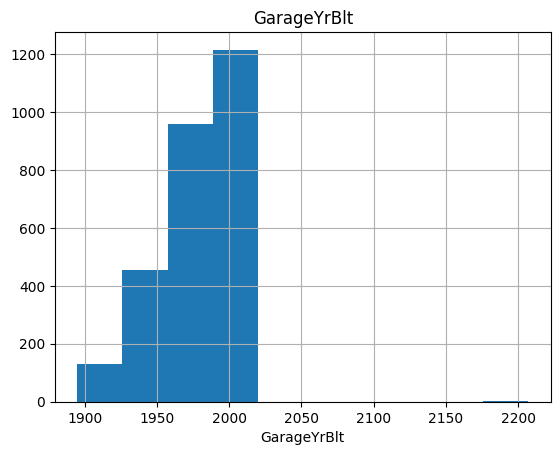

count   2918.000
mean     472.875
std      215.395
min        0.000
5%         0.000
10%      240.000
20%      296.000
30%      379.000
40%      440.000
50%      480.000
60%      513.000
70%      560.900
80%      621.000
90%      758.000
95%      856.150
99%     1019.490
max     1488.000
Name: GarageArea, dtype: float64


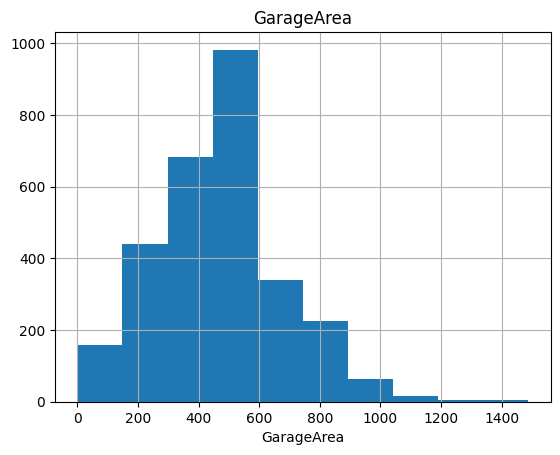

count   2919.000
mean      93.710
std      126.527
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%      100.000
70%      144.000
80%      192.000
90%      257.000
95%      328.000
99%      500.820
max     1424.000
Name: WoodDeckSF, dtype: float64


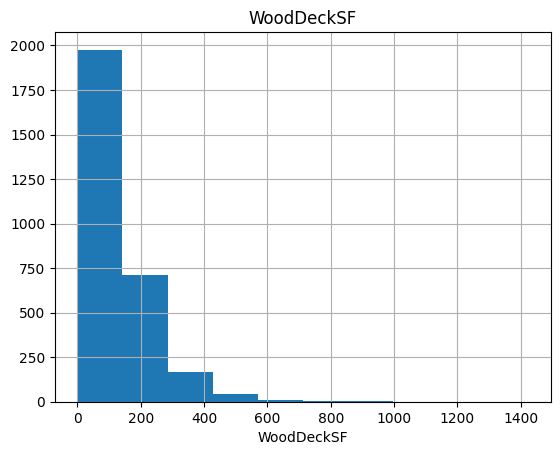

count   2919.000
mean      47.487
std       67.575
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%       26.000
60%       40.000
70%       58.000
80%       85.000
90%      131.200
95%      183.100
99%      284.460
max      742.000
Name: OpenPorchSF, dtype: float64


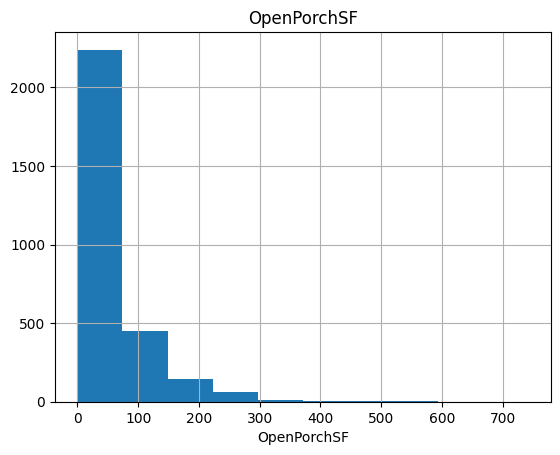

count   2919.000
mean      23.098
std       64.244
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%        0.000
70%        0.000
80%        0.000
90%      112.000
95%      176.000
99%      264.000
max     1012.000
Name: EnclosedPorch, dtype: float64


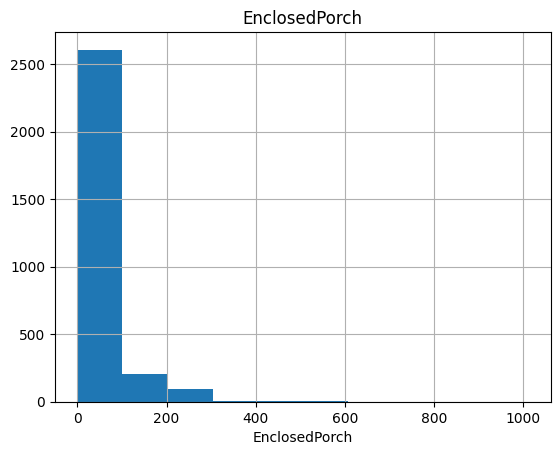

count   2919.000
mean       2.602
std       25.188
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%        0.000
70%        0.000
80%        0.000
90%        0.000
95%        0.000
99%      144.000
max      508.000
Name: 3SsnPorch, dtype: float64


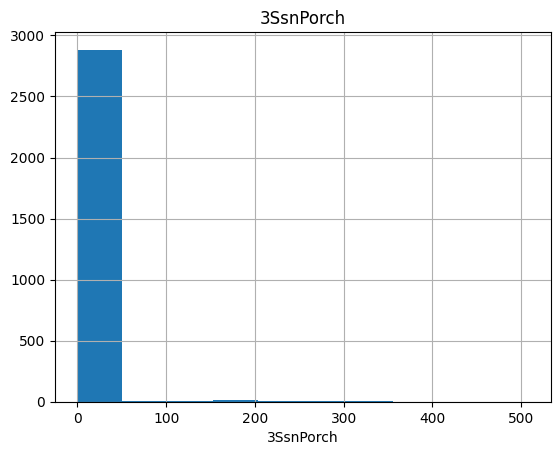

count   2919.000
mean      16.062
std       56.184
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%        0.000
70%        0.000
80%        0.000
90%        0.000
95%      161.000
99%      259.820
max      576.000
Name: ScreenPorch, dtype: float64


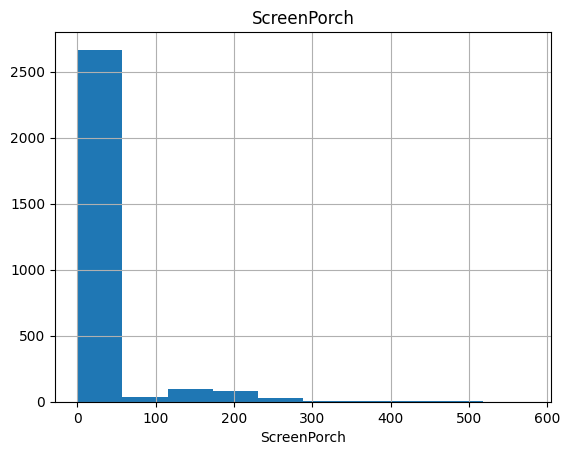

count   2919.000
mean       2.252
std       35.664
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%        0.000
70%        0.000
80%        0.000
90%        0.000
95%        0.000
99%        0.000
max      800.000
Name: PoolArea, dtype: float64


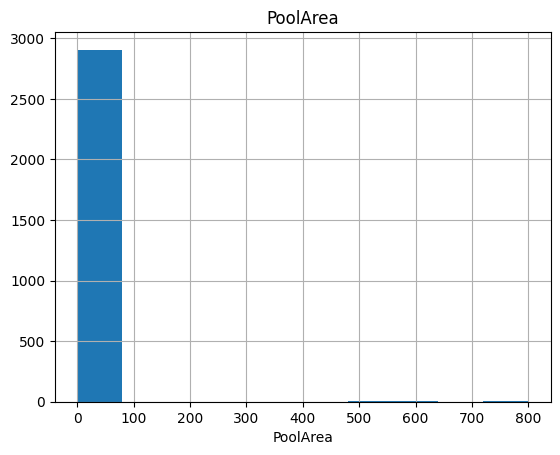

count    2919.000
mean       50.826
std       567.402
min         0.000
5%          0.000
10%         0.000
20%         0.000
30%         0.000
40%         0.000
50%         0.000
60%         0.000
70%         0.000
80%         0.000
90%         0.000
95%         0.000
99%       982.000
max     17000.000
Name: MiscVal, dtype: float64


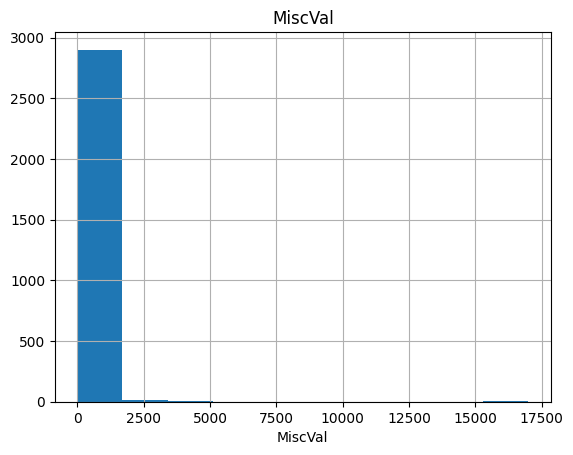

count   2919.000
mean       6.213
std        2.715
min        1.000
5%         2.000
10%        3.000
20%        4.000
30%        5.000
40%        6.000
50%        6.000
60%        7.000
70%        7.000
80%        8.000
90%       10.000
95%       11.000
99%       12.000
max       12.000
Name: MoSold, dtype: float64


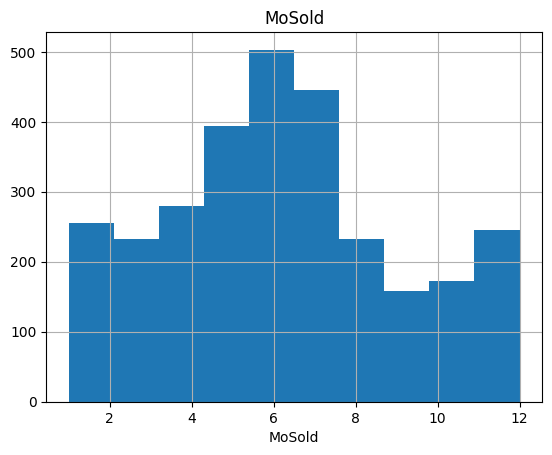

count     1460.000
mean    180921.196
std      79442.503
min      34900.000
5%       88000.000
10%     106475.000
20%     124000.000
30%     135500.000
40%     147000.000
50%     163000.000
60%     179280.000
70%     198620.000
80%     230000.000
90%     278000.000
95%     326100.000
99%     442567.010
max     755000.000
Name: SalePrice, dtype: float64


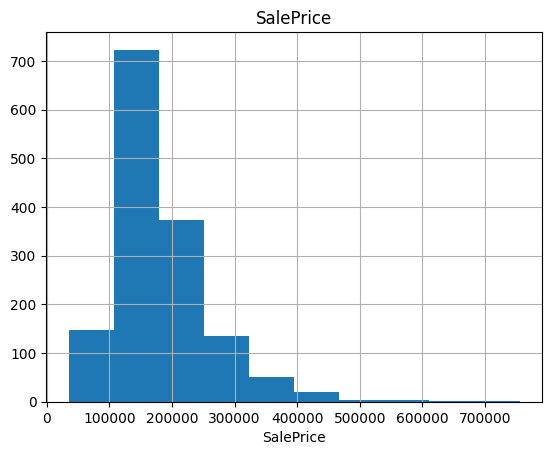

In [20]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist()
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

for col in num_cols:
    num_summary(df, col, plot=True)

In [21]:
def target_summary_with_cat(dataframe, target, categorical_col):
    print(categorical_col)
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean(),
                        "Count": dataframe[categorical_col].value_counts(),
                        "Ratio": 100 * dataframe[categorical_col].value_counts() / len(dataframe)}), end="\n\n\n")

for col in cat_cols:
    target_summary_with_cat(df, "SalePrice", col)

MSZoning
          TARGET_MEAN  Count  Ratio
MSZoning                           
C (all)     74528.000     25  0.856
FV         214014.062    139  4.762
RH         131558.375     26  0.891
RL         191004.995   2265 77.595
RM         126316.830    460 15.759


Street
        TARGET_MEAN  Count  Ratio
Street                           
Grvl     130190.500     12  0.411
Pave     181130.539   2907 99.589


Alley
       TARGET_MEAN  Count  Ratio
Alley                           
Grvl    122219.080    120  4.111
Pave    168000.585     78  2.672


LotShape
          TARGET_MEAN  Count  Ratio
LotShape                           
IR1        206101.665    968 33.162
IR2        239833.366     76  2.604
IR3        216036.500     16  0.548
Reg        164754.818   1859 63.686


LandContour
             TARGET_MEAN  Count  Ratio
LandContour                           
Bnk           143104.079    117  4.008
HLS           231533.940    120  4.111
Low           203661.111     60  2.055
Lvl           1801

In [22]:
def outlier_thresholds(dataframe, col_name, q1=0.01, q3=0.99):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

def replace_with_thresholds(dataframe, variable, q1=0.01, q3=0.99):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1=0.01, q3=0.99)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit


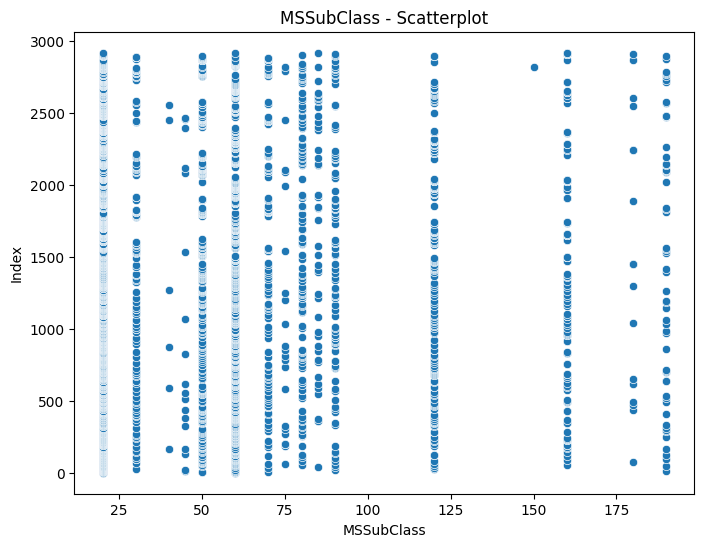

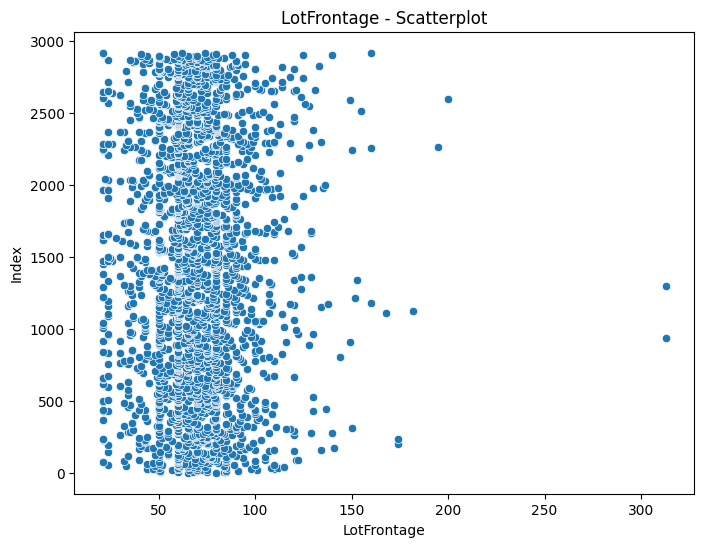

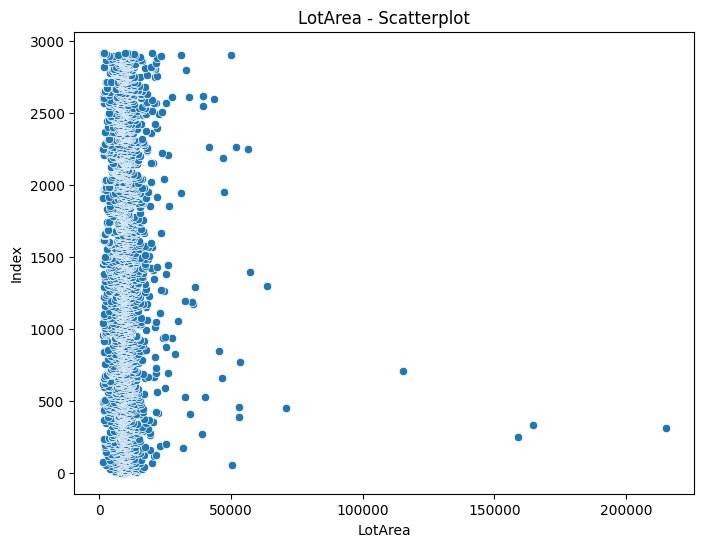

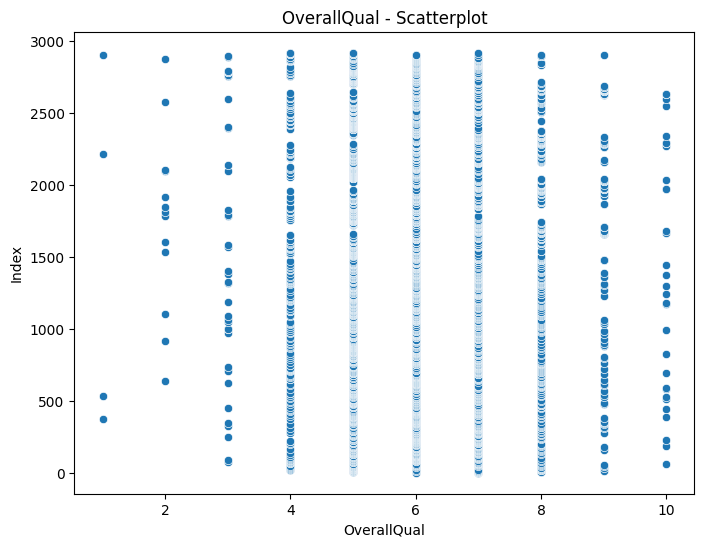

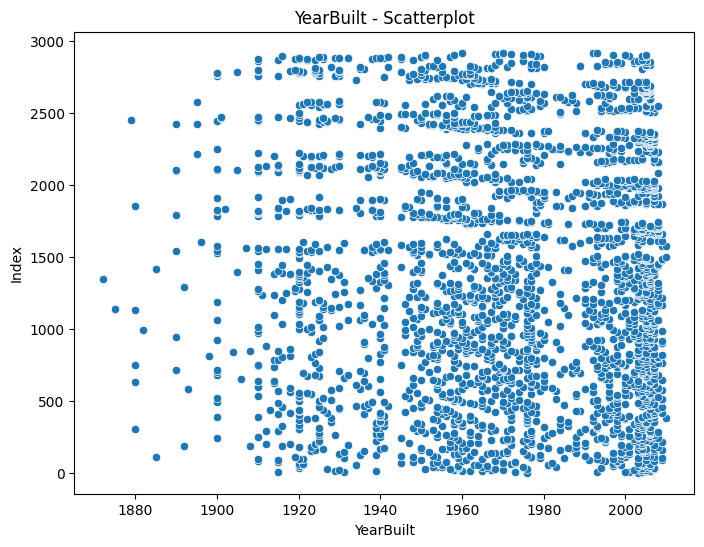

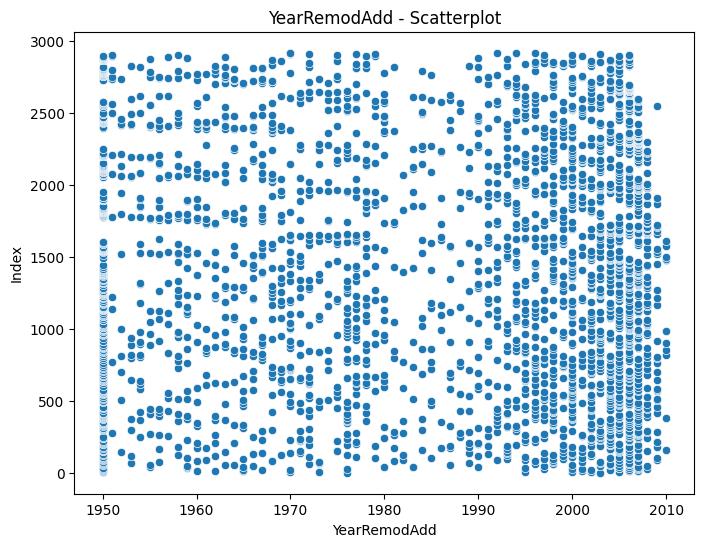

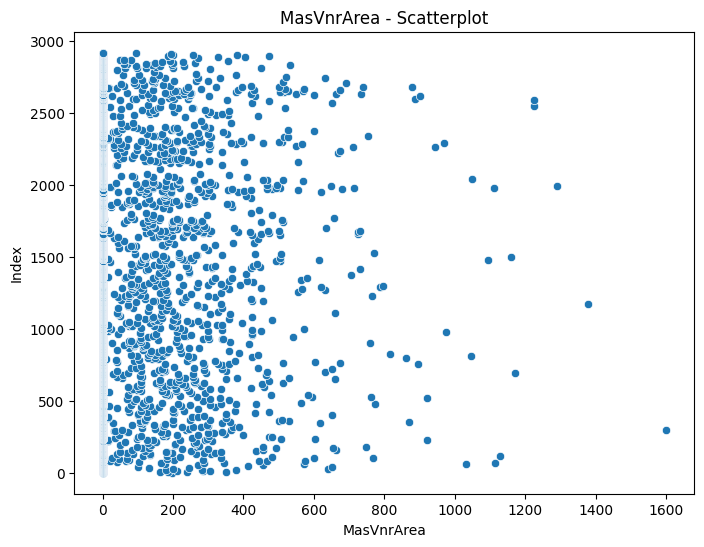

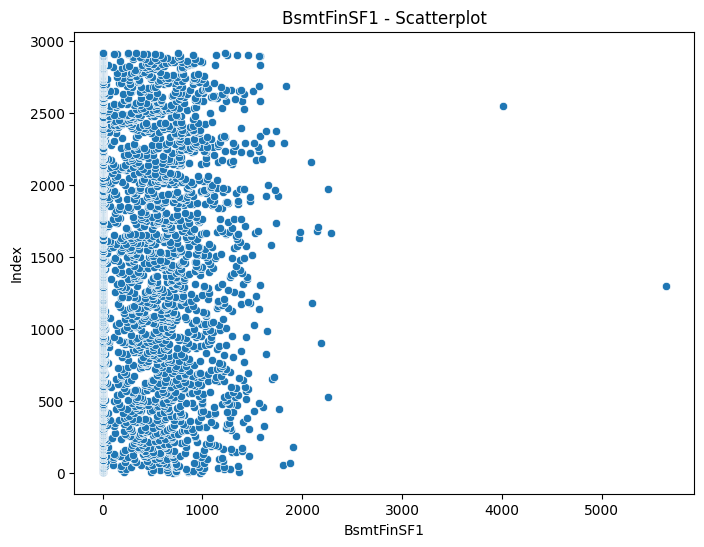

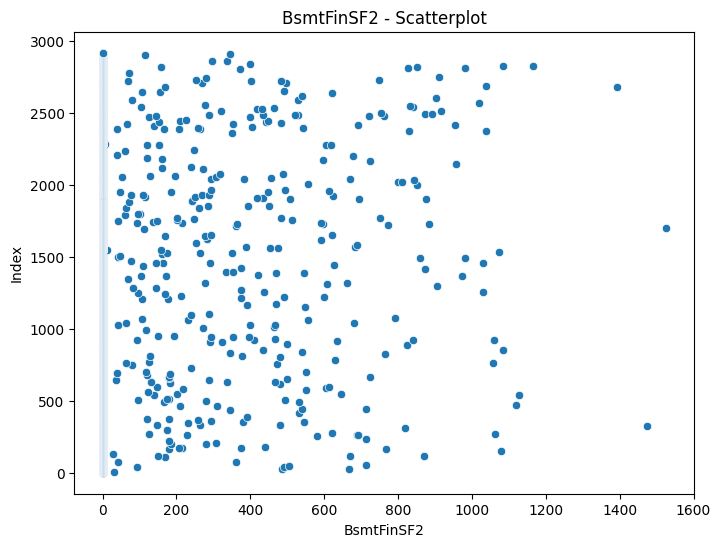

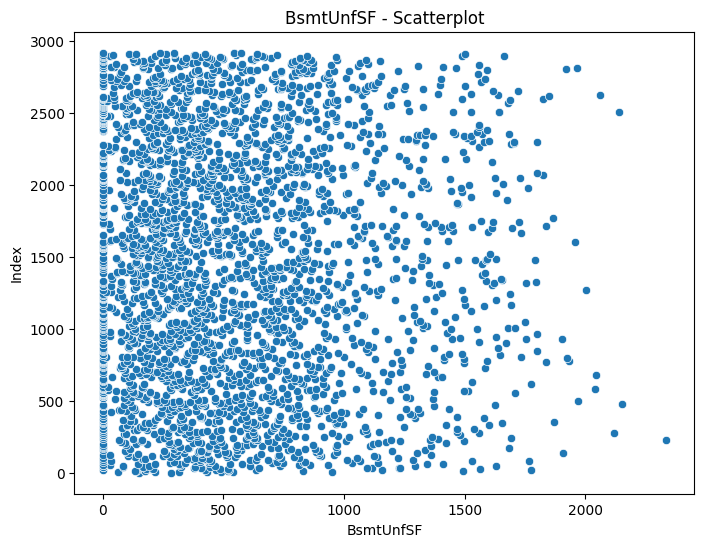

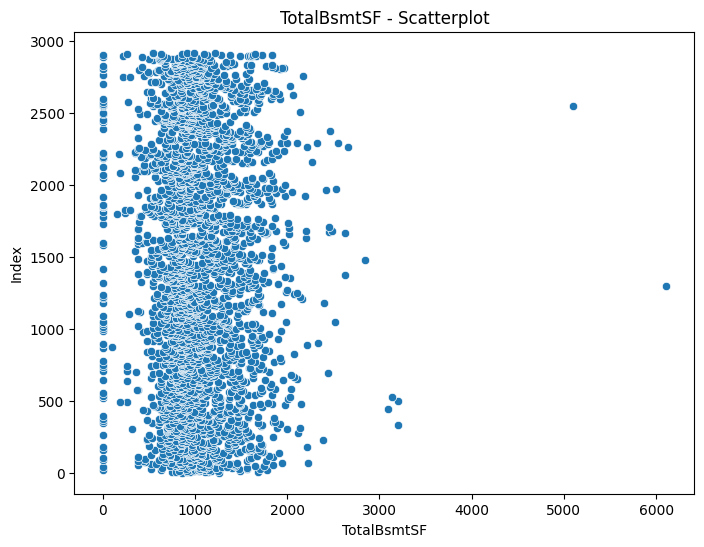

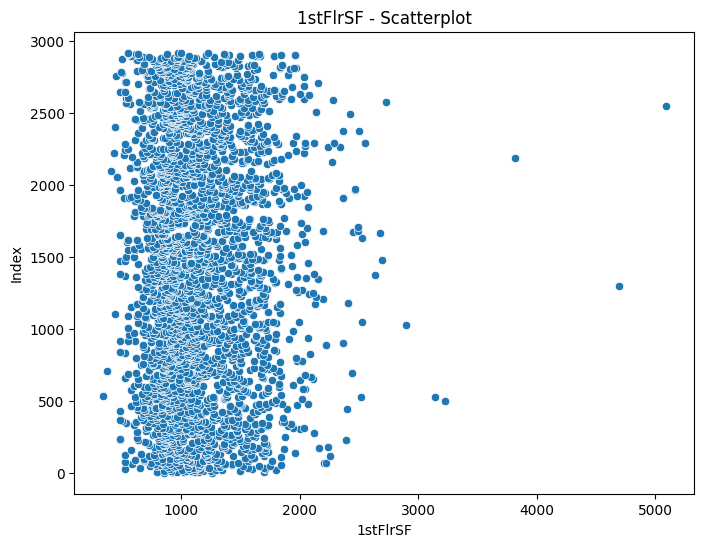

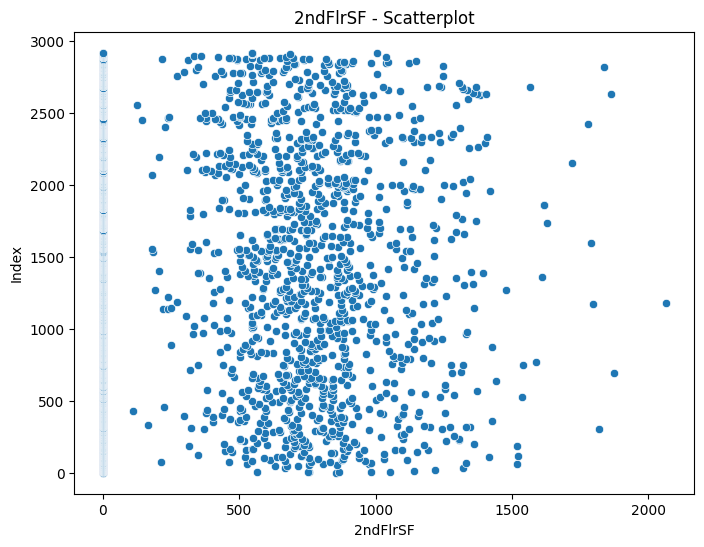

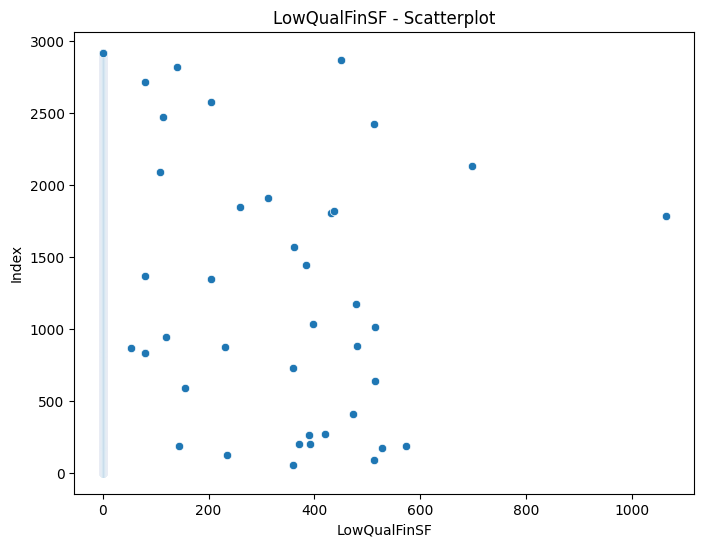

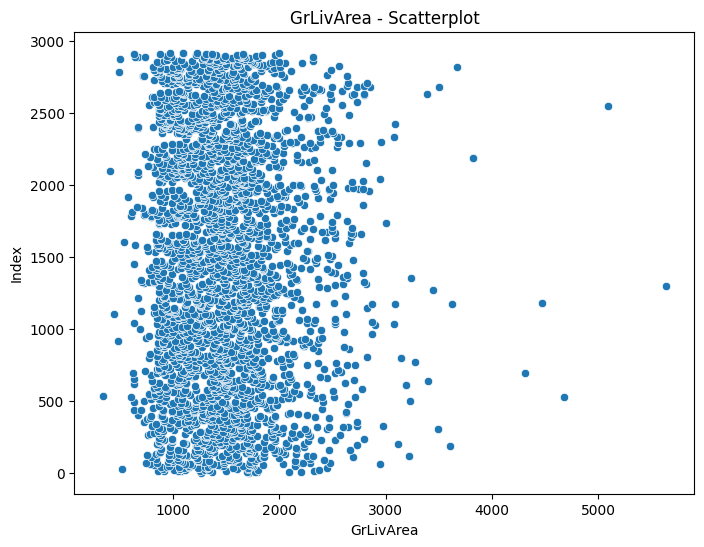

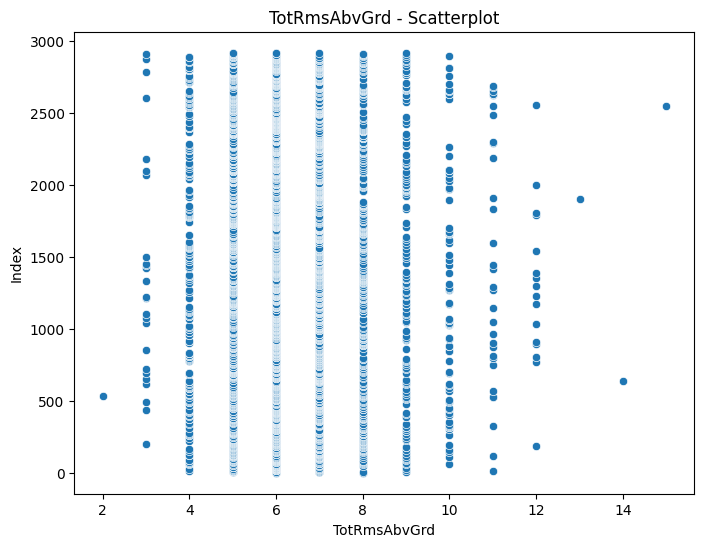

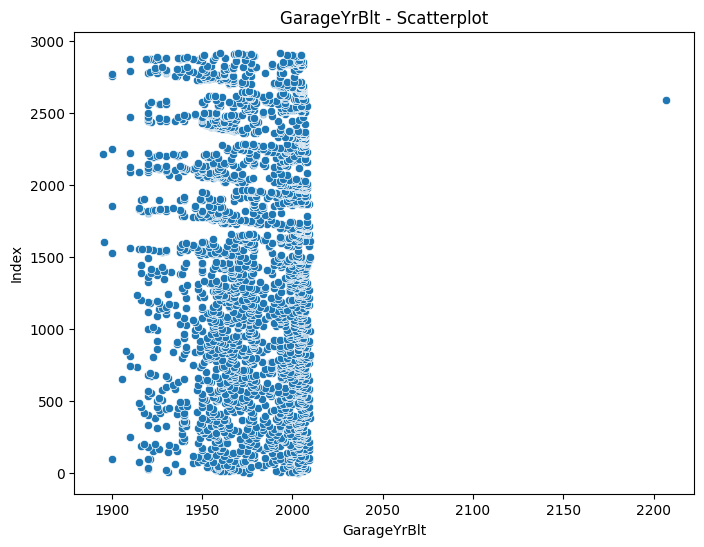

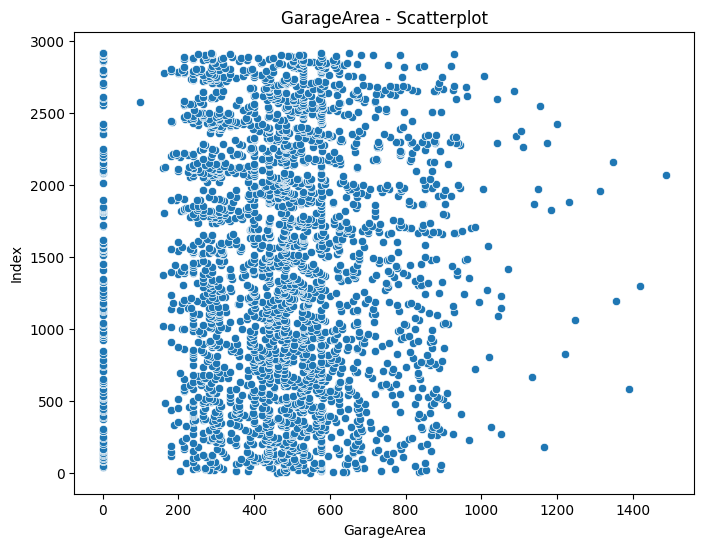

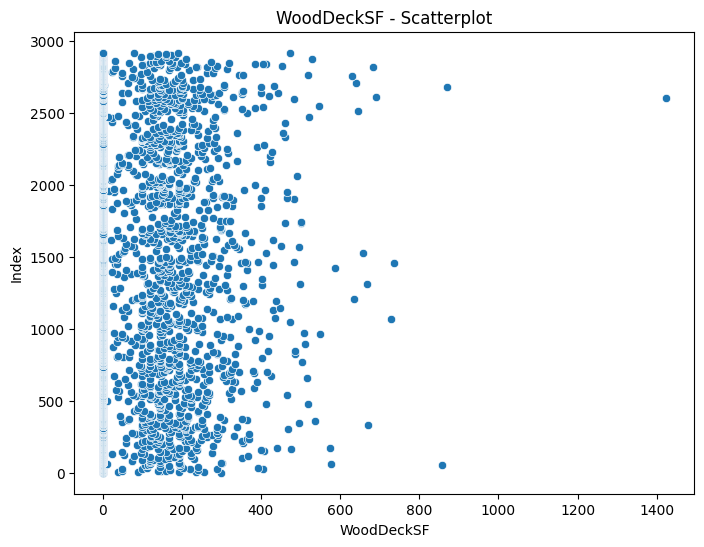

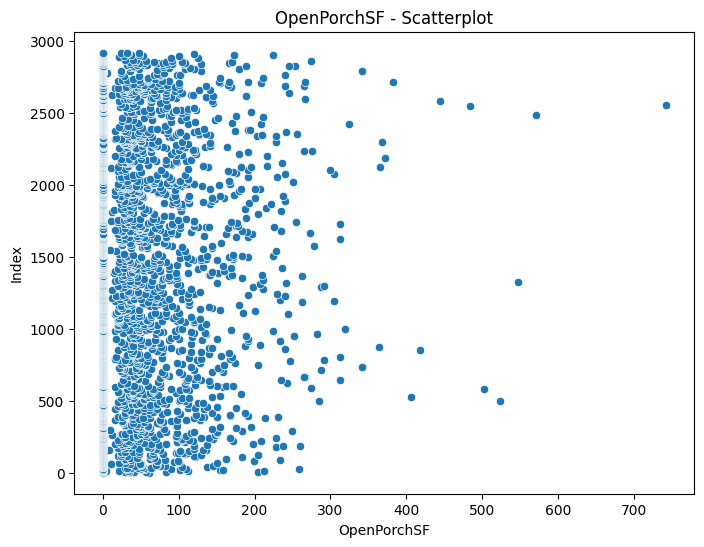

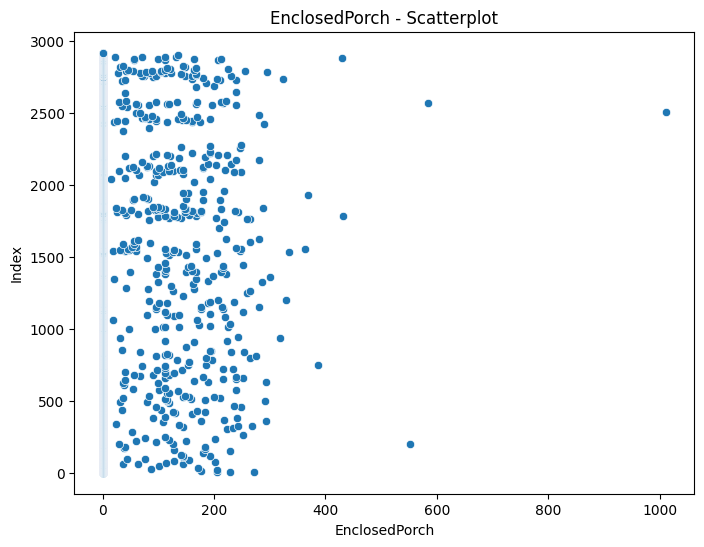

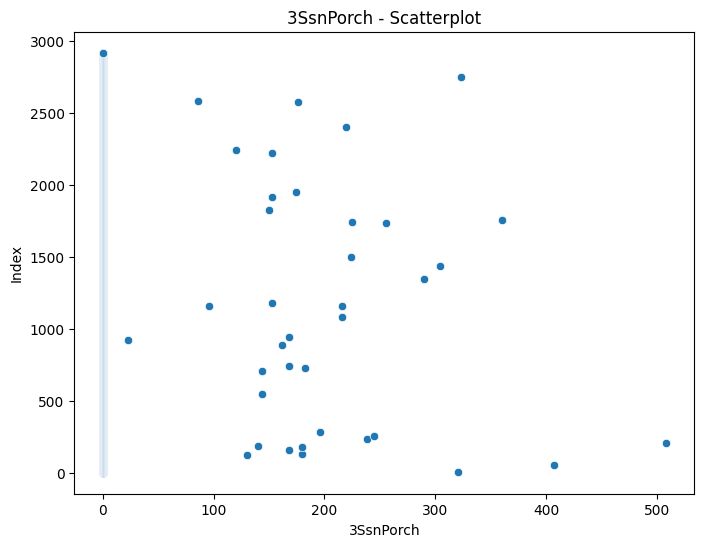

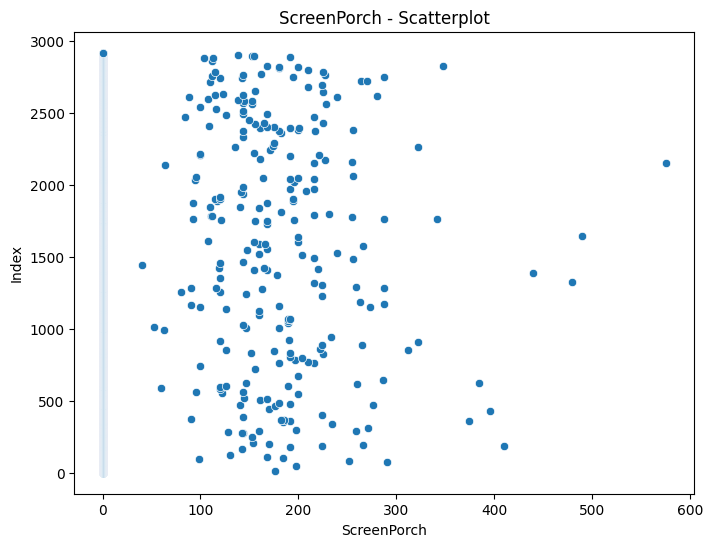

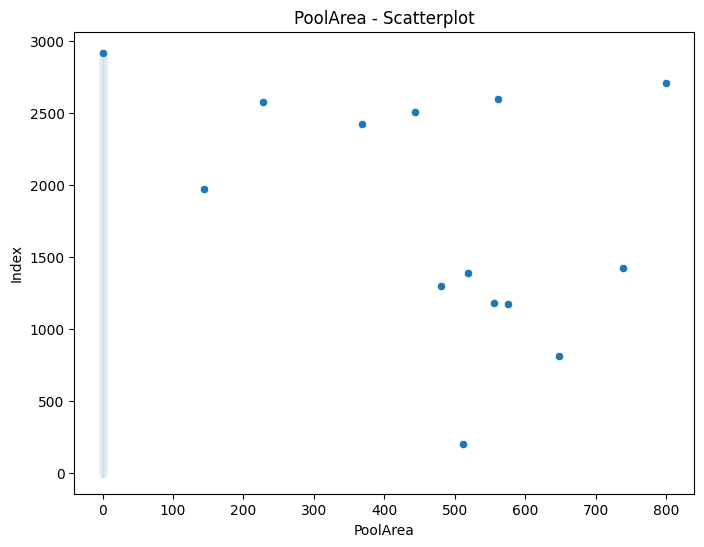

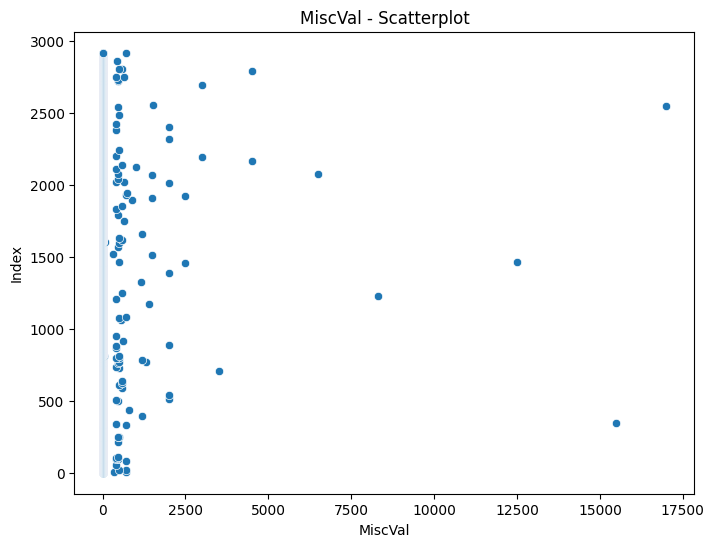

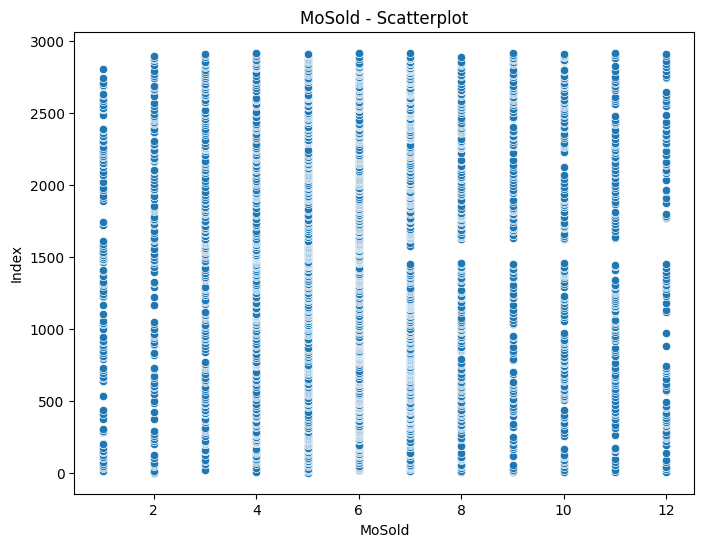

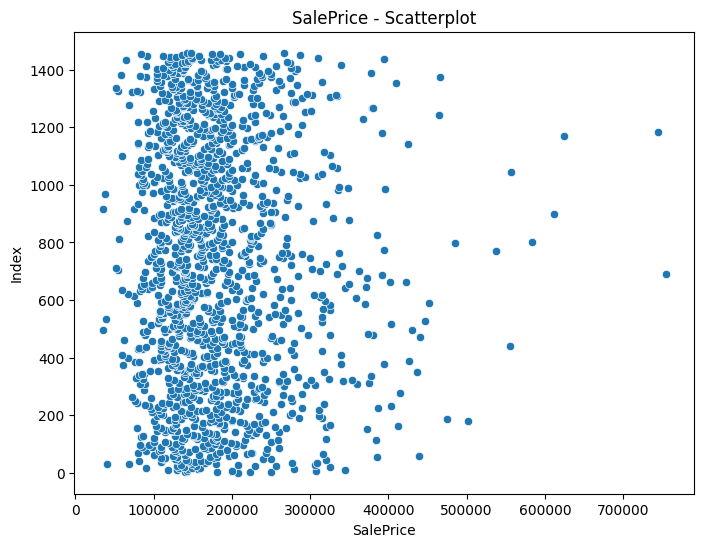

In [23]:
for col in num_cols:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[col], y=df.index)
    plt.title(f"{col} - Scatterplot")
    plt.xlabel(col)
    plt.ylabel("Index")
    plt.show()

In [24]:
df[num_cols].corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000
OverallQual      0.791
GrLivArea        0.709
GarageArea       0.623
TotalBsmtSF      0.614
                 ...  
BsmtFinSF2      -0.011
MiscVal         -0.021
LowQualFinSF    -0.026
MSSubClass      -0.084
EnclosedPorch   -0.129
Name: SalePrice, Length: 27, dtype: float64

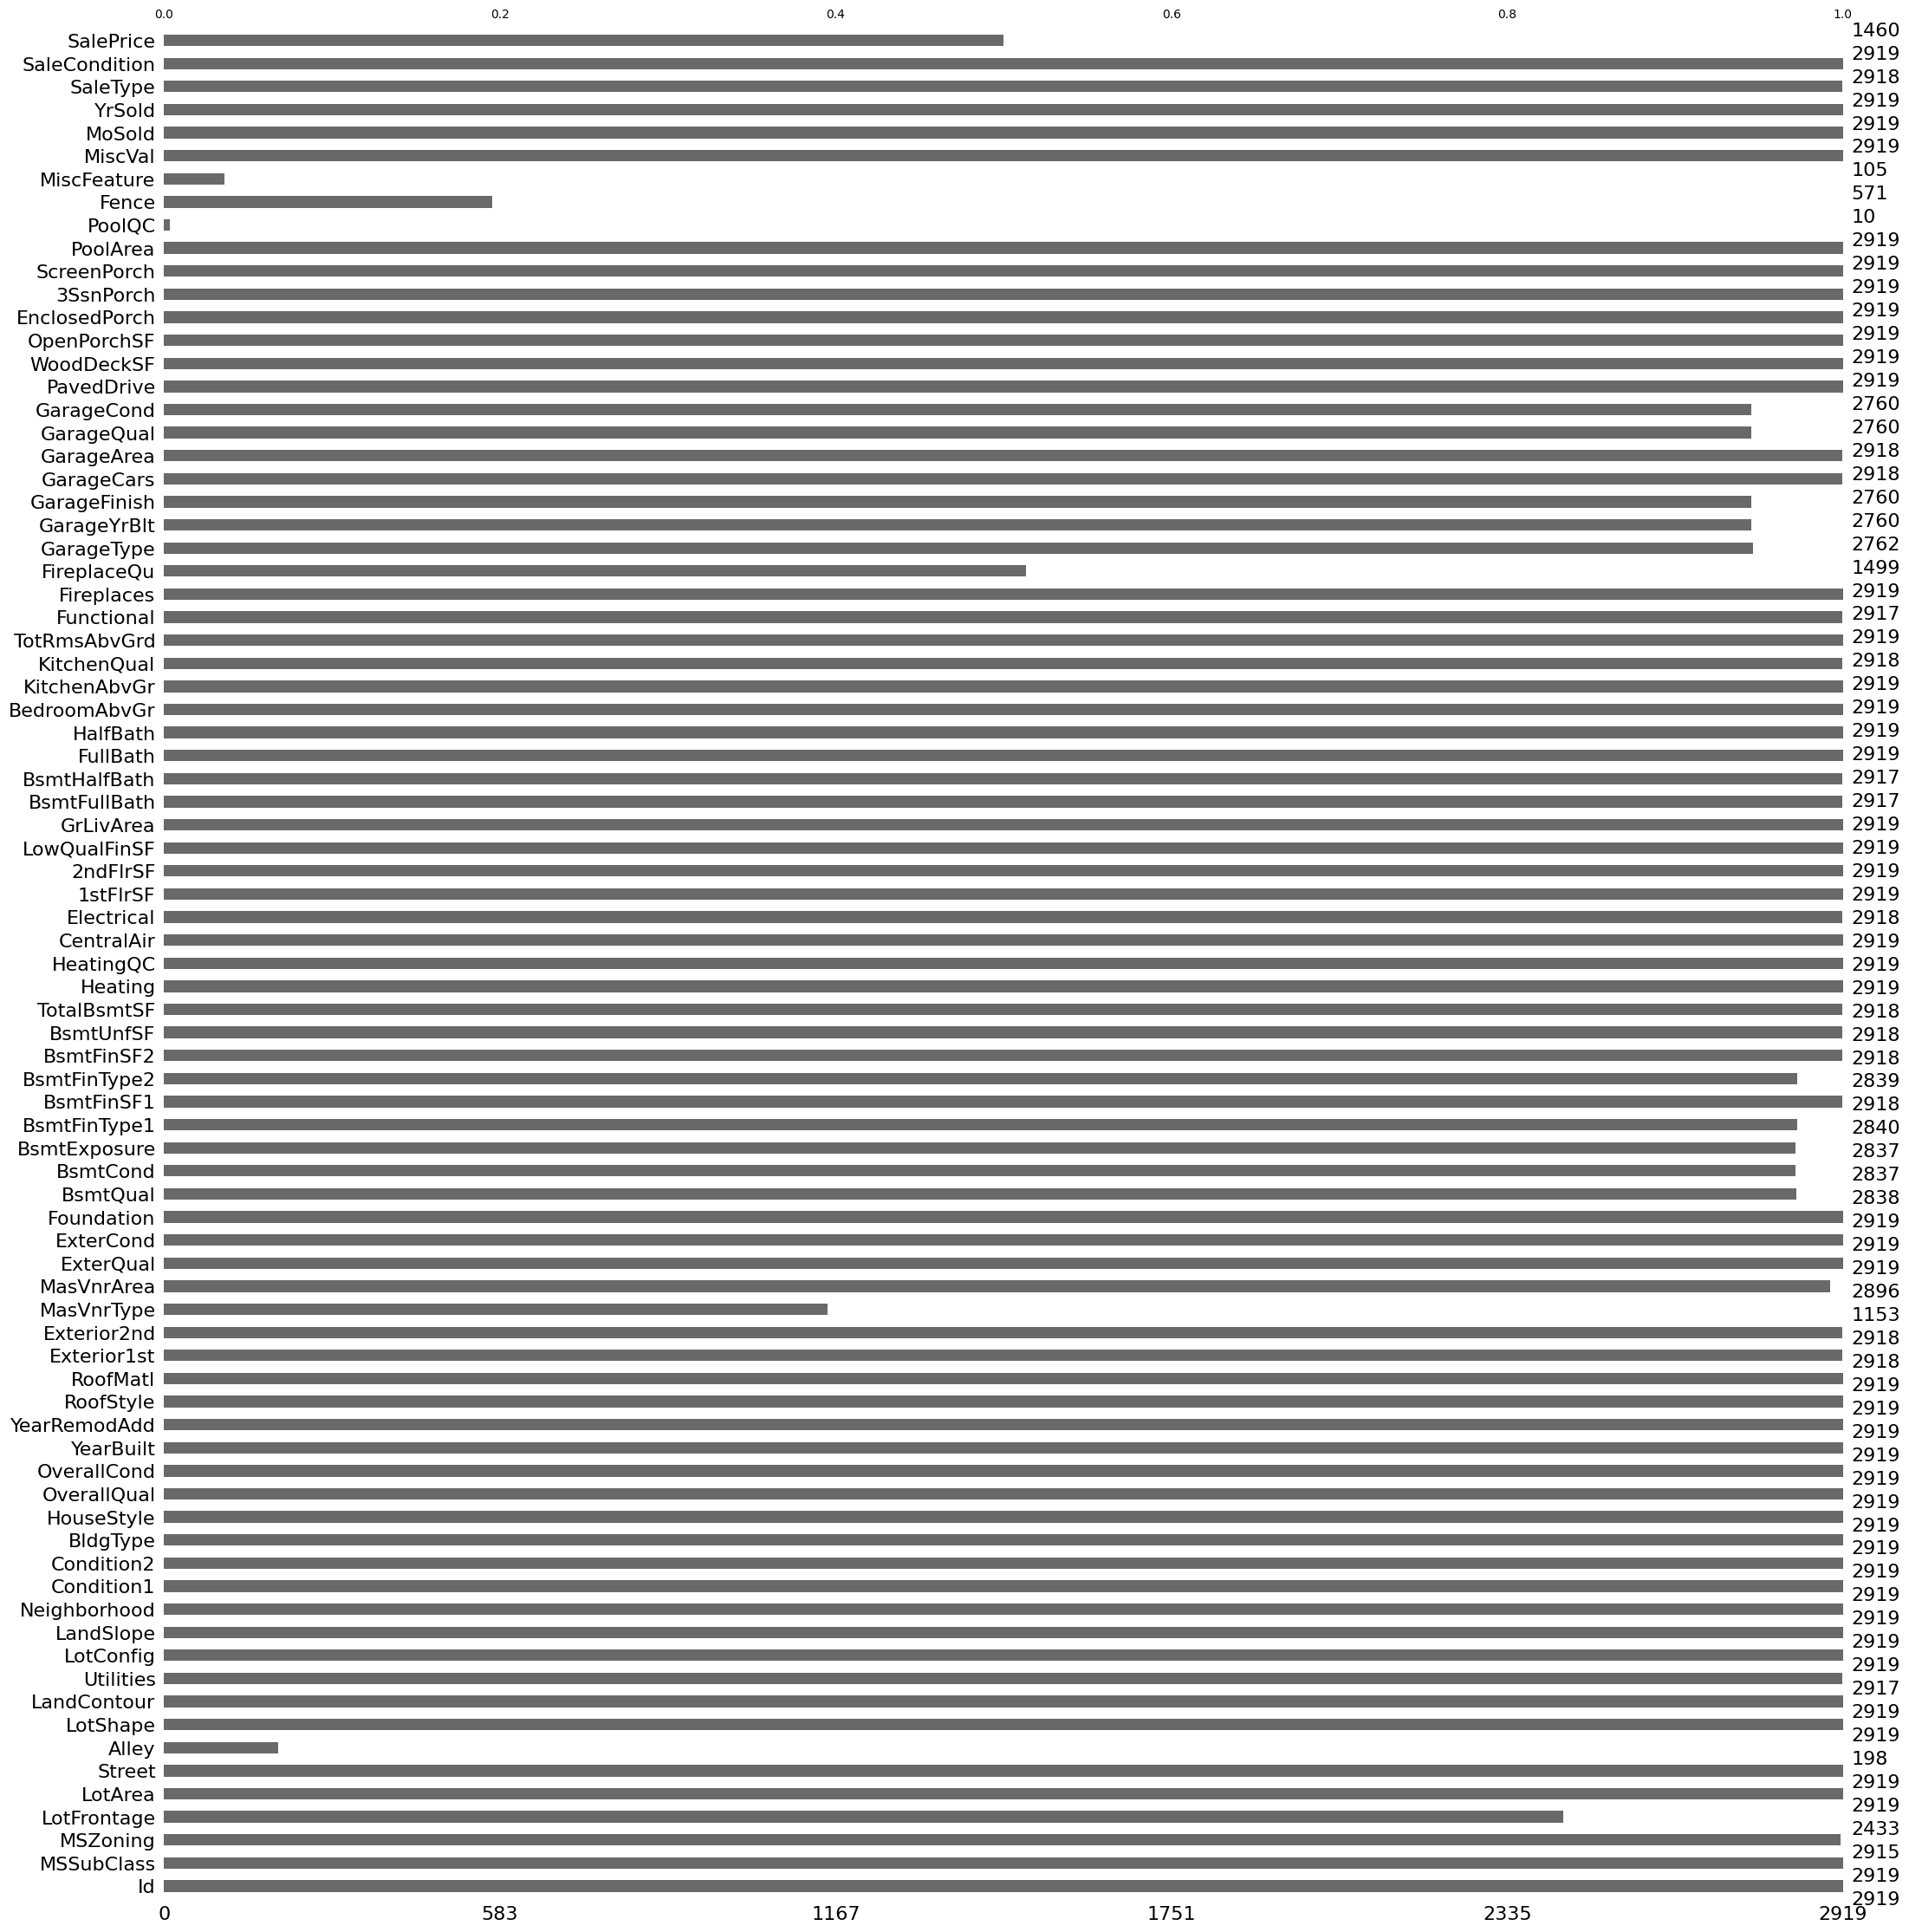

In [25]:
msno.bar(df)
plt.show()

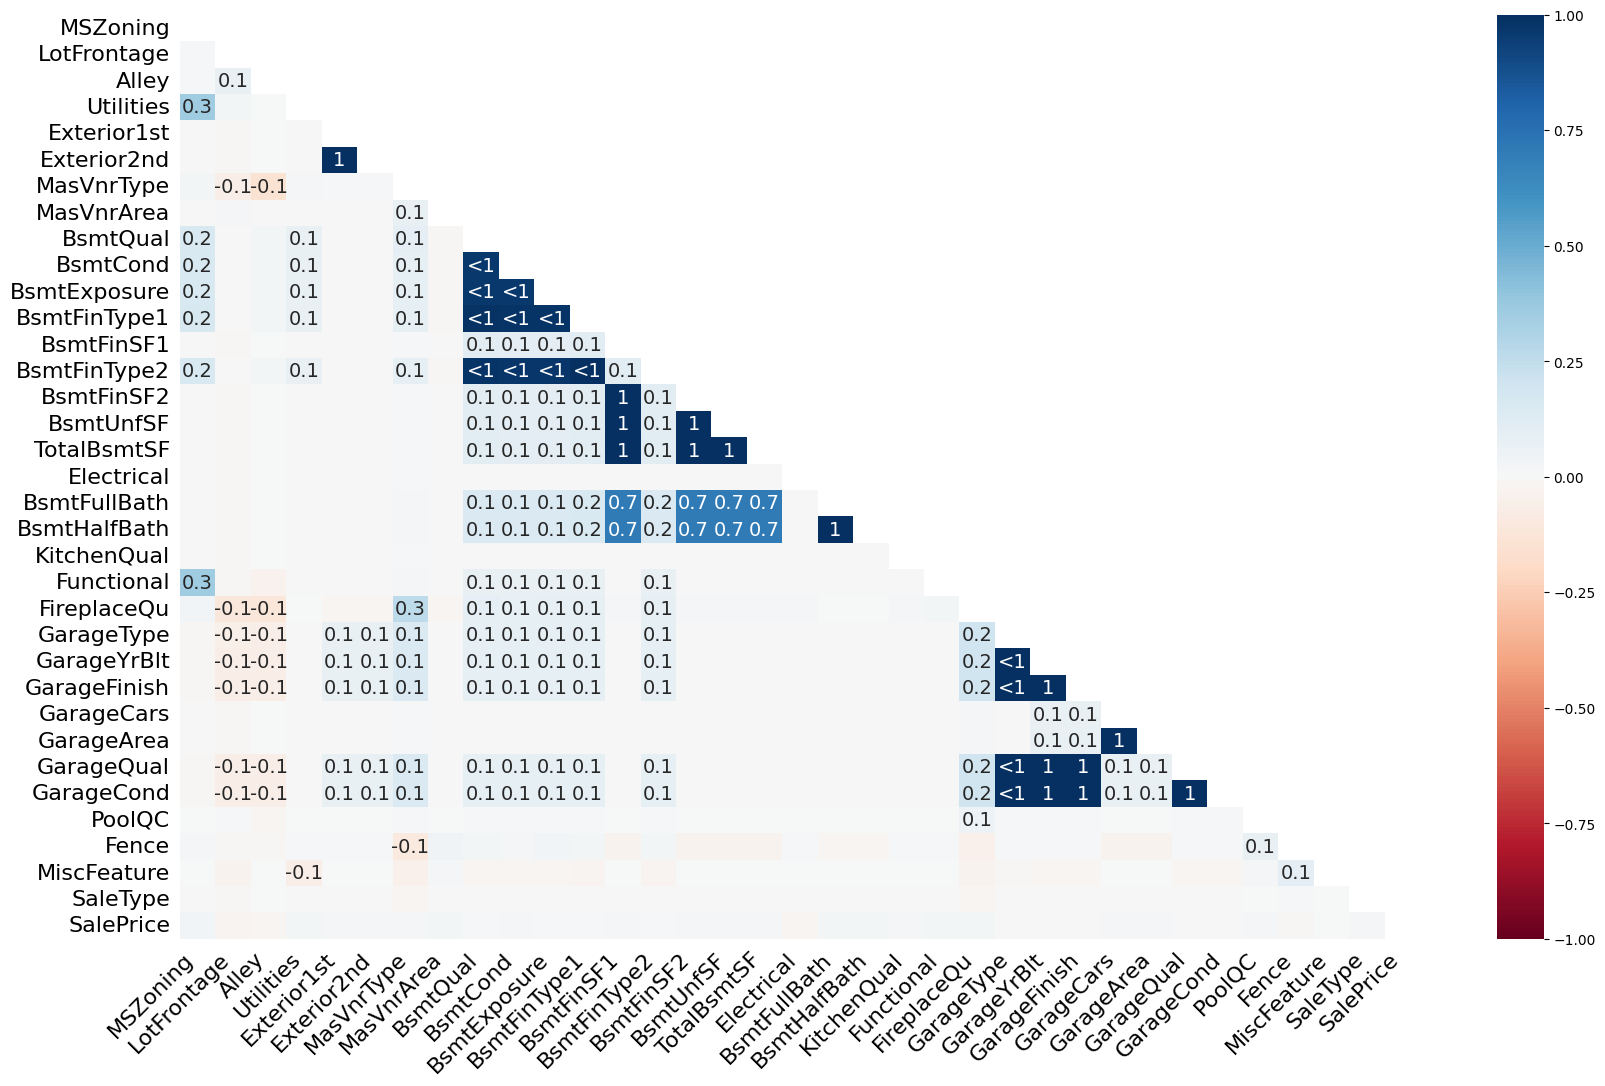

In [26]:
msno.heatmap(df)
plt.show()

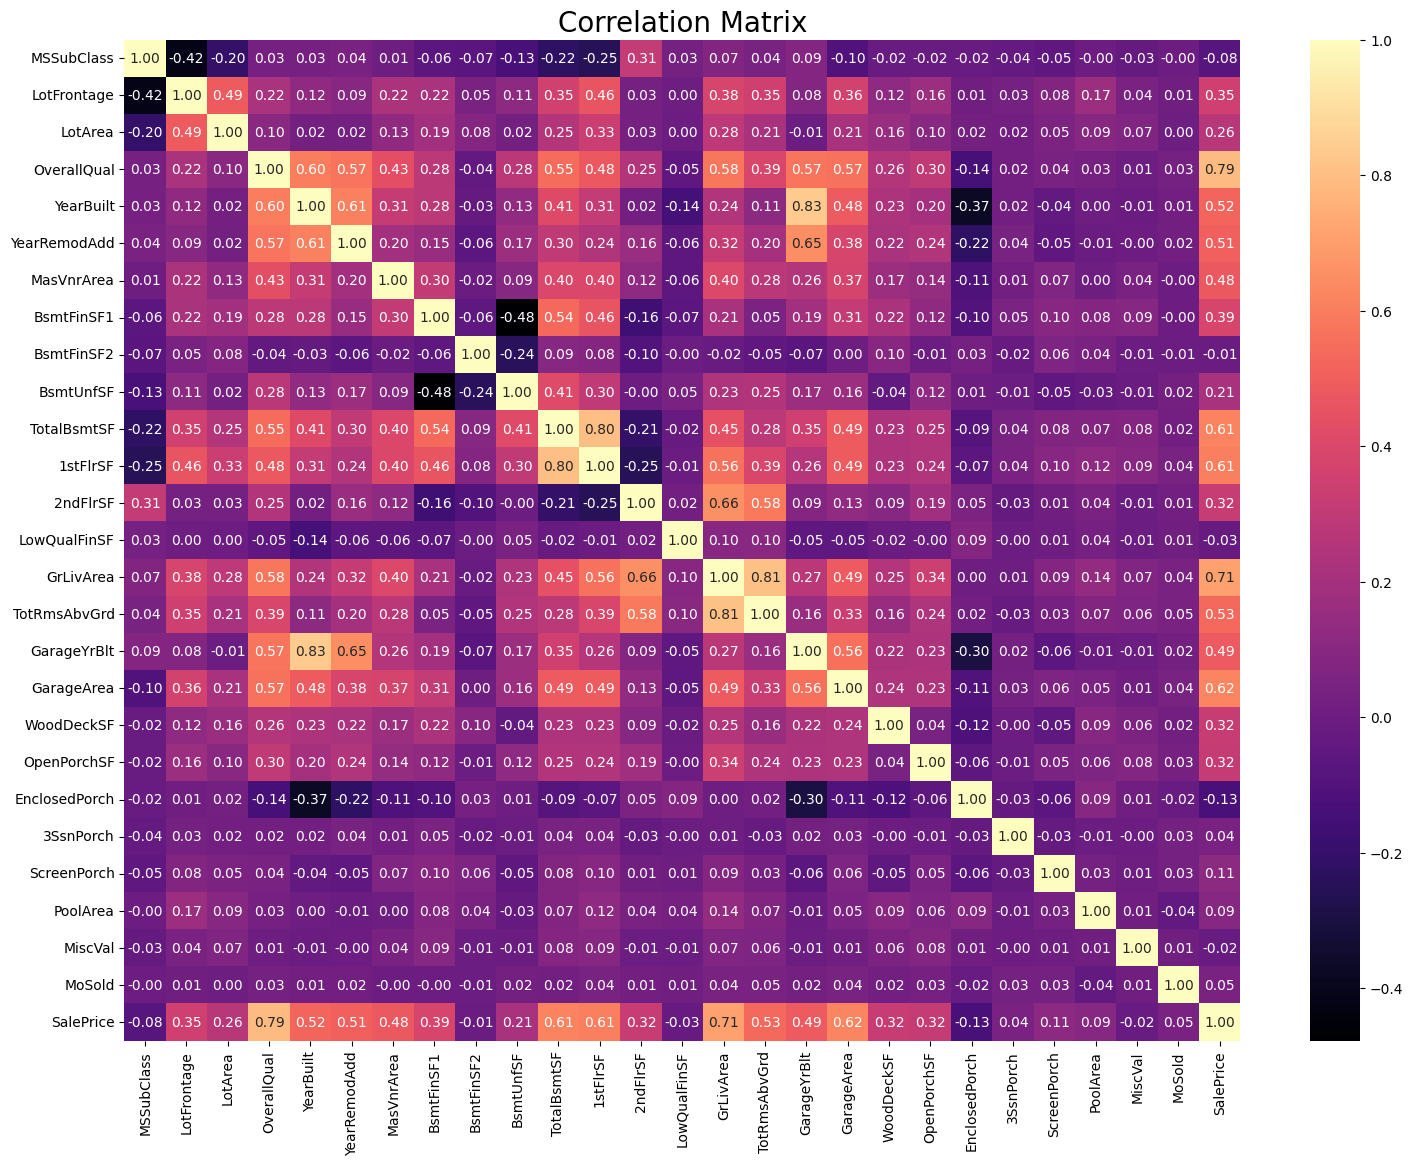

SalePrice        1.000
OverallQual      0.791
GrLivArea        0.709
GarageArea       0.623
TotalBsmtSF      0.614
                 ...  
BsmtFinSF2      -0.011
MiscVal         -0.021
LowQualFinSF    -0.026
MSSubClass      -0.084
EnclosedPorch   -0.129
Length: 27, dtype: float64

In [27]:
# filtering the data frame with numeric columns
df_num = df[num_cols]

# Correlation Analysis
corr = df_num.corr()


# plotting the Correlation Matrix
f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(corr, annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

# Listing highly correlated num_cols with target 'SalePrice'
saleprice_corr = df_num.corrwith(df["SalePrice"]).sort_values(ascending=False)
saleprice_corr

In [28]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 2919
Variables: 81
cat_cols: 52
num_cols: 27
cat_but_car: 2
num_but_cat: 10


In [29]:
#Analysis of Correlation

# corr = df[num_cols].corr()
# corr

# # Korelasyonların gösterilmesi
# sns.set(rc={'figure.figsize': (12, 12)})
# sns.heatmap(corr, cmap="RdBu")
# plt.show()

In [30]:
#  identifying and summarizing missing values 
def missing_values_table(dataframe, na_name=False):
    # Identify columns with missing values.
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    
    # Count the number of missing values for each identified column.
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    
    # Calculate the percentage of missing values for each column.
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    
    # Combine the count and percentage into a DataFrame.
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    
    # Print the summary table of missing values.
    print(missing_df, end="\n")
    
    # If na_name is True, return the list of columns with missing values.
    if na_name:
        return na_columns 

# Get the list of columns with missing values and print their counts and percentages.
na_columns = missing_values_table(df, na_name=True)

             n_miss  ratio
PoolQC         2909 99.660
MiscFeature    2814 96.400
Alley          2721 93.220
Fence          2348 80.440
MasVnrType     1766 60.500
...             ...    ...
BsmtFinSF1        1  0.030
Exterior2nd       1  0.030
Exterior1st       1  0.030
SaleType          1  0.030
Electrical        1  0.030

[35 rows x 2 columns]


In [31]:
#checking the missing values with target variable
na_cols = missing_values_table(df, True)
def missing_vs_target(dataframe, target, na_columns):
    temp_df = dataframe.copy()

    for col in na_columns:
        temp_df[col + '_NA_FLAG'] = np.where(temp_df[col].isnull(), 1, 0)
        #temp_df[col + '_NA_FLAG'] = temp_df[col].isnull().astype(int)

    na_flags = temp_df.loc[:, temp_df.columns.str.contains("_NA_")].columns

    for col in na_flags:
        print(pd.DataFrame({"TARGET_MEAN": temp_df.groupby(col)[target].mean(),
                            "Count": temp_df.groupby(col)[target].count()}), end="\n\n\n")
        
missing_vs_target(df, "SalePrice", na_cols)

             n_miss  ratio
PoolQC         2909 99.660
MiscFeature    2814 96.400
Alley          2721 93.220
Fence          2348 80.440
MasVnrType     1766 60.500
...             ...    ...
BsmtFinSF1        1  0.030
Exterior2nd       1  0.030
Exterior1st       1  0.030
SaleType          1  0.030
Electrical        1  0.030

[35 rows x 2 columns]
                  TARGET_MEAN  Count
MSZoning_NA_FLAG                    
0                  180921.196   1460
1                         NaN      0


                     TARGET_MEAN  Count
LotFrontage_NA_FLAG                    
0                     180770.480   1201
1                     181620.073    259


               TARGET_MEAN  Count
Alley_NA_FLAG                    
0               142845.912     91
1               183452.131   1369


                   TARGET_MEAN  Count
Utilities_NA_FLAG                    
0                   180921.196   1460
1                          NaN      0


                     TARGET_MEAN  Count
Exterior1

In [32]:
# checking the outliers
for col in num_cols:
    if col != "SalePrice":
        print(col, check_outlier(df, col))

MSSubClass False
LotFrontage True
LotArea True
OverallQual False
YearBuilt False
YearRemodAdd False
MasVnrArea False
BsmtFinSF1 True
BsmtFinSF2 False
BsmtUnfSF False
TotalBsmtSF True
1stFlrSF True
2ndFlrSF False
LowQualFinSF True
GrLivArea False
TotRmsAbvGrd False
GarageYrBlt True
GarageArea False
WoodDeckSF True
OpenPorchSF True
EnclosedPorch True
3SsnPorch True
ScreenPorch False
PoolArea True
MiscVal True
MoSold False


In [33]:
# applying outlier capping
for col in num_cols:
    if col != "SalePrice":
        print(col, check_outlier(df, col))
        if check_outlier(df, col):
            replace_with_thresholds(df, col)

MSSubClass False
LotFrontage True
LotArea True
OverallQual False
YearBuilt False
YearRemodAdd False
MasVnrArea False
BsmtFinSF1 True
BsmtFinSF2 False
BsmtUnfSF False
TotalBsmtSF True
1stFlrSF True
2ndFlrSF False
LowQualFinSF True
GrLivArea False
TotRmsAbvGrd False
GarageYrBlt True
GarageArea False
WoodDeckSF True
OpenPorchSF True
EnclosedPorch True
3SsnPorch True
ScreenPorch False
PoolArea True
MiscVal True
MoSold False


In [34]:
# rechecking the outliers
for col in num_cols:
    if col != "SalePrice":
        print(col, check_outlier(df, col))

MSSubClass False
LotFrontage False
LotArea False
OverallQual False
YearBuilt False
YearRemodAdd False
MasVnrArea False
BsmtFinSF1 False
BsmtFinSF2 False
BsmtUnfSF False
TotalBsmtSF False
1stFlrSF False
2ndFlrSF False
LowQualFinSF False
GrLivArea False
TotRmsAbvGrd False
GarageYrBlt False
GarageArea False
WoodDeckSF False
OpenPorchSF False
EnclosedPorch False
3SsnPorch False
ScreenPorch False
PoolArea False
MiscVal False
MoSold False


In [35]:
no_cols = ["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2",
           "GarageType","GarageFinish","GarageQual","GarageCond","PoolQC","Fence","MiscFeature", "Alley", "FireplaceQu"]

for col in no_cols:
    df[col].fillna("No",inplace=True)

missing_values_table(df)

# these variables indicate whether or not the house has the feature in question (e.g. PoolQC: Pool quality). 
#if it has no such a feature, they should be filled in with 'NO'

             n_miss  ratio
MasVnrType     1766 60.500
SalePrice      1459 49.980
LotFrontage     486 16.650
GarageYrBlt     159  5.450
MasVnrArea       23  0.790
...             ...    ...
KitchenQual       1  0.030
GarageCars        1  0.030
GarageArea        1  0.030
SaleType          1  0.030
TotalBsmtSF       1  0.030

[21 rows x 2 columns]


In [36]:
df.head()

Id  MSSubClass MSZoning  LotFrontage   LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
0  1          60       RL       65.000  8450.000   Pave    No      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace     196.000        Gd        TA      PConc       Gd       TA           No          GLQ     706.000          Unf       0.000    150.000      856.000    GasA        Ex          Y      SBrkr   856.000       854         0.000       1710         1.000         0.000         2         1             3             1          Gd             8        Typ           0          No     Attchd     2003.000          RFn       2.000     548.000         TA         TA          Y       0.000       61.000              0          0            0         0     No    No          No    0.000       2    2008       WD        Normal 208500.000
1  2          20       RL       80.000  9600.000   Pave    No      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd        NaN       0.000        TA        TA     CBlock       Gd       TA           Gd          ALQ     978.000          Unf       0.000    284.000     1262.000    GasA        Ex          Y      SBrkr  1262.000         0         0.000       1262         0.000         1.000         2         0             3             1          TA             6        Typ           1          TA     Attchd     1976.000          RFn       2.000     460.000         TA         TA          Y     298.000        0.000              0          0            0         0     No    No          No    0.000       5    2007       WD        Normal 181500.000
2  3          60       RL       68.000 11250.000   Pave    No      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace     162.000        Gd        TA      PConc       Gd       TA           Mn          GLQ     486.000          Unf       0.000    434.000      920.000    GasA        Ex          Y      SBrkr   920.000       866         0.000       1786         1.000         0.000         2         1             3             1          Gd             6        Typ           1          TA     Attchd     2001.000          RFn       2.000     608.000         TA         TA          Y       0.000       42.000              0          0            0         0     No    No          No    0.000       9    2008       WD        Normal 223500.000
3  4          70       RL       60.000  9550.000   Pave    No      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN       0.000        TA        TA     BrkTil       TA       Gd           No          ALQ     216.000          Unf       0.000    540.000      756.000  

In [37]:
# filling out the missing values
def filling_out_missing_values(dataframe, target="SalePrice"):
    target_values = dataframe[target]
    dataframe = dataframe.drop(columns=[target])
    
    missing_variables = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    for col in dataframe.select_dtypes(include=['object']):
        dataframe[col].fillna(dataframe[col].mode()[0], inplace=True)

    # num_method mean ise tipi object olmayan değişkenlerin boş değerleri ortalama ile dolduruluyoruz
    dataframe = dataframe.apply(lambda x: x.fillna(x.median()) if x.dtype != "O" else x, axis=0)
    
    dataframe[target] = target_values

    return dataframe

df = filling_out_missing_values(df)

In [38]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice        1459
Length: 81, dtype: int64

In [39]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 2919
Variables: 81
cat_cols: 53
num_cols: 26
cat_but_car: 2
num_but_cat: 11


In [40]:
cat_but_car

['Id', 'Neighborhood']

In [41]:
def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ":", len(dataframe[col].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),
                            "RATIO": dataframe[col].value_counts() / len(dataframe),
                            "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")


rare_analyser(df, "SalePrice", cat_cols)

MSZoning : 5
          COUNT  RATIO  TARGET_MEAN
MSZoning                           
C (all)      25  0.009    74528.000
FV          139  0.048   214014.062
RH           26  0.009   131558.375
RL         2269  0.777   191004.995
RM          460  0.158   126316.830


Street : 2
        COUNT  RATIO  TARGET_MEAN
Street                           
Grvl       12  0.004   130190.500
Pave     2907  0.996   181130.539


Alley : 3
       COUNT  RATIO  TARGET_MEAN
Alley                           
Grvl     120  0.041   122219.080
No      2721  0.932   183452.131
Pave      78  0.027   168000.585


LotShape : 4
          COUNT  RATIO  TARGET_MEAN
LotShape                           
IR1         968  0.332   206101.665
IR2          76  0.026   239833.366
IR3          16  0.005   216036.500
Reg        1859  0.637   164754.818


LandContour : 4
             COUNT  RATIO  TARGET_MEAN
LandContour                           
Bnk            117  0.040   143104.079
HLS            120  0.041   231533.940
Low 

In [42]:
# identifying and dropping the variables that have a dominant class (equal or higher than %95) 
useless_cols = ["Street", "Alley", "LandContour", "Utilities", "LandSlope","Heating", "PoolQC", "MiscFeature","Neighborhood"]
df.drop(useless_cols, axis=1, inplace=True)

In [43]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 2919
Variables: 72
cat_cols: 45
num_cols: 26
cat_but_car: 1
num_but_cat: 11


In [44]:
cat_but_car

['Id']

In [45]:
def rare_encoder(dataframe, rare_perc):
    temp_df = dataframe.copy()

    rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes == 'O'
                    and (temp_df[col].value_counts() / len(temp_df) < rare_perc).any(axis=None)]

    for var in rare_columns:
        tmp = temp_df[var].value_counts() / len(temp_df)
        rare_labels = tmp[tmp < rare_perc].index
        temp_df[var] = np.where(temp_df[var].isin(rare_labels), 'Rare', temp_df[var])

    return temp_df

In [46]:
rare_encoder(df, 0.1)

Id  MSSubClass MSZoning  LotFrontage   LotArea LotShape LotConfig Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  Fence  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
0     Rare          60       RL       65.000  8450.000      Reg    Inside       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace     196.000        Gd        TA      PConc       Gd       TA           No          GLQ     706.000          Unf       0.000    150.000      856.000        Ex          Y      SBrkr   856.000       854         0.000       1710         1.000         0.000         2         1             3             1          Gd             8        Typ           0          No     Attchd     2003.000          RFn       2.000     548.000         TA         TA          Y       0.000       61.000              0          0            0         0     No    0.000       2    2008       WD        Normal 208500.000
1     Rare          20       RL       80.000  9600.000      Reg      Rare       Rare       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd    BrkFace       0.000        TA        TA     CBlock       Gd       TA         Rare          ALQ     978.000          Unf       0.000    284.000     1262.000        Ex          Y      SBrkr  1262.000         0         0.000       1262         0.000         1.000         2         0             3             1          TA             6        Typ           1          TA     Attchd     1976.000          RFn       2.000     460.000         TA         TA          Y     298.000        0.000              0          0            0         0     No    0.000       5    2007       WD        Normal 181500.000
2     Rare          60       RL       68.000 11250.000      IR1    Inside       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace     162.000        Gd        TA      PConc       Gd       TA         Rare          GLQ     486.000          Unf       0.000    434.000      920.000        Ex          Y      SBrkr   920.000       866         0.000       1786         1.000         0.000         2         1             3             1          Gd             6        Typ           1          TA     Attchd     2001.000          RFn       2.000     608.000         TA         TA          Y       0.000       42.000              0          0            0         0     No    0.000       9    2008       WD        Normal 223500.000
3     Rare          70       RL       60.000  9550.000      IR1    Corner       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng        Rare    BrkFace       0.000        TA        TA     BrkTil       TA     Rare           No          ALQ     216.000          Unf       0.000    540.000      756.000        Gd          Y      SBrkr   961.000       756         0.000       1717         1.000         0.000         1         0             3             1          Gd             7        Typ           1          Gd     Detchd     1998.000          Unf       3.000     642.000         TA         TA          Y       0.000       35.000            272          0            0

In [47]:
#deriving new features
#house age
df["HouseAge"] = df["YrSold"] - df["YearBuilt"]

#remodelling age
df["RemodelAge"] = df["YrSold"] - df["YearRemodAdd"]

#total area 
df["TotalArea"] = df["TotalBsmtSF"] + df["1stFlrSF"] + df["2ndFlrSF"] + df["GarageArea"]

#total porch area
df["TotalPorchSF"] = df["OpenPorchSF"] + df["EnclosedPorch"] + df["3SsnPorch"] + df["ScreenPorch"]

#overall score
df["OverallScore"] = df["OverallQual"] * df["OverallCond"]

#HasBasement
df["HasBasement"] = df["TotalBsmtSF"].apply(lambda x: 1 if x > 0 else 0)


#HasGarage
df["HasGarage"] = df["GarageArea"].apply(lambda x: 1 if x > 0 else 0)


#Total Bath
df["TotalBath"] = df["FullBath"] + (0.5 * df["HalfBath"]) + df["BsmtFullBath"] + (0.5 * df["BsmtHalfBath"])

#price per lot area
df["PricePerLotArea"] = df["SalePrice"] / df["LotArea"]


#total rooms
df["TotalRooms"] = df["TotRmsAbvGrd"] + df["KitchenAbvGr"] + df["BedroomAbvGr"]

In [48]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 2919
Variables: 82
cat_cols: 47
num_cols: 34
cat_but_car: 1
num_but_cat: 13


In [49]:
cat_cols, cat_but_car, num_cols = grab_col_names(df)

#applying label encoding 
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

binary_cols = [col for col in df.columns if df[col].dtypes not in ['int64', 'float64'] and df[col].nunique() <= 2]

for col in binary_cols:
    label_encoder(df, col)

Observations: 2919
Variables: 82
cat_cols: 47
num_cols: 34
cat_but_car: 1
num_but_cat: 13


In [50]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 2919
Variables: 82
cat_cols: 47
num_cols: 34
cat_but_car: 1
num_but_cat: 14


In [51]:
# applying one hot encoding
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first, dtype=int)
    return dataframe

df = one_hot_encoder(df, cat_cols, drop_first=True)

In [52]:
cat_cols, cat_but_car, num_cols = grab_col_names(df)

Observations: 2919
Variables: 255
cat_cols: 220
num_cols: 34
cat_but_car: 1
num_but_cat: 220


In [53]:
df.head()

Id  MSSubClass  LotFrontage   LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  TotRmsAbvGrd  GarageYrBlt  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  MiscVal  MoSold  SalePrice  HouseAge  RemodelAge  TotalArea  TotalPorchSF  OverallScore  TotalBath  PricePerLotArea  TotalRooms  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  Condition1_Feedr  Condition1_Norm  Condition1_PosA  Condition1_PosN  Condition1_RRAe  Condition1_RRAn  Condition1_RRNe  Condition1_RRNn  Condition2_Feedr  Condition2_Norm  Condition2_PosA  Condition2_PosN  Condition2_RRAe  Condition2_RRAn  Condition2_RRNn  BldgType_2fmCon  BldgType_Duplex  BldgType_Twnhs  BldgType_TwnhsE  HouseStyle_1.5Unf  HouseStyle_1Story  HouseStyle_2.5Fin  HouseStyle_2.5Unf  HouseStyle_2Story  \
0  1          60       65.000  8450.000            7       2003          2003     196.000     706.000       0.000    150.000      856.000   856.000       854         0.000       1710             8     2003.000     548.000       0.000       61.000              0          0            0    0.000       2 208500.000         5           5   3114.000        61.000            35      3.500           24.675          12            0            0            1            0             0             0             1                  0              0              0                 1                 0                1                0                0                0                0                0                0                 0                1                0                0                0                0                0                0                0               0                0                  0                  0                  0                  0                  1   
1  2          20       80.000  9600.000            6       1976          1976       0.000     978.000       0.000    284.000     1262.000  1262.000         0         0.000       1262             6     1976.000     460.000     298.000        0.000              0          0            0    0.000       5 181500.000        31          31   2984.000         0.000            48      2.500           18.906          10            0            0            1            0             0             0             1                  0              1              0                 0                 1                0                0                0                0                0                0                0                 0                1                0                0                0                0                0                0                0               0                0                  0                  1                  0                  0                  0   
2  3          60       68.000 11250.000            7       2001          2002     162.000     486.000       0.000    434.000      920.000   920.000       866         0.000       1786             6     2001.000     608.000       0.000       42.000              0          0            0    0.000       9 223500.000         7           6   3314.000        42.000            35      3.500           19.867          10            0            0            1            0             0             0             0                  0              0              0                 1                 0                1                0                0                0                0                0                0                 0                1                0                0                0                0                0                0                0               0                0                  0                  0                  0                  0                  1   
3  4      

I am going to use the tree models, hence I don't need to standardize the data.

In [54]:
df_train = df[df['SalePrice'].notnull()]
df_test = df[df['SalePrice'].isnull()]

In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# apply log transformation to the target variable "SalePrice", droppping 'Id' 
y = np.log1p(df_train["SalePrice"])
X = df_train.drop(["Id", "SalePrice"], axis=1)

# split the dataset train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=24)

# storing the original test results
y_test_original = np.expm1(y_test)

# defining the models 
models = [
    ('KNN', KNeighborsRegressor()),
    ('Decision Tree', DecisionTreeRegressor(random_state=24)),
    ('Random Forest', RandomForestRegressor(random_state=24)),
    ('XGBoost', XGBRegressor(random_state=24)),
    ('LightGBM', LGBMRegressor(verbose=-1, random_state=24)),
    ('CatBoost', CatBoostRegressor(verbose=False, random_state=24))
]

# create a list to store the results 
results = []

# Train the models through the loop, apply cross-validation and calculate RMSE 
for name, model in models:
    model.fit(X_train, y_train)
    # predict with Log-transformed target variable
    y_pred_log = model.predict(X_test)
    # Convert predictions back to original scale
    y_pred = np.expm1(y_pred_log)
    
    # Calculate the RMSE in the original scale 
    rmse = np.sqrt(mean_squared_error(y_test_original, y_pred))
    results.append((name, rmse))

# convert results to DataFrame and print
results_df = pd.DataFrame(results, columns=['Model', 'RMSE']).sort_values(by='RMSE', ascending=True)
results_df

Model      RMSE
5       CatBoost 23483.473
4       LightGBM 25686.897
2  Random Forest 31338.196
3        XGBoost 36950.748
1  Decision Tree 37691.156
0            KNN 52156.329

In [56]:
from sklearn.model_selection import GridSearchCV
import time
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# df_train is the dataset and "SalePrice" is the target variable, dropping 'Id' as it is a cardinal variable
y = np.log1p(df_train["SalePrice"])
X = df_train.drop(["Id", "SalePrice"], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=24)

# Names of the best models
best_models = {
    'XGBoost': XGBRegressor(random_state=24),
    'LightGBM': LGBMRegressor(verbose=-1, random_state=24),
    'CatBoost': CatBoostRegressor(verbose=False, random_state=24),
    'Random Forest': RandomForestRegressor(random_state=24)
}

# Defining the hyperparameters' grid 
param_grids = {
    'XGBoost': {
        'n_estimators': [50, 100],
        'learning_rate': [0.001, 0.01, 0.05],
        'max_depth': [3, 5, 7],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0]
    },
    'LightGBM': {
        'n_estimators': [100, 150, 200],
        'learning_rate': [0.001, 0.01, 0.05, 0.1],
        'num_leaves': [31, 50, 100, 150, 200],
        'min_child_samples': [20, 50, 100],
        'subsample': [0.6, 0.8, 1.0]
    },
    'CatBoost': {
        'iterations': [100, 150, 200],
        'learning_rate': [0.001, 0.01, 0.05, 0.1],
        'depth': [4, 6, 8, 10]
    },
    'Random Forest': {
        'n_estimators': [100, 150, 200],
        'max_depth': [5, 8, None],
        'min_samples_split': [2, 5, 7],
        'min_samples_leaf': [1, 2, 5],
        'max_features': ['sqrt', 5, 7]
    }
}

# Run GridSearchCV for each model and find the best parameters
best_params = {}
training_times = {}
for name, model in best_models.items():
    print(f"Model: {name}")

    # Start value for time measurement 
    start_time = time.time()
    
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name], 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)

    # End the time measurement and calculate the duration
    end_time = time.time()
    elapsed_time = end_time - start_time
    training_times[name] = elapsed_time
    
    best_params[name] = grid_search.best_params_
    
    # Get predictions on the test set
    y_pred_log = grid_search.best_estimator_.predict(X_test)
    
    # Transform predictions back to the original scale using inverse transformation
    y_pred = np.expm1(y_pred_log)
    y_test_original = np.expm1(y_test)
    
    # Calculate RMSE in the original scale
    rmse = np.sqrt(mean_squared_error(y_test_original, y_pred))
    print(f"Best params for {name}: {grid_search.best_params_}")
    print(f"Best RMSE (on test data): {rmse:.4f}")
    print(f"Training time for {name}: {elapsed_time:.2f} seconds\n")

Model: XGBoost
Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best params for XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
Best RMSE (on test data): 34591.0968
Training time for XGBoost: 503.61 seconds

Model: LightGBM
Fitting 5 folds for each of 540 candidates, totalling 2700 fits
Best params for LightGBM: {'learning_rate': 0.1, 'min_child_samples': 20, 'n_estimators': 200, 'num_leaves': 31, 'subsample': 0.6}
Best RMSE (on test data): 23837.0706
Training time for LightGBM: 609.67 seconds

Model: CatBoost
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best params for CatBoost: {'depth': 6, 'iterations': 200, 'learning_rate': 0.1}
Best RMSE (on test data): 24567.9629
Training time for CatBoost: 618.69 seconds

Model: Random Forest
Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best params for Random Forest: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1,

In [57]:
from lightgbm import LGBMRegressor
import numpy as np
from sklearn.metrics import mean_squared_error

# Define the best parameters from your optimization step
best_params = {
    'learning_rate': 0.1,
    'min_child_samples': 50,
    'n_estimators': 200,
    'num_leaves': 31,
    'subsample': 0.6,
    'max_depth': 5,
    'random_state': 24
}

# Create the LightGBM model with the best parameters
final_model = LGBMRegressor(**best_params, verbose=-1)

# Train the model on the entire training dataset (using X and y, not just X_train and y_train)
final_model.fit(X, y)

# Make predictions on the test set (if you want to evaluate it again)
y_pred_log = final_model.predict(X_test)

# Transform predictions back to the original scale using inverse transformation
y_pred = np.expm1(y_pred_log)
y_test_original = np.expm1(y_test)

# Calculate the RMSE in the original scale
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred))
print(f"Final LightGBM RMSE (on test data): {rmse:.4f}")

Final LightGBM RMSE (on test data): 13482.8096


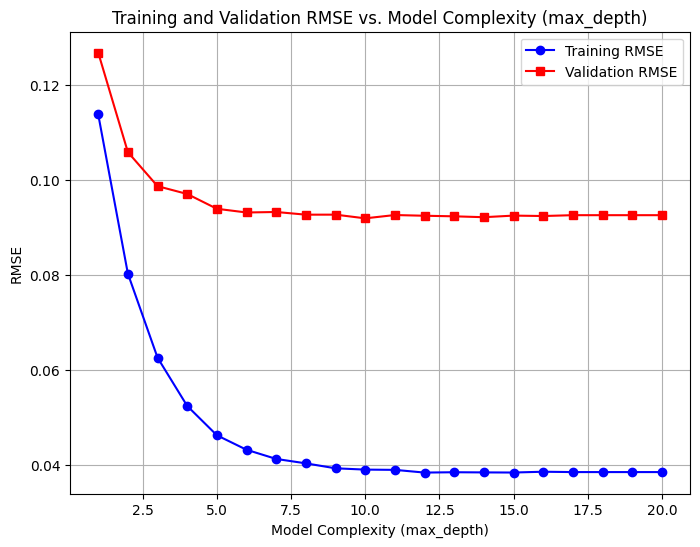

In [58]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error

# Define the parameter range for max_depth (this represents model complexity)
param_range = range(1, 21)

# Calculate training and test scores using validation_curve
train_scores, test_scores = validation_curve(
    LGBMRegressor(**best_params, verbose=-1),  # Use the best hyperparameters from optimization
    X, y,
    param_name='max_depth',
    param_range=param_range,
    scoring='neg_mean_squared_error',  # Use negative MSE since validation_curve minimizes
    cv=5,  # 5-fold cross-validation
    n_jobs=-1
)

# Calculate RMSE from the negative MSE (since it returns negative values)
train_rmse = np.sqrt(-train_scores.mean(axis=1))
test_rmse = np.sqrt(-test_scores.mean(axis=1))

# Plot the training and validation RMSE errors
plt.figure(figsize=(8, 6))
plt.plot(param_range, train_rmse, label='Training RMSE', color='blue', marker='o')
plt.plot(param_range, test_rmse, label='Validation RMSE', color='red', marker='s')
plt.title('Training and Validation RMSE vs. Model Complexity (max_depth)')
plt.xlabel('Model Complexity (max_depth)')
plt.ylabel('RMSE')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [59]:
#Compare to SalePrice Mean/Median
mean_price = np.mean(np.expm1(y))  # Get the mean of the original SalePrice values
median_price = np.median(np.expm1(y))
print(f"Mean SalePrice: {mean_price}, Median SalePrice: {median_price}")

Mean SalePrice: 180921.19589041095, Median SalePrice: 162999.99999999988


In [60]:
#Check R² Score
from sklearn.metrics import r2_score

# Calculate the R² score on the original scale
r2 = r2_score(y_test_original, y_pred)
print(f"R² Score: {r2:.4f}")

R² Score: 0.9757


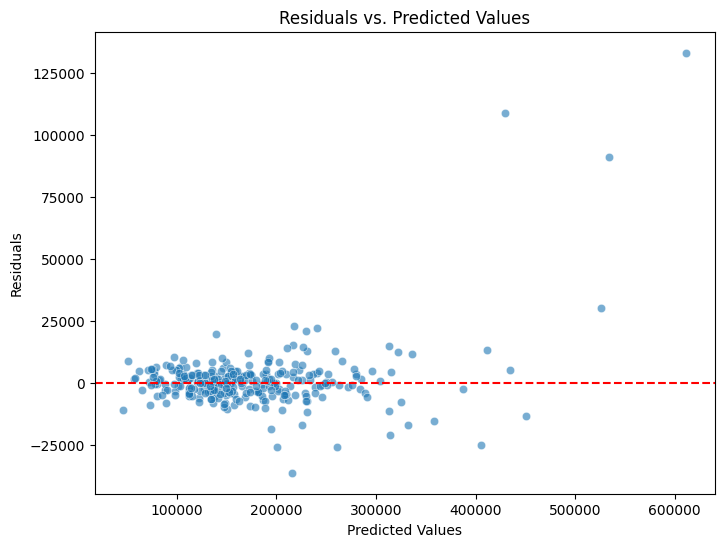

In [61]:
#plotting the residuals
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals = y_test_original - y_pred

# Plot residuals
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

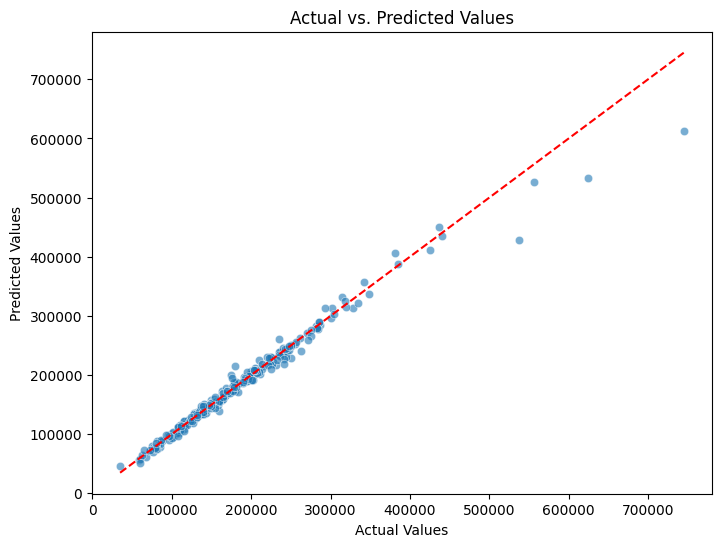

In [62]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_original, y=y_pred, alpha=0.6)
plt.plot([y_test_original.min(), y_test_original.max()], [y_test_original.min(), y_test_original.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

* The x-axis represents the predicted values.
  
* The y-axis represents the residuals.
  
* Ideally, the points should be randomly scattered around the horizontal line at y = 0, indicating that the model is unbiased.

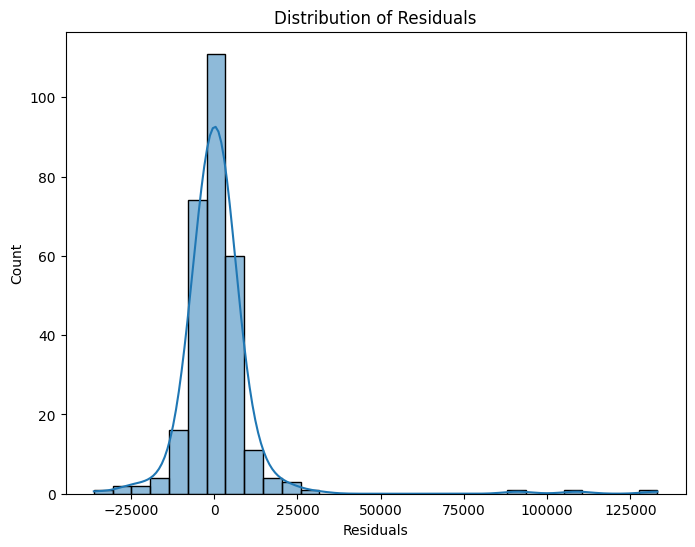

In [63]:
# Plot distribution of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

     Value            Feature
31     431    PricePerLotArea
2      339            LotArea
27     229          TotalArea
3       81        OverallQual
29      69       OverallScore
..     ...                ...
120      0  Foundation_CBlock
122      0    Foundation_Slab
123      0   Foundation_Stone
124      0    Foundation_Wood
252      0        HasGarage_1

[253 rows x 2 columns]


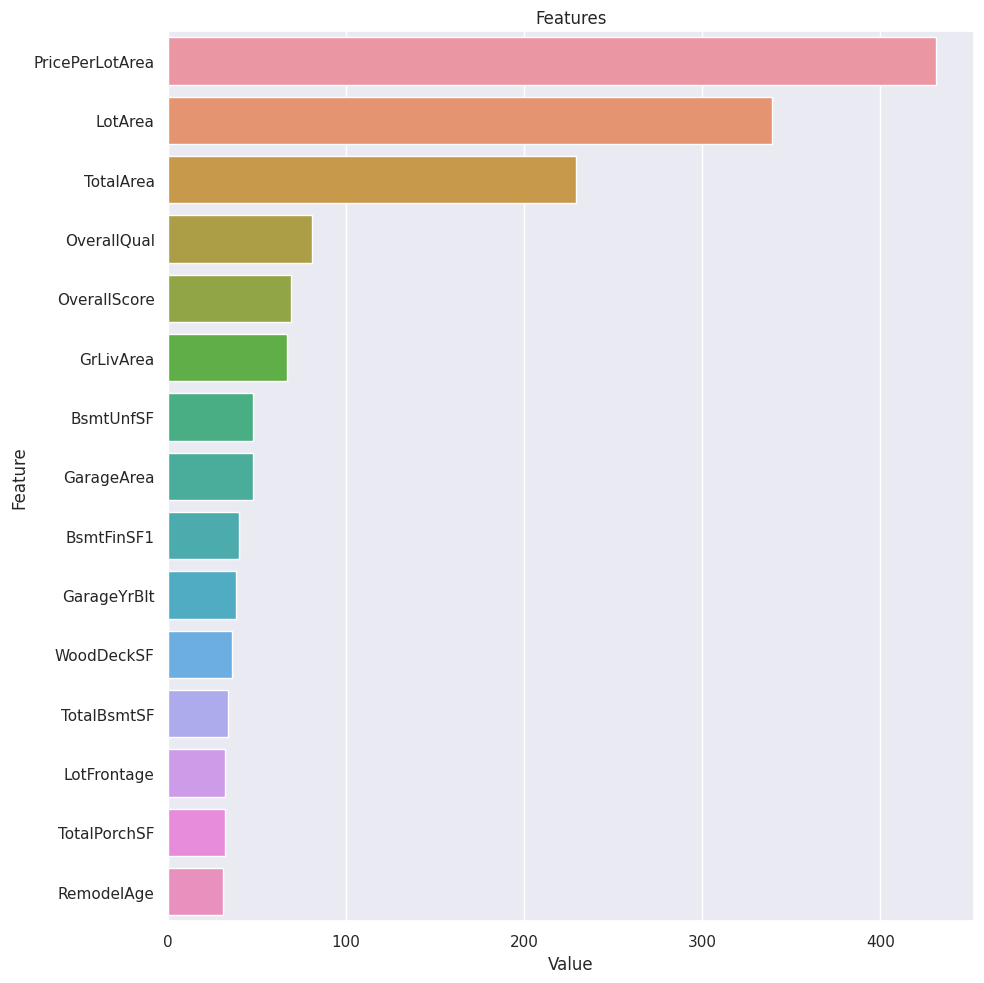

In [64]:
def plot_importance(model, features, num=len(X), save=False):
   feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
   print(feature_imp.sort_values("Value",ascending=False))
   plt.figure(figsize=(10, 10))
   sns.set(font_scale=1)
   sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                    ascending=False)[0:num])
   plt.title('Features')
   plt.tight_layout()
   plt.show()
   if save:
       plt.savefig('importances.png')

plot_importance(final_model, X, num=15)

In [65]:
# Align df_test to have the same columns as X used for training
df_test = df_test[X.columns]

# Making predictions for df_test using the trained LightGBM model
# These predictions will be in the log scale since the model was trained on log-transformed targets.
y_pred_log_test = final_model.predict(df_test)

# inversing of the log transformation. This will show you the actual predicted SalePrice values.
sub["SalePrice"] = np.expm1(y_pred_log_test)

# Save the 'sub' DataFrame as a CSV file named 'submission.csv'.
# 'index=False' ensures that the DataFrame's index is not written to the CSV file.
sub.to_csv('submission.csv', index=False)

# Display the 'sub' DataFrame to review the final submission data.
sub

Id  SalePrice
0     1461  92644.164
1     1462 120002.727
2     1463 127693.560
3     1464 115811.540
4     1465  94385.202
...    ...        ...
1454  2915  52792.487
1455  2916  52172.846
1456  2917 146986.202
1457  2918  78820.534
1458  2919 129078.432

[1459 rows x 2 columns]

## Final Thoughts

* The high R² score suggests that the model is generally good at explaining the variability in the data. However, the RMSE being around 13,482 might suggest that the model has some prediction errors
  
* RMSE (Root Mean Squared Error) measures the average magnitude of the error between the predicted and actual values. An RMSE of 13,482.81  means that, on average, the model's predictions are off by about $13,482.81 from the actual SalePrice values.
Since the SalePrice values range quite broadly, this error is relatively small, which suggests that the model is performing well.

* To prevent overfitting, I compared the training RMSE to test RMSE and adjusted max_depth accordingly.

* Further tuning of hyperparameters more precisely or simplifying the model might help improve generalization.